In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score


print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('matplotlib version : ', matplotlib.__version__)
print('seaborn version : ', sns.__version__)

# statistic tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


pandas version :  2.2.2
numpy version :  1.26.4
matplotlib version :  3.9.0
seaborn version :  0.13.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
df = pd.read_csv('application_train.csv')

In [4]:
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# Data Understanding & Explorating

In [5]:
df.shape

(307511, 122)

In [6]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))

# Mengatur opsi tampilan Pandas
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)  # Menyesuaikan lebar tampilan
pd.set_option('display.colheader_justify', 'left')  # Justifikasi header kolom

desc_df

feature                        data_type   null_values   null_percentage  \
0                      SK_ID_CURR    int64         0         0.00              
1                          TARGET    int64         0         0.00              
2              NAME_CONTRACT_TYPE   object         0         0.00              
3                     CODE_GENDER   object         0         0.00              
4                    FLAG_OWN_CAR   object         0         0.00              
5                 FLAG_OWN_REALTY   object         0         0.00              
6                    CNT_CHILDREN    int64         0         0.00              
7                AMT_INCOME_TOTAL  float64         0         0.00              
8                      AMT_CREDIT  float64         0         0.00              
9                     AMT_ANNUITY  float64        12         0.00              
10                AMT_GOODS_PRICE  float64       278         0.09              
11                NAME_TYPE_SUITE   object      1292         0.42              
12               NAME_INCOME_TYPE   object         0         0.00              
13            NAME_EDUCATION_TYPE   object         0         0.00              
14             NAME_FAMILY_STATUS   object         0         0.00              
15              NAME_HOUSING_TYPE   object         0         0.00              
16     REGION_POPULATION_RELATIVE  float64         0         0.00              
17                     DAYS_BIRTH    int64         0         0.00              
18                  DAYS_EMPLOYED    int64         0         0.00              
19              DAYS_REGISTRATION  float64         0         0.00              
20                DAYS_ID_PUBLISH    int64         0         0.00              
21                    OWN_CAR_AGE  float64    202929        65.99              
22                     FLAG_MOBIL    int64         0         0.00              
23                 FLAG_EMP_PHONE    int64         0         0.00              
24                FLAG_WORK_PHONE    int64         0         0.00              
25               FLAG_CONT_MOBILE    int64         0         0.00              
26                     FLAG_PHONE    int64         0         0.00              
27                     FLAG_EMAIL    int64         0         0.00              
28                OCCUPATION_TYPE   object     96391        31.35              
29                CNT_FAM_MEMBERS  float64         2         0.00              
30           REGION_RATING_CLIENT    int64         0         0.00              
31    REGION_RATING_CLIENT_W_CITY    int64         0         0.00              
32     WEEKDAY_APPR_PROCESS_START   object         0         0.00              
33        HOUR_APPR_PROCESS_START    int64         0         0.00              
34     REG_REGION_NOT_LIVE_REGION    int64         0         0.00              
35     REG_REGION_NOT_WORK_REGION    int64         0         0.00              
36    LIVE_REGION_NOT_WORK_REGION    int64         0         0.00              
37         REG_CITY_NOT_LIVE_CITY    int64         0         0.00              
38         REG_CITY_NOT_WORK_CITY    int64         0         0.00              
39        LIVE_CITY_NOT_WORK_CITY    int64         0         0.00              
40              ORGANIZATION_TYPE   object         0         0.00              
41                   EXT_SOURCE_1  float64    173378        56.38              
42                   EXT_SOURCE_2  float64       660         0.21              
43                   EXT_SOURCE_3  float64     60965        19.83              
44                 APARTMENTS_AVG  float64    156061        50.75              
45               BASEMENTAREA_AVG  float64    179943        58.52              
46    YEARS_BEGINEXPLUATATION_AVG  float64    150007        48.78              
47                YEARS_BUILD_AVG  float64    204488        66.50              
48                 COMMONAREA_AVG  float64    214865        69.87              
49  

data =

In [7]:
df.isna().sum()
pd.set_option('display.max_rows', None)
print(df.isna().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())

Unique values in SK_ID_CURR:
[100002 100003 100004 ... 456253 456254 456255]
Unique values in TARGET:
[1 0]
Unique values in NAME_CONTRACT_TYPE:
['Cash loans' 'Revolving loans']
Unique values in CODE_GENDER:
['M' 'F' 'XNA']
Unique values in FLAG_OWN_CAR:
['N' 'Y']
Unique values in FLAG_OWN_REALTY:
['Y' 'N']
Unique values in CNT_CHILDREN:
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
Unique values in AMT_INCOME_TOTAL:
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
Unique values in AMT_CREDIT:
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
Unique values in AMT_ANNUITY:
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
Unique values in AMT_GOODS_PRICE:
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
Unique values in NAME_TYPE_SUITE:
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unique values in NAME_INCOME_TYPE:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemploy

In [9]:
df.duplicated().sum()

0

# Statistik Analisis

In [10]:
df.describe()

SK_ID_CURR     TARGET         CNT_CHILDREN   AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000  3.075110e+05       
mean   278180.518577       0.080729       0.417052  1.687979e+05       
std    102790.175348       0.272419       0.722121  2.371231e+05       
min    100002.000000       0.000000       0.000000  2.565000e+04       
25%    189145.500000       0.000000       0.000000  1.125000e+05       
50%    278202.000000       0.000000       0.000000  1.471500e+05       
75%    367142.500000       0.000000       1.000000  2.025000e+05       
max    456255.000000       1.000000      19.000000  1.170000e+08       

       AMT_CREDIT    AMT_ANNUITY    AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000  3.072330e+05      
mean   5.990260e+05   27108.573909  5.383962e+05      
std    4.024908e+05   14493.737315  3.694465e+05      
min    4.500000e+04    1615.500000  4.050000e+04      
25%    2.700000e+05   16524.000000  2.385000e+05      
50%    5.135310e+05   24903.000000  4.500000e+05      
75%    8.086500e+05   34596.000000  6.795000e+05      
max    4.050000e+06  258025.500000  4.050000e+06      

       REGION_POPULATION_RELATIVE  DAYS_BIRTH     DAYS_EMPLOYED  \
count  307511.000000               307511.000000  307511.000000   
mean        0.020868               -16036.995067   63815.045904   
std         0.013831                 4363.988632  141275.766519   
min         0.000290               -25229.000000  -17912.000000   
25%         0.010006               -19682.000000   -2760.000000   
50%         0.018850               -15750.000000   -1213.000000   
75%         0.028663               -12413.000000    -289.000000   
max         0.072508                -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE    FLAG_MOBIL     \
count  307511.000000      307511.000000    104582.000000  307511.000000   
mean    -4986.120328       -2994.202373        12.061091       0.999997   
std      3522.886321        1509.450419        11.944812       0.001803   
min    -24672.000000       -7197.000000         0.000000       0.000000   
25%     -7479.500000       -4299.000000         5.000000       1.000000   
50%     -4504.000000       -3254.000000         9.000000       1.000000   
75%     -2010.000000       -1720.000000        15.000000       1.000000   
max         0.000000           0.000000        91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE     \
count  307511.000000   307511.000000    307511.000000     307511.000000   
mean        0.819889        0.199368         0.998133          0.281066   
std         0.384280        0.399526         0.043164          0.449521   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        0.000000         1.000000          0.000000   
50%         1.000000        0.000000         1.000000          0.000000   
75%         1.000000        0.000000         1.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

       FLAG_EMAIL     CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000  307509.000000    307511.000000          
mean        0.056720       2.152665         2.052463          
std         0.231307       0.910682         0.509034          
min         0.000000       1.000000         1.000000          
25%         0.000000       2.000000         2.000000          
50%         0.000000       2.000000         2.000000          
75%         0.000000       3.000000         2.000000          
max         1.000000      20.000000         3.000000          

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count  307511.000000                307511.000000             
mean        2.031521                    12.063419             
std         0.502737                     3.265832             
min         1.000000                     0.000000             
25%         2.000000   

In [11]:
df.describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count       307511         307511      307511       307511           
unique           2              3           2            2           
top     Cash loans              F           N            Y           
freq        278232         202448      202924       213312           

       NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE             \
count          306219    307511                                 307511   
unique              7         8                                      5   
top     Unaccompanied   Working          Secondary / secondary special   
freq           248526    158774                                 218391   

       NAME_FAMILY_STATUS NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
count    307511                       307511    211120         
unique        6                            6        18         
top     Married            House / apartment  Laborers         
freq     196432                       272868     55186         

       WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE       FONDKAPREMONT_MODE  \
count    307511                                    307511             97216    
unique        7                                        58                 4    
top     TUESDAY                    Business Entity Type 3  reg oper account    
freq      53901                                     67992             73830    

       HOUSETYPE_MODE  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214  151170             161756              
unique               3       7                  2              
top     block of flats   Panel                 No              
freq            150503   66040             159428

# Exploratory Data Analysis (EDA)

### Univariate Analysis

In [12]:
num = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS',  'HOUR_APPR_PROCESS_START', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
      'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
      'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE', 
      'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'AMT_REQ_CREDIT_BUREAU_QRT']

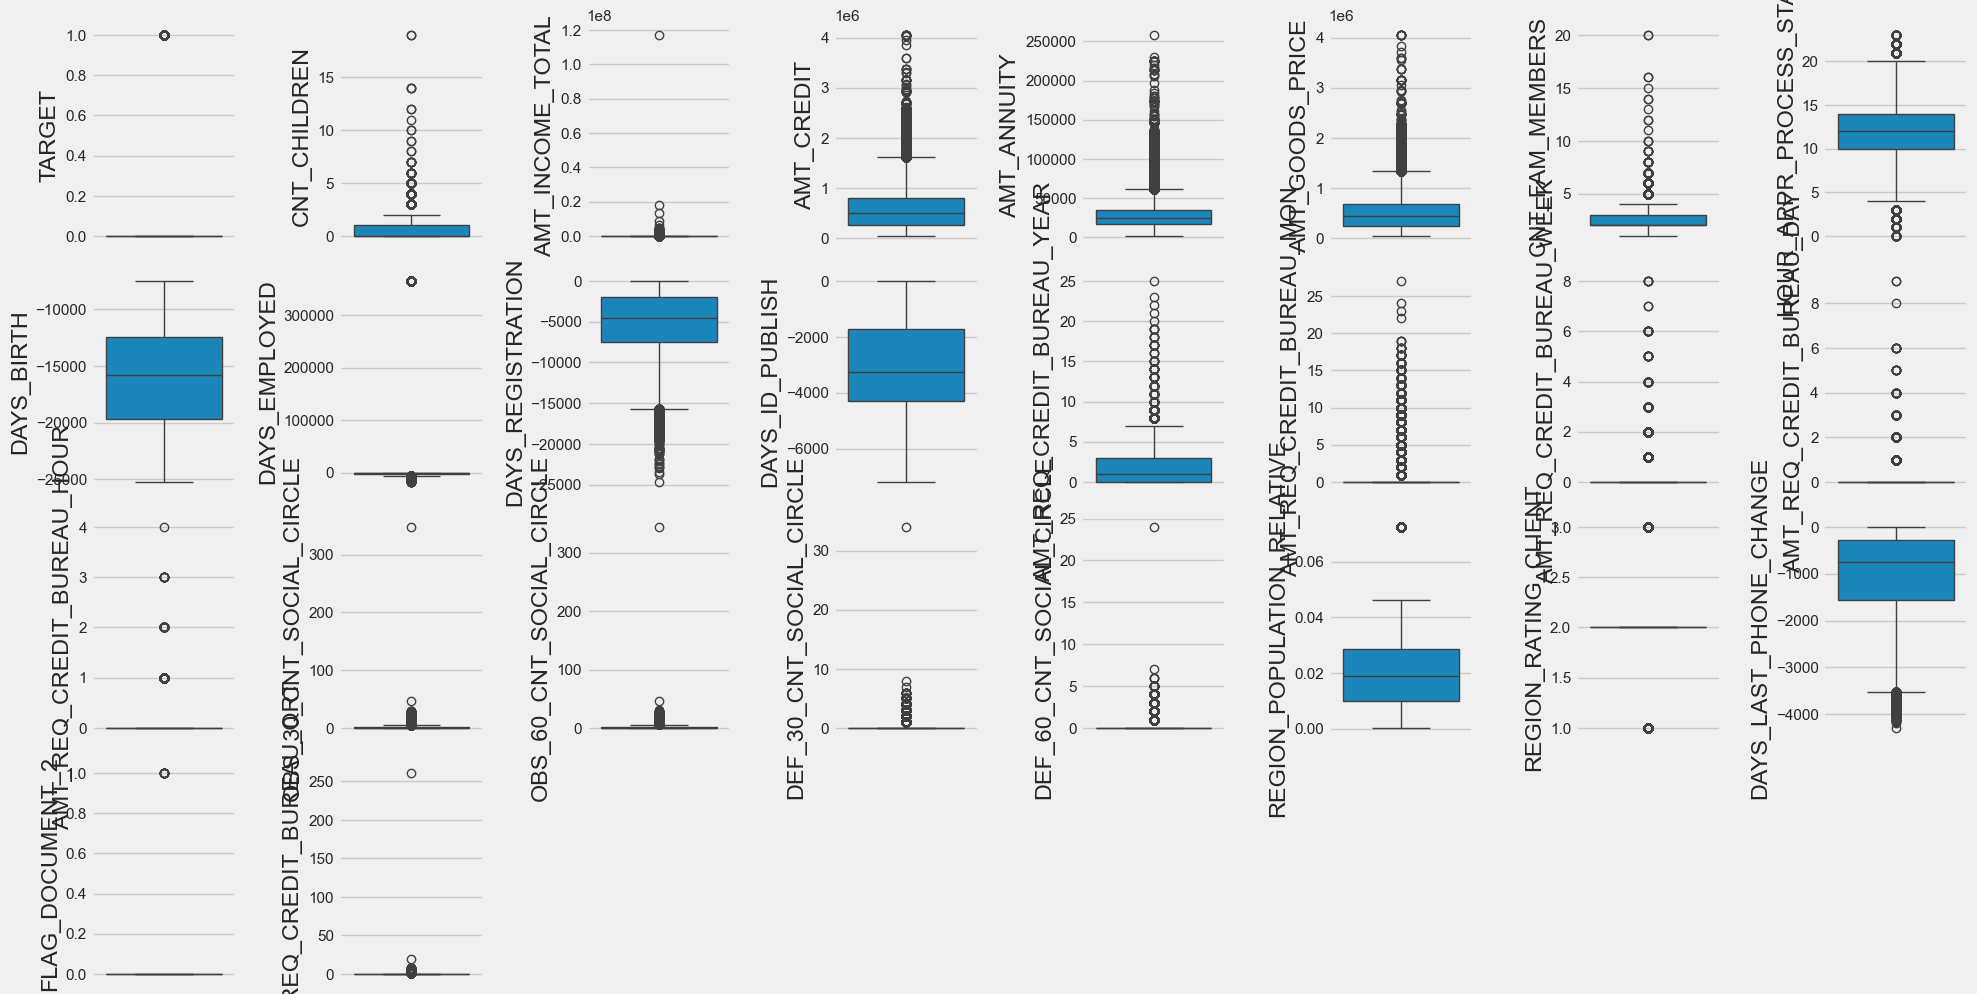

In [13]:
#assert len(num) == len(df.columns[num]), "Jumlah kolom 'num' tidak sesuai dengan jumlah kolom numerikal di DataFrame"

plt.figure(figsize=(20, 20))
for i in range(len(num)):
    plt.subplot(8, 8, i + 1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.tight_layout()

Terdapat outlier pada beberapa feature seperti : feature AMT_Income_Total, AMT_Annuity

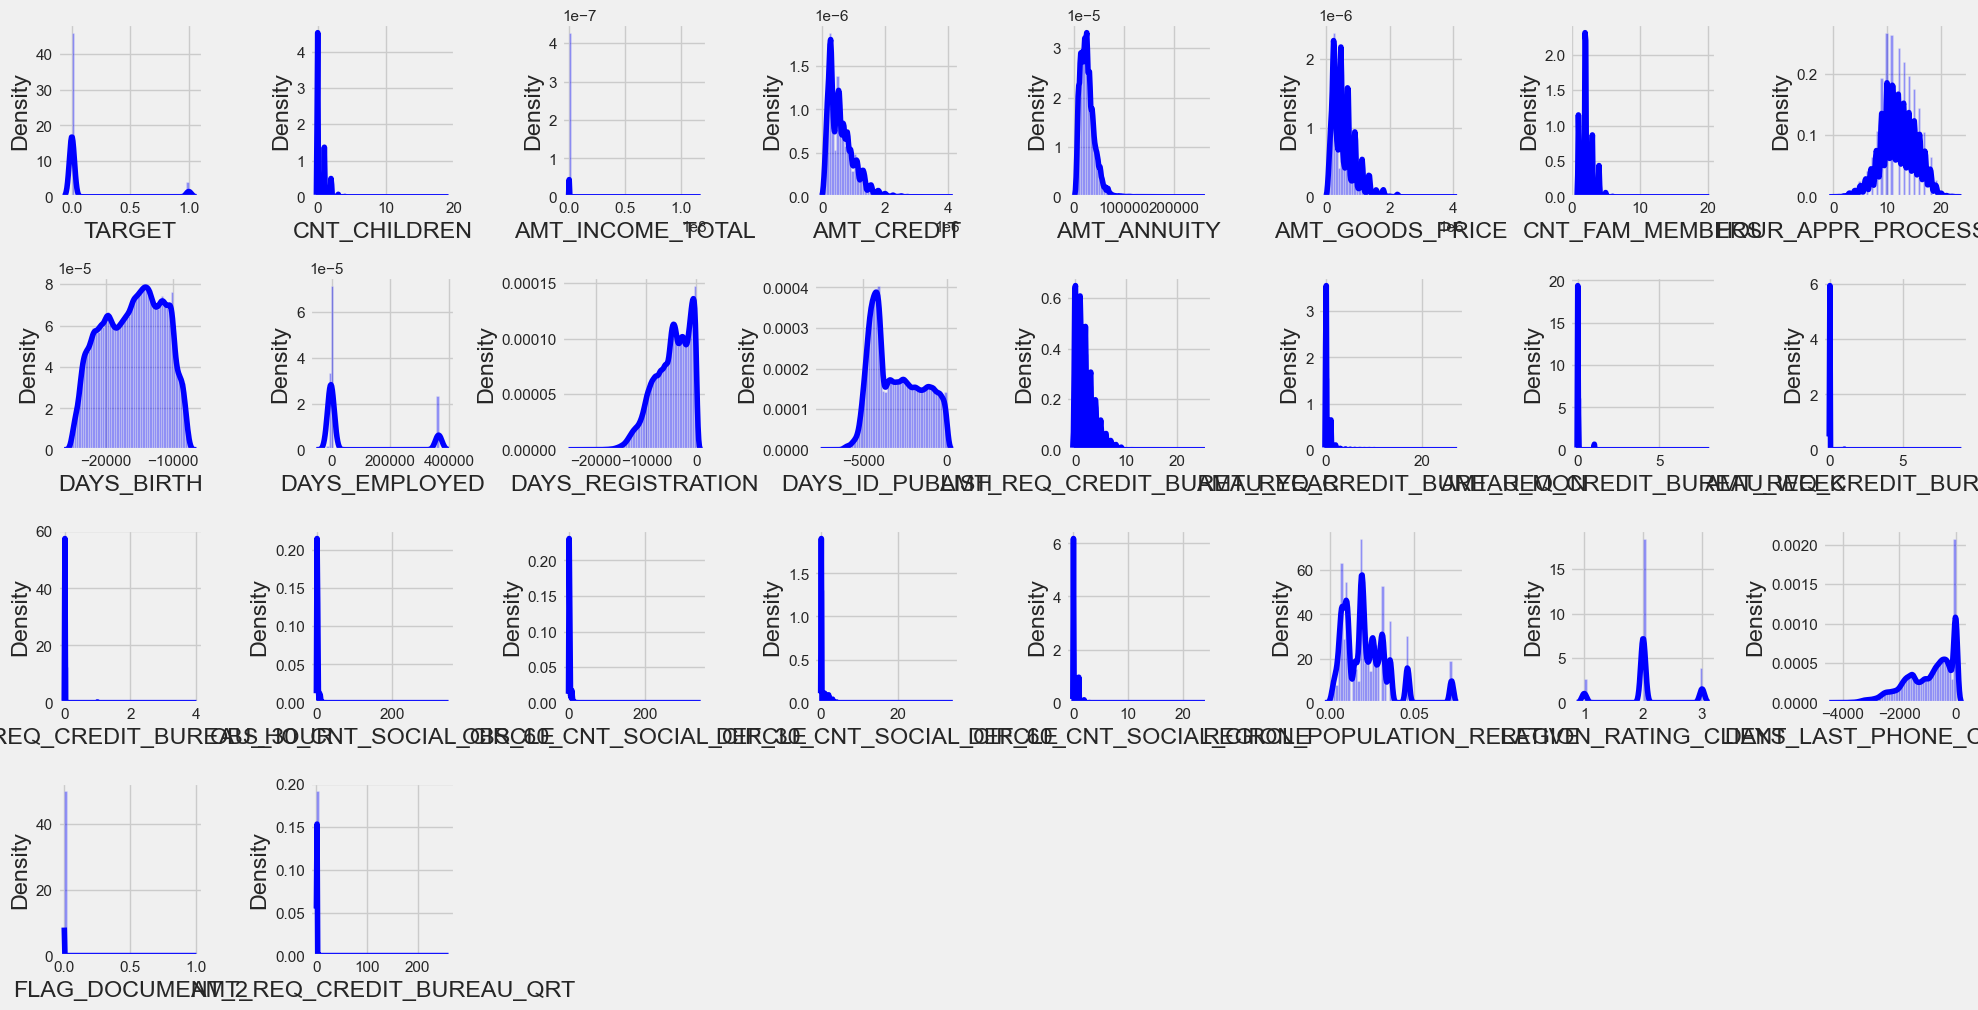

In [14]:
# cek distribusi menggunakan distplot:
plt.figure(figsize=(20, 20))
for i in range(0, len(num)):
    plt.subplot(8, 8, i+1)
    sns.distplot(df[num[i]], color = 'blue')
    plt.tight_layout()
plt.show()

Distribusi data cenderung skew positif/miring ke kanan. 

## Univariate Analysis : The Number of Customers Based on Their Repayment Abilities

In [15]:
target = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
  return target[int(label)]

df['TARGET'] = df['TARGET'].apply(lambda x: decode_sentiment(x))

In [16]:
# Hitung jumlah total
total_count = df['TARGET'].count()

# Grup berdasarkan TARGET dan hitung persentasenya
target_grp = (df[['TARGET']]
              .groupby("TARGET")
              .agg(COUNT=("TARGET", "count"))
              .sort_values(by=["COUNT"], ascending=False)
              .reset_index()
              )

# Tambahkan kolom persentase
target_grp['PERCENTAGE'] = round((target_grp['COUNT'] / total_count) * 100, 2)

# Tambahkan kolom proporsi
target_grp["PROPORTION"] = target_grp["COUNT"] / target_grp["COUNT"].sum()

target_grp

# Tampilkan hasil
print(target_grp)

  TARGET                    COUNT   PERCENTAGE  PROPORTION
0  No Payment Difficulties  282686  91.93       0.919271  
1     Payment Difficulties   24825   8.07       0.080729  


<Figure size 1200x600 with 0 Axes>

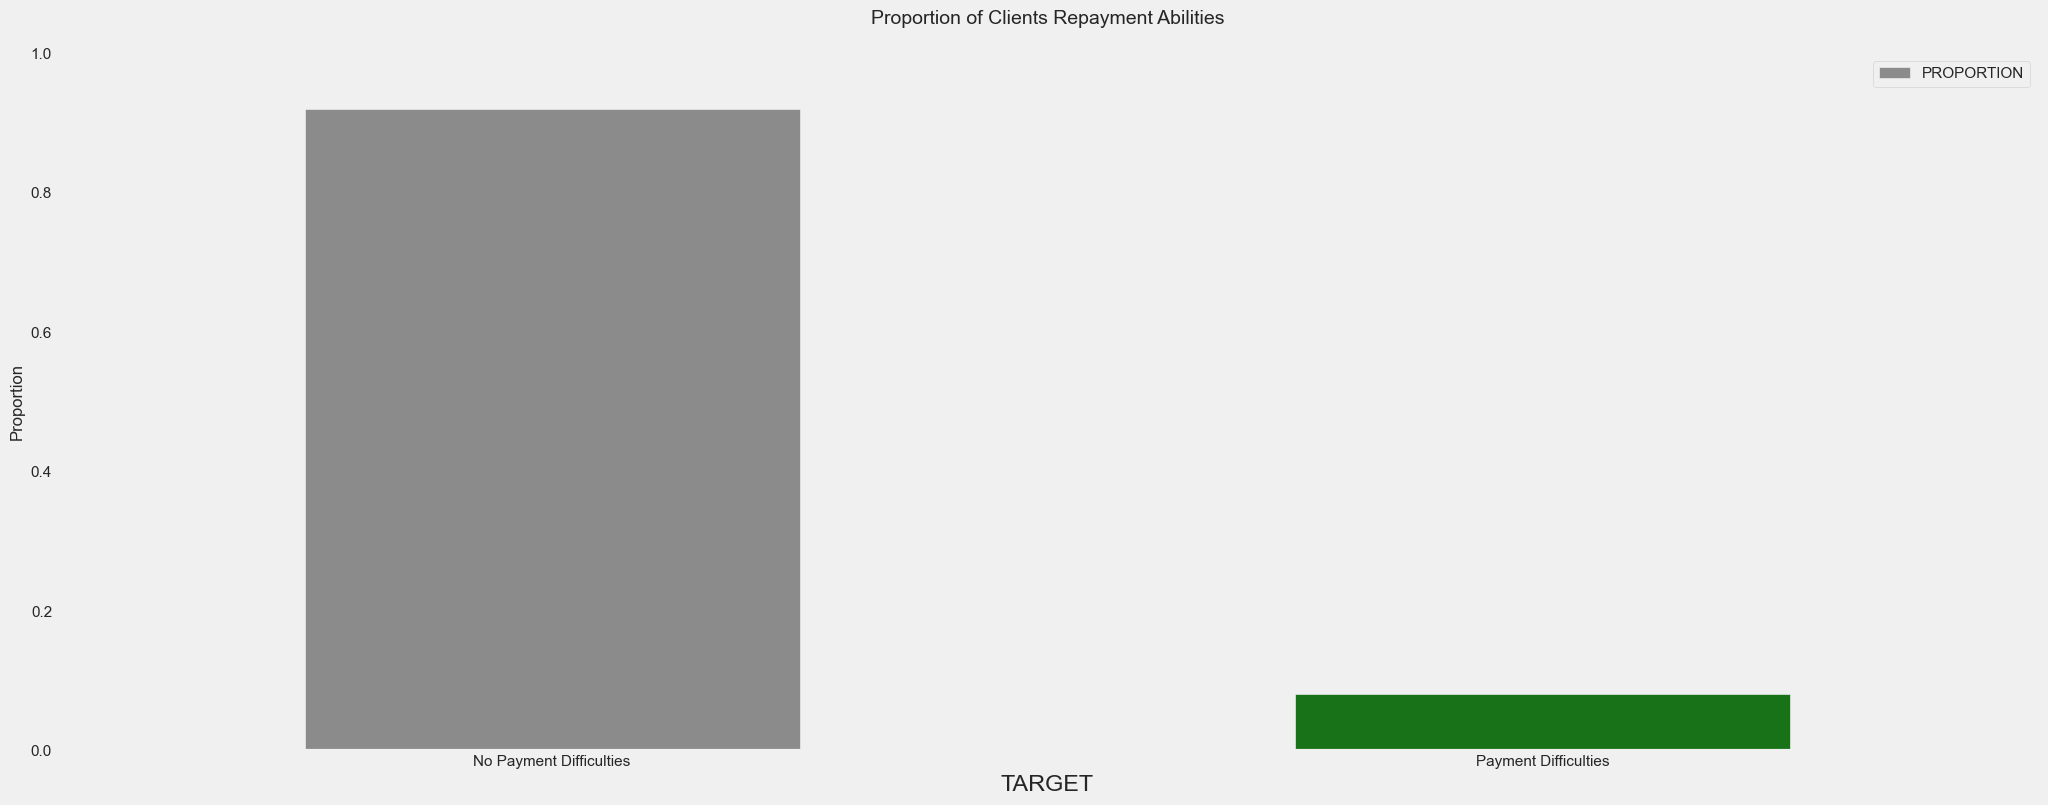

In [17]:
import matplotlib.pyplot as plt

# Data
data = {
    'TARGET': ['No Payment Difficulties', 'Payment Difficulties'],
    'PROPORTION': [0.919271, 0.080729]
}

# Membuat DataFrame
import pandas as pd
target_grp = pd.DataFrame(data)

# Visualisasi batang hanya untuk proporsi
fig = plt.figure(figsize=(12, 6))
target_grp.plot(kind='bar', x='TARGET', y='PROPORTION', color=['grey', 'darkgreen'], alpha=0.9, rot=0)
plt.title('Proportion of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Proportion', fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(False)
plt.show()

1. Proporsi untuk "No Payment Difficulties" adalah 0.919271 (sekitar 91.93% dari total klien), menunjukkan bahwa sebagian besar klien tidak menghadapi kesulitan pembayaran.
2. Proporsi untuk "Payment Difficulties" adalah 0.080729 (sekitar 8.07% dari total klien), yang menunjukkan bahwa sebagian kecil dari klien menghadapi kesulitan dalam pembayaran.

Dari data diatas dibutuhkan analisis lebih lanjut faktor-faktor yang mempengaruhi proses pembayaran. 

## Bivariate Analysis

### A. Numerical Features Vs Target

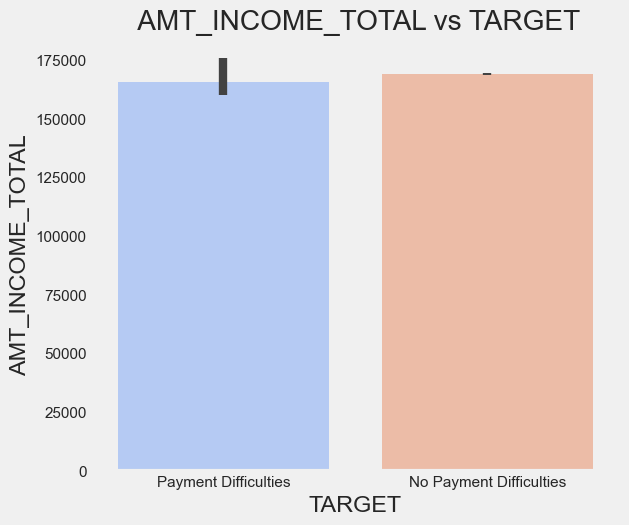

In [18]:
# 1. AMT_INCOME_TOTAL vs TARGET using barplot
plt.figure(figsize=(12, 15))
plt.subplot(3, 2, 1)  # Mengatur posisi subplot
sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df, palette='coolwarm', edgecolor='none')  # Menggunakan 'coolwarm' palette
plt.xticks(rotation=0)  # Menambahkan rotasi pada label sumbu x
plt.title(' AMT_INCOME_TOTAL vs TARGET')  # Menyisipkan judul
plt.grid(False)
plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()  # Menampilkan plot

1. Berdasarkan grafik diatas total pendapatan client no have payment difficult lebih besar sedikit dibandingkan dengan payment difficult artinya client dengan no have payment difficulties cenderung memiliki stabilitas keuangan yang lebih baik sehingga mampu mengelola pembayaran dan keawajiban keuangannya. Semakin tinggi total pendapatan, semakin kecil kemungkinan seseorang mengalami kesulitan pembayaran.

2. Variasi Pendapatan: Garis hitam di atas setiap batang mewakili rentang atau variasi pendapatan dalam masing-masing kelompok. Pada kategori "Payment Difficulties", terlihat ada variasi yang cukup besar, yang berarti ada beberapa individu dengan pendapatan tinggi dan beberapa dengan pendapatan rendah di kelompok ini. Sementara itu, pada kategori "No Payment Difficulties", variasi pendapatan juga ada, namun cenderung lebih kecil dibandingkan dengan kelompok sebelumnya.

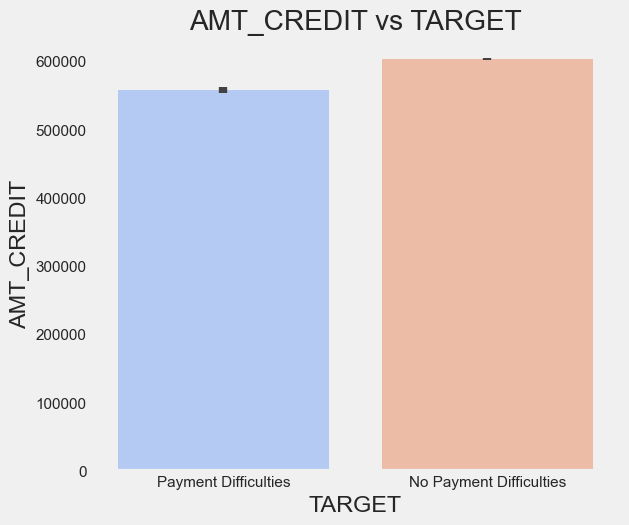

In [19]:
# 2. AMT_CREDIT vs TARGET using barplot
plt.figure(figsize=(12, 15))
plt.subplot(3, 2, 1)  # Mengatur posisi subplot
sns.barplot(x='TARGET', y='AMT_CREDIT', data=df, palette='coolwarm', edgecolor='none')  # Menggunakan 'coolwarm' palette
plt.xticks(rotation=0)  # Menambahkan rotasi pada label sumbu x
plt.title('AMT_CREDIT vs TARGET')  # Menyisipkan judul
plt.grid(False)
plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()  # Menampilkan plot

1. jumlah pinjaman yang diajukan client yaang memiliki no payment difficulties lebih banyak dari pada yang payment difficulties

2. Variasi Jumlah Kredit: Garis hitam di atas setiap batang menunjukkan rentang atau variasi jumlah kredit dalam masing-masing kelompok. Baik kelompok yang mengalami kesulitan maupun yang tidak, terdapat variasi yang cukup besar dalam jumlah kredit yang diberikan. Ini mengindikasikan bahwa dalam masing-masing kelompok, ada individu yang mendapatkan jumlah kredit yang sangat berbeda.

3. grafik ini memberikan indikasi bahwa pemberian kredit cenderung memberikan jumlah kredit yang lebih besar kepada client yang memiliki riwayat pembayaran yang baik.  Ini menunjukkan adanya penilaian risiko kredit yang dilakukan oleh lembaga pemberi kredit. Individu dengan riwayat pembayaran yang baik dianggap memiliki risiko kredit yang lebih rendah sehingga mereka dapat memperoleh jumlah kredit yang lebih besar.


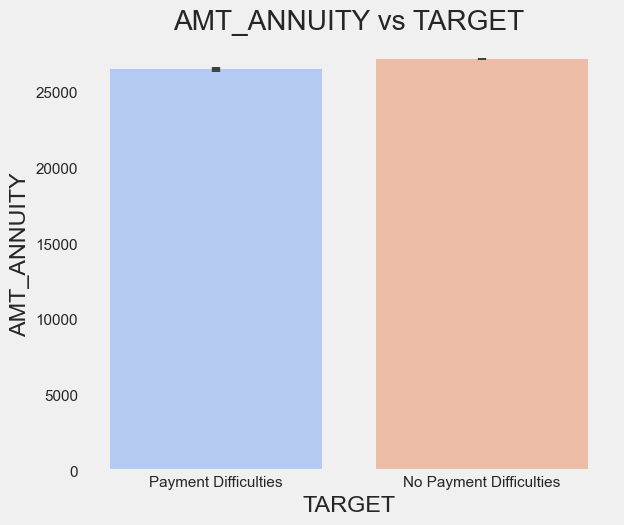

In [20]:
# 3. AMT_ANNUITY vs TARGET using barplot
plt.figure(figsize=(12, 15))
plt.subplot(3, 2, 1)  # Mengatur posisi subplot
sns.barplot(x='TARGET', y='AMT_ANNUITY', data=df, palette='coolwarm', edgecolor='none')  # Menggunakan 'coolwarm' palette
plt.xticks(rotation=0)  # Menambahkan rotasi pada label sumbu x
plt.title('AMT_ANNUITY vs TARGET')  # Menyisipkan judul
plt.grid(False)
plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()  # Menampilkan plot

1. jumlah cicilan tahunan pinjaman/ jumlah besaran angsuran yang tidak mengalami kesulitan bayar memiliki jumlah angsuran yang lebih besar sedikit daripada yang memiliki kesulitan bayar. 

2. Variasi Angsuran: Garis hitam di atas setiap batang menunjukkan rentang atau variasi besaran angsuran dalam masing-masing kelompok. Baik kelompok yang mengalami kesulitan maupun yang tidak, terdapat variasi yang cukup besar dalam besaran angsuran yang diberikan. Ini mengindikasikan bahwa dalam masing-masing kelompok, ada individu yang memiliki angsuran yang sangat berbeda.

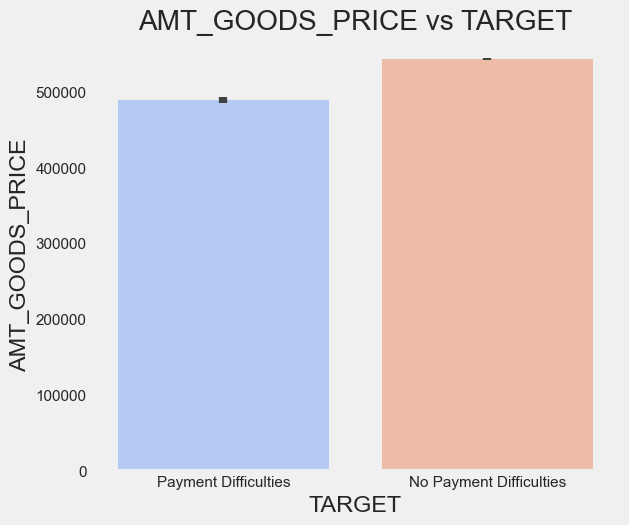

In [21]:
# 4. AMT_GOODS_PRICE vs TARGET using barplot
plt.figure(figsize=(12, 15))
plt.subplot(3, 2, 1)  # Mengatur posisi subplot
sns.barplot(x='TARGET', y='AMT_GOODS_PRICE', data=df, palette='coolwarm', edgecolor='none')  # Menggunakan 'coolwarm' palette
plt.xticks(rotation=0)  # Menambahkan rotasi pada label sumbu x
plt.title('AMT_GOODS_PRICE vs TARGET')  # Menyisipkan judul
plt.grid(False)
plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()  # Menampilkan plot

1. harga barang yang didanai pinjaman untuk kategori yang tidak sulit membayar memiliki jumlah yang lebih besar daripada yang mengalami kesulitan dalam membayar. 

2. Kemampuan Membayar: Meskipun harga barang kedua kelompok terlihat serupa, kemampuan seseorang untuk membayar angsuran tidak hanya ditentukan oleh harga barang itu sendiri, tetapi juga oleh pendapatan, pengeluaran, dan kondisi keuangan individu secara keseluruhan.

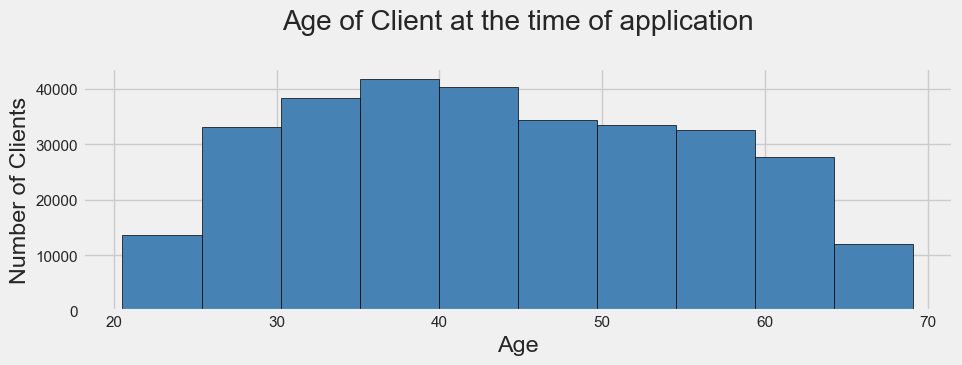

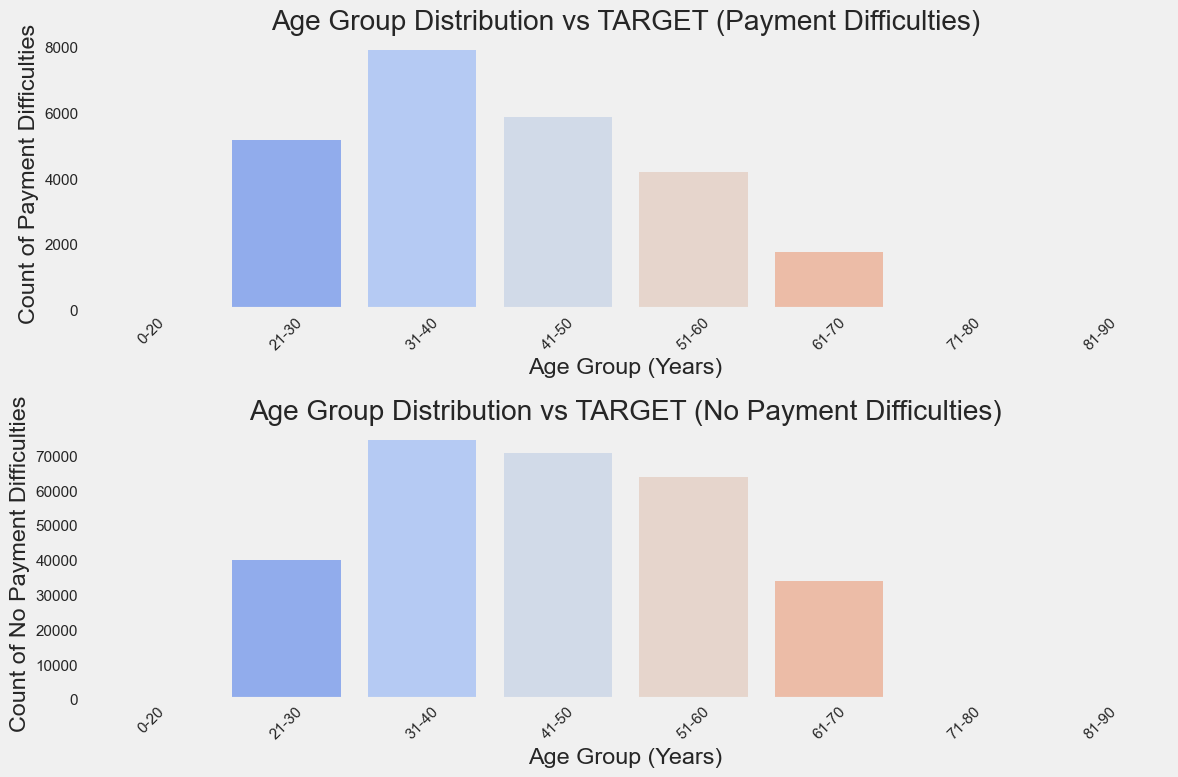

In [22]:
# 5. DAYS_BIRTH (AGE) vs TARGET 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom DAYS_BIRTH berbentuk numerik
df['DAYS_BIRTH'] = pd.to_numeric(df['DAYS_BIRTH'], errors='coerce')

# Histogram distribusi usia klien
plt.figure(figsize=(10, 3))
plt.hist(df['DAYS_BIRTH'].values / -365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client at the time of application\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Binning usia untuk bar plot
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
df['AgeBin'] = pd.cut(df['DAYS_BIRTH'] / -365, bins, labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

# Filter data berdasarkan TARGET
df_payment_difficulties = df[df['TARGET'] == 'Payment Difficulties']
df_no_payment_difficulties = df[df['TARGET'] == 'No Payment Difficulties']

# Hitung jumlah TARGET berdasarkan tiap bin usia
age_target_count_difficulties = df_payment_difficulties.groupby('AgeBin')['TARGET'].count()
age_target_count_no_difficulties = df_no_payment_difficulties.groupby('AgeBin')['TARGET'].count()

# Visualisasi bar plot untuk Payment Difficulties dan No Payment Difficulties
plt.figure(figsize=(12, 8))

# Subplot pertama: Payment Difficulties
plt.subplot(2, 1, 1)
sns.barplot(
    x=age_target_count_difficulties.index, 
    y=age_target_count_difficulties.values, 
    palette='coolwarm', 
    edgecolor='none'
)
plt.xticks(rotation=45)
plt.title('Age Group Distribution vs TARGET (Payment Difficulties)')
plt.xlabel('Age Group (Years)')
plt.ylabel('Count of Payment Difficulties')
plt.grid(False)

# Subplot kedua: No Payment Difficulties
plt.subplot(2, 1, 2)
sns.barplot(
    x=age_target_count_no_difficulties.index, 
    y=age_target_count_no_difficulties.values, 
    palette='coolwarm', 
    edgecolor='none'
)
plt.xticks(rotation=45)
plt.title('Age Group Distribution vs TARGET (No Payment Difficulties)')
plt.xlabel('Age Group (Years)')
plt.ylabel('Count of No Payment Difficulties')
plt.grid(False)

plt.tight_layout()
plt.show()


1. client yang mengajukan loan/pinjaman terkonsentrasi pada rentang usia produkti di 25-55 tahun, dimana client yang banyak loan/pinjaman berusia 30-45 tahun, dan  cenderung memiliki risiko kredit yang lebih tinggi dibandingkan dengan kelompok usia lainnya. 

2. kesamaan : kedua kelompok yang terdapat kesulitan membayar dan tidak ada kesulitan membayar rata-rata mengajukan pinjaman/loan pada rentang usia 31-40 tahun. 
- Pada kategori kesulitan membayar rentang usia 41-50 tahun jumlah pelanggan yang mengalami kesulitan membayar mengalami penurunan seiring bertambahnya usia, namun jika dibandingkan dengan usia 21-30 tetap masih tinggi dalam kemampuan sulit membayarnya. 
- sementara untuk no payment difficult pada usia 41-50 tidak mengalami penurunan yang signifikan malah lebih tinggi kedua ini menunjukkan stabilitas yang baik dalam hal kemampuan pembayaran. 

### B. Categorical Features Vs Target

<Axes: title={'center': 'Clients Repayment Abilities By Status ownership Realty\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

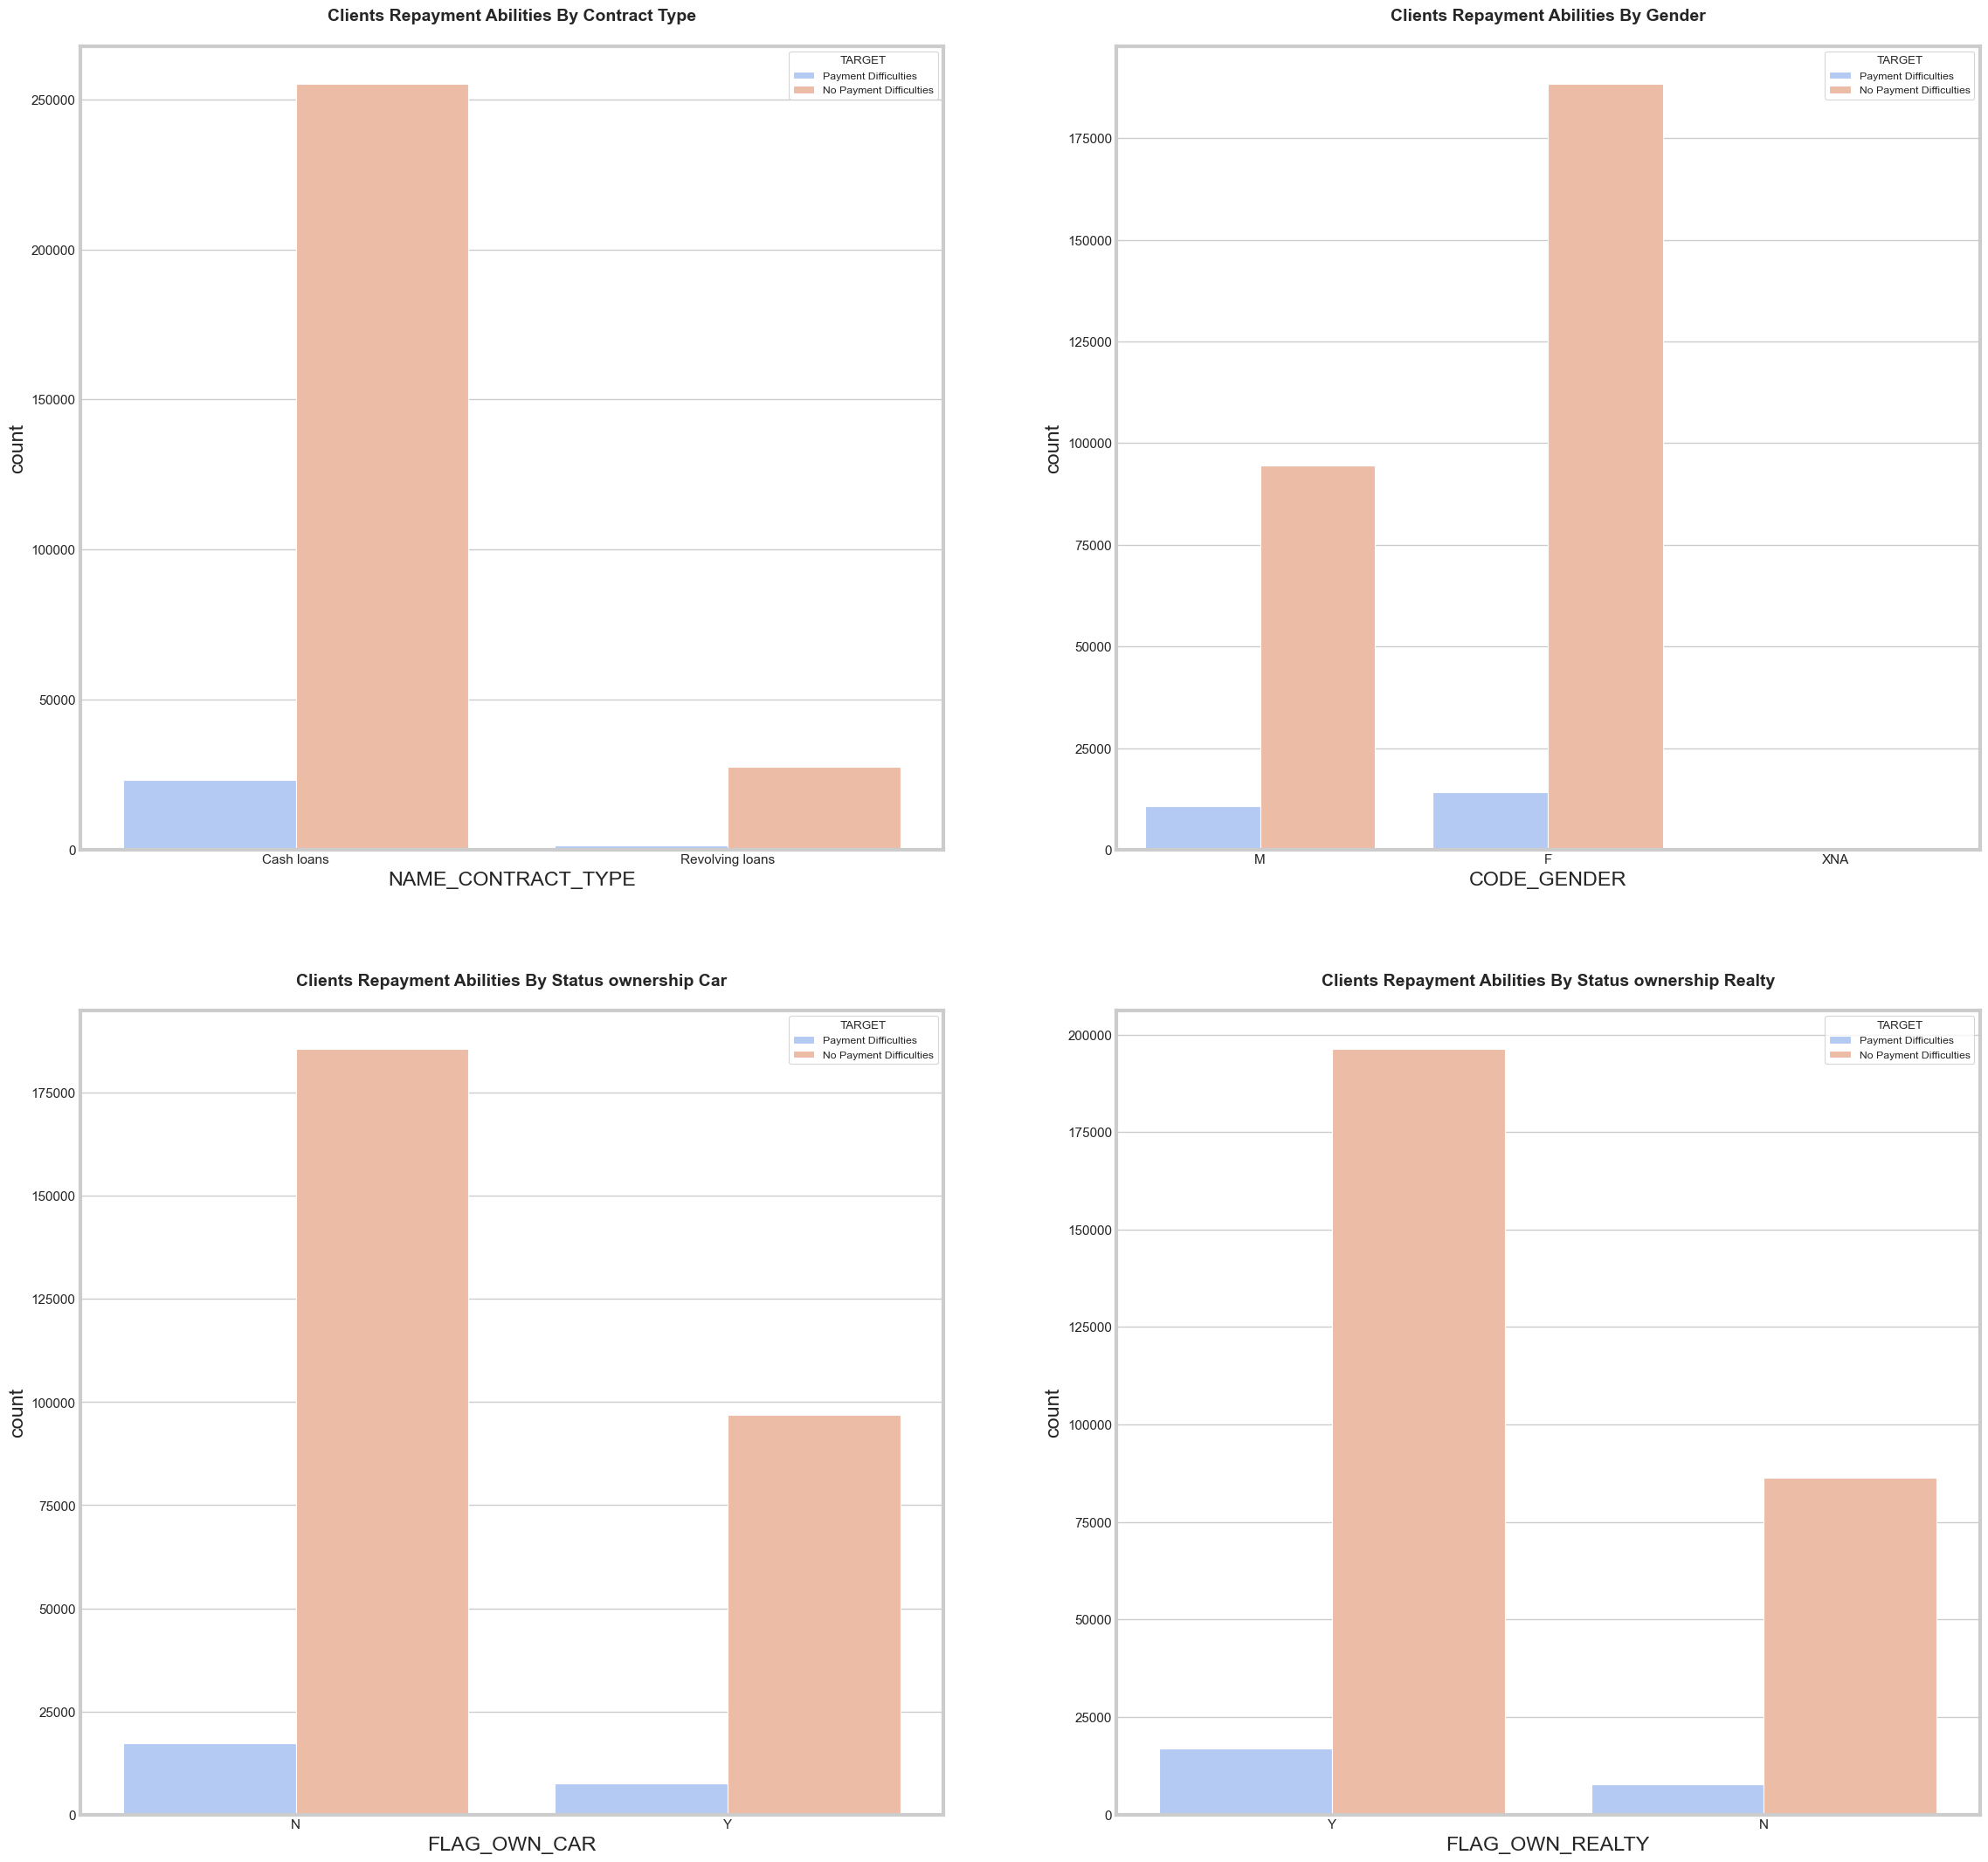

In [23]:
# 1 NAME_CONTRACT_TYPE vs TARGET using barplot
#visualization part 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data=df, hue='TARGET', palette = 'coolwarm', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=df, hue='TARGET', palette = 'coolwarm', ax=ax[0][1])

ax[1][0].set_title('Clients Repayment Abilities By Status ownership Car\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=df, hue='TARGET', palette = 'coolwarm', ax=ax[1][0])

ax[1][1].set_title('Clients Repayment Abilities By Status ownership Realty\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=df, hue='TARGET', palette = 'coolwarm', ax=ax[1][1])

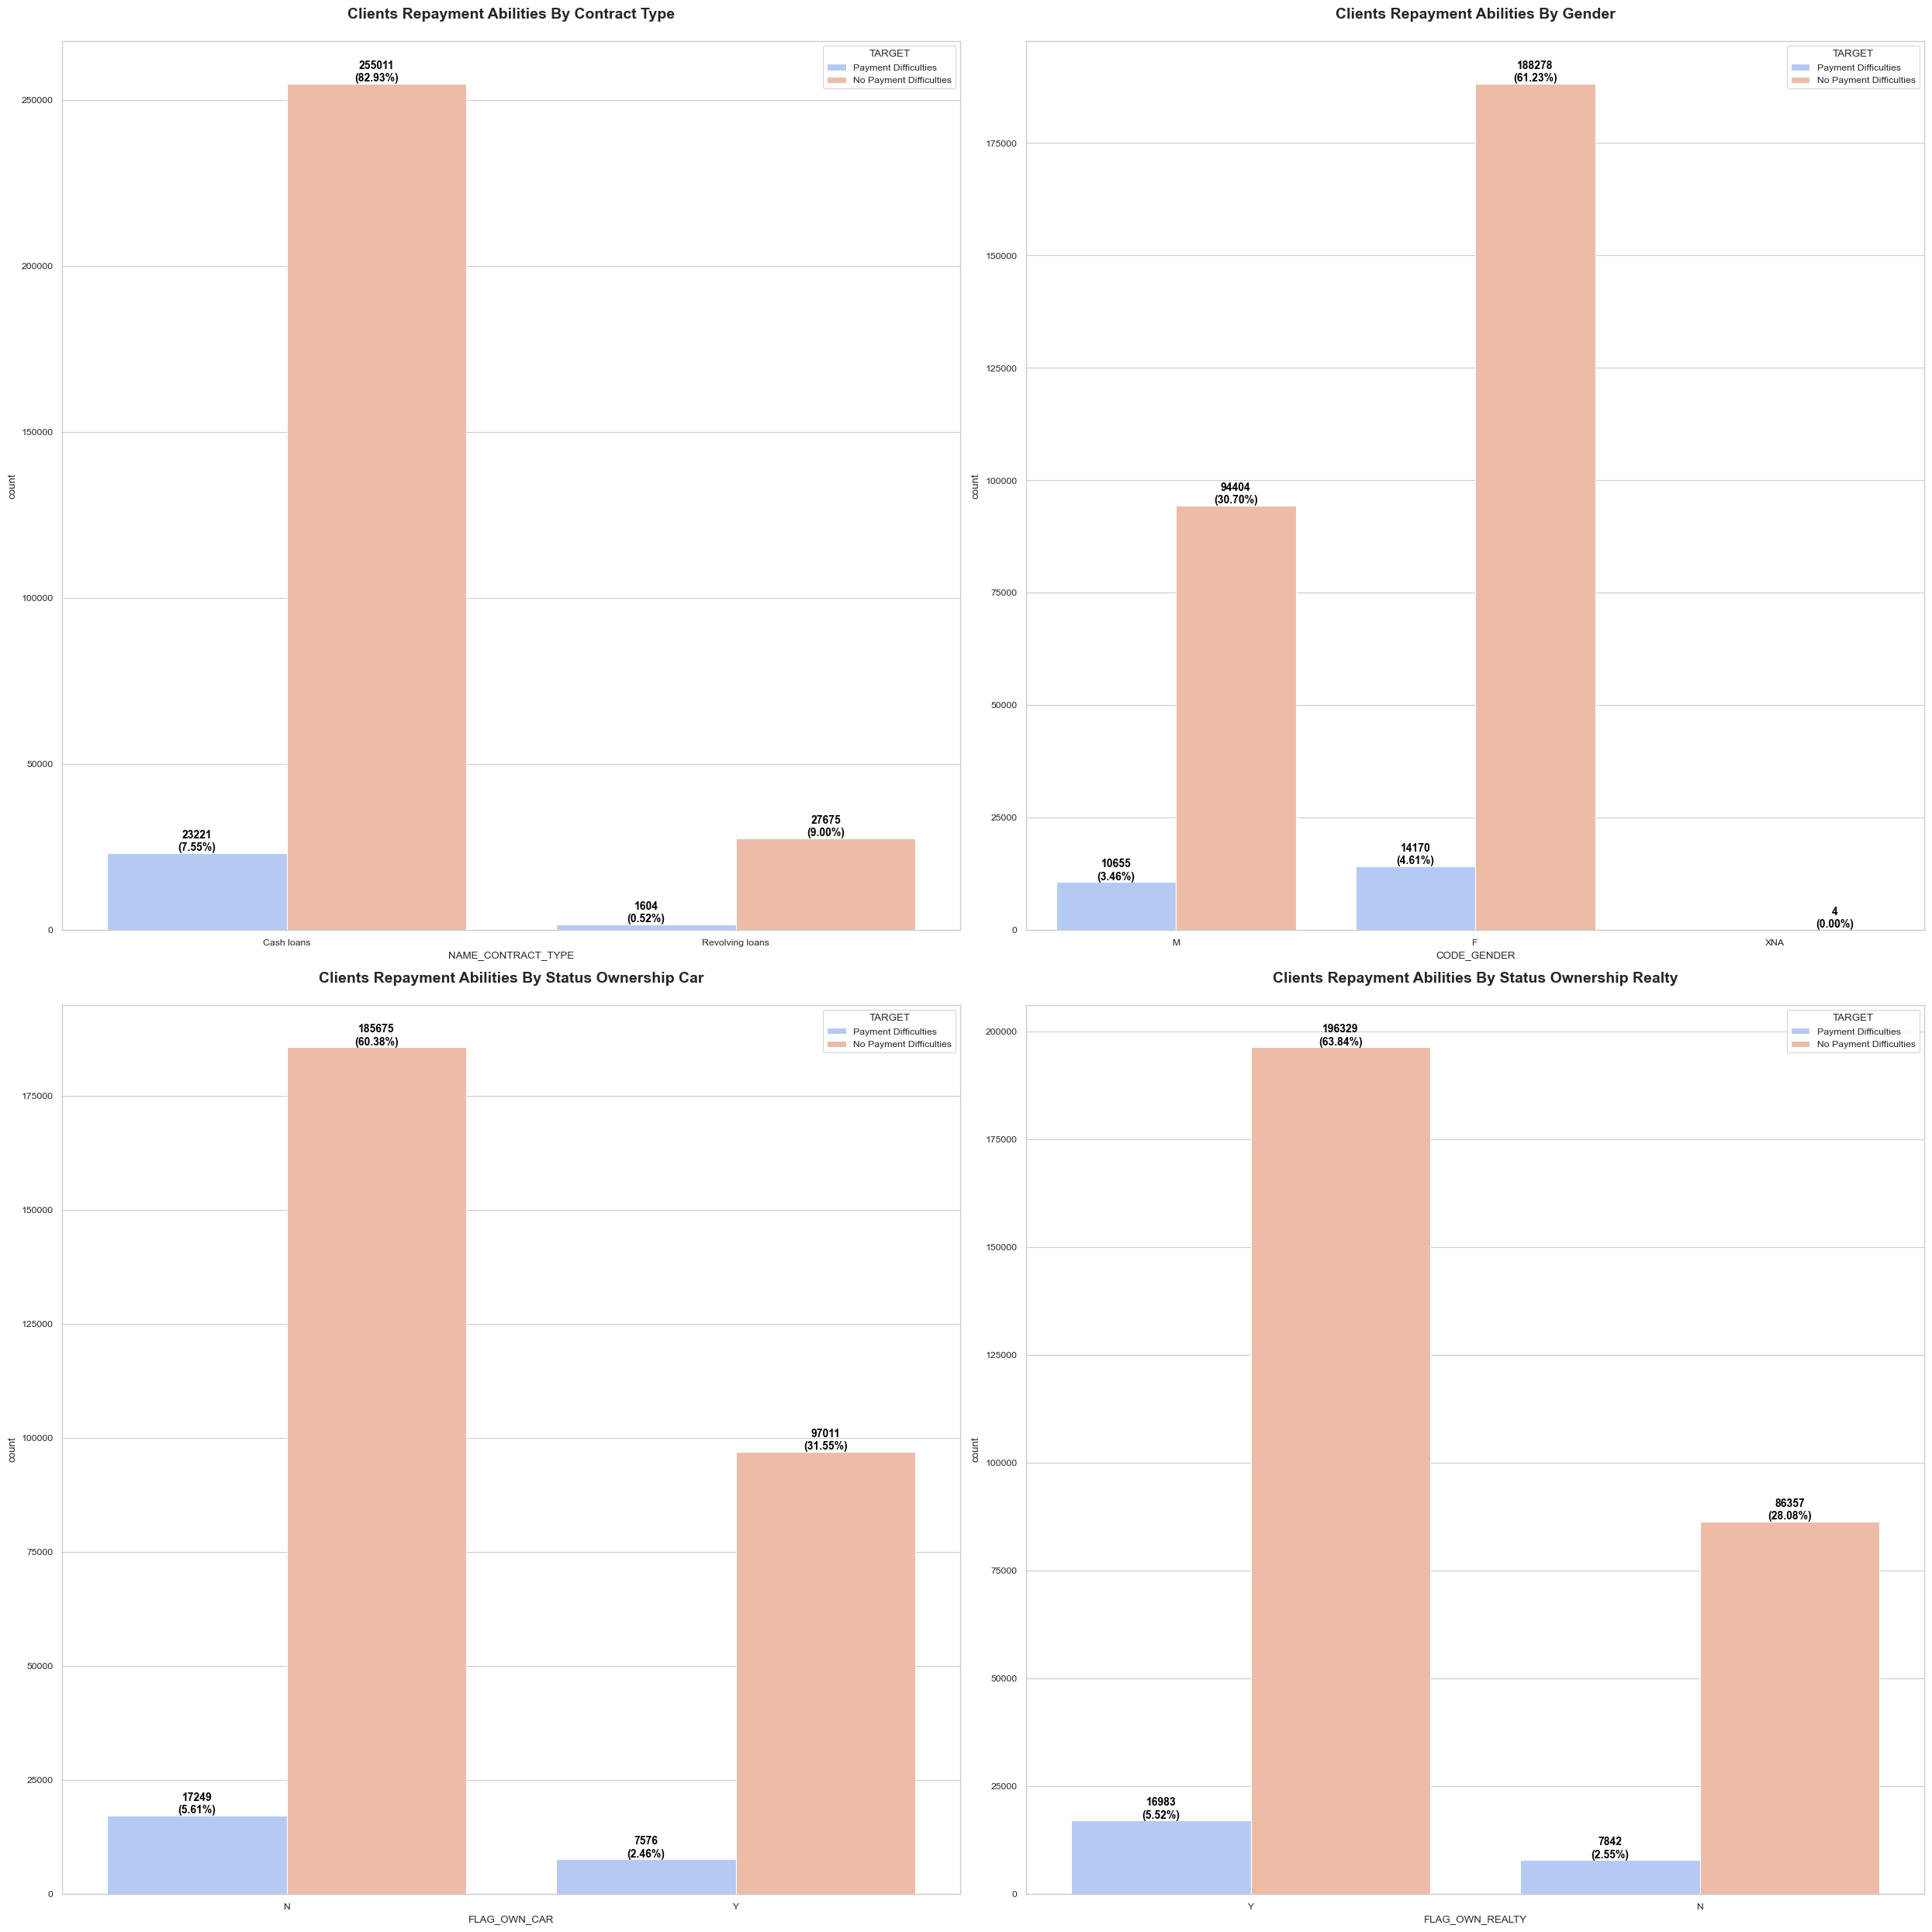

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah dan persentase berdasarkan total semua kategori
def add_counts_and_percentages(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Hitung persentase berdasarkan total semua kategori
            percentage = (height / total_all) * 100
            
            # Tambahkan teks jumlah dan persentase
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}\n({percentage:.2f}%)',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Plot 1: NAME_CONTRACT_TYPE vs TARGET
ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][0])
add_counts_and_percentages(ax[0][0], df, 'NAME_CONTRACT_TYPE')

# Plot 2: CODE_GENDER vs TARGET
ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][1])
add_counts_and_percentages(ax[0][1], df, 'CODE_GENDER')

# Plot 3: FLAG_OWN_CAR vs TARGET
ax[1][0].set_title('Clients Repayment Abilities By Status Ownership Car\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][0])
add_counts_and_percentages(ax[1][0], df, 'FLAG_OWN_CAR')

# Plot 4: FLAG_OWN_REALTY vs TARGET
ax[1][1].set_title('Clients Repayment Abilities By Status Ownership Realty\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][1])
add_counts_and_percentages(ax[1][1], df, 'FLAG_OWN_REALTY')

# Menampilkan plot
plt.tight_layout()
plt.show()


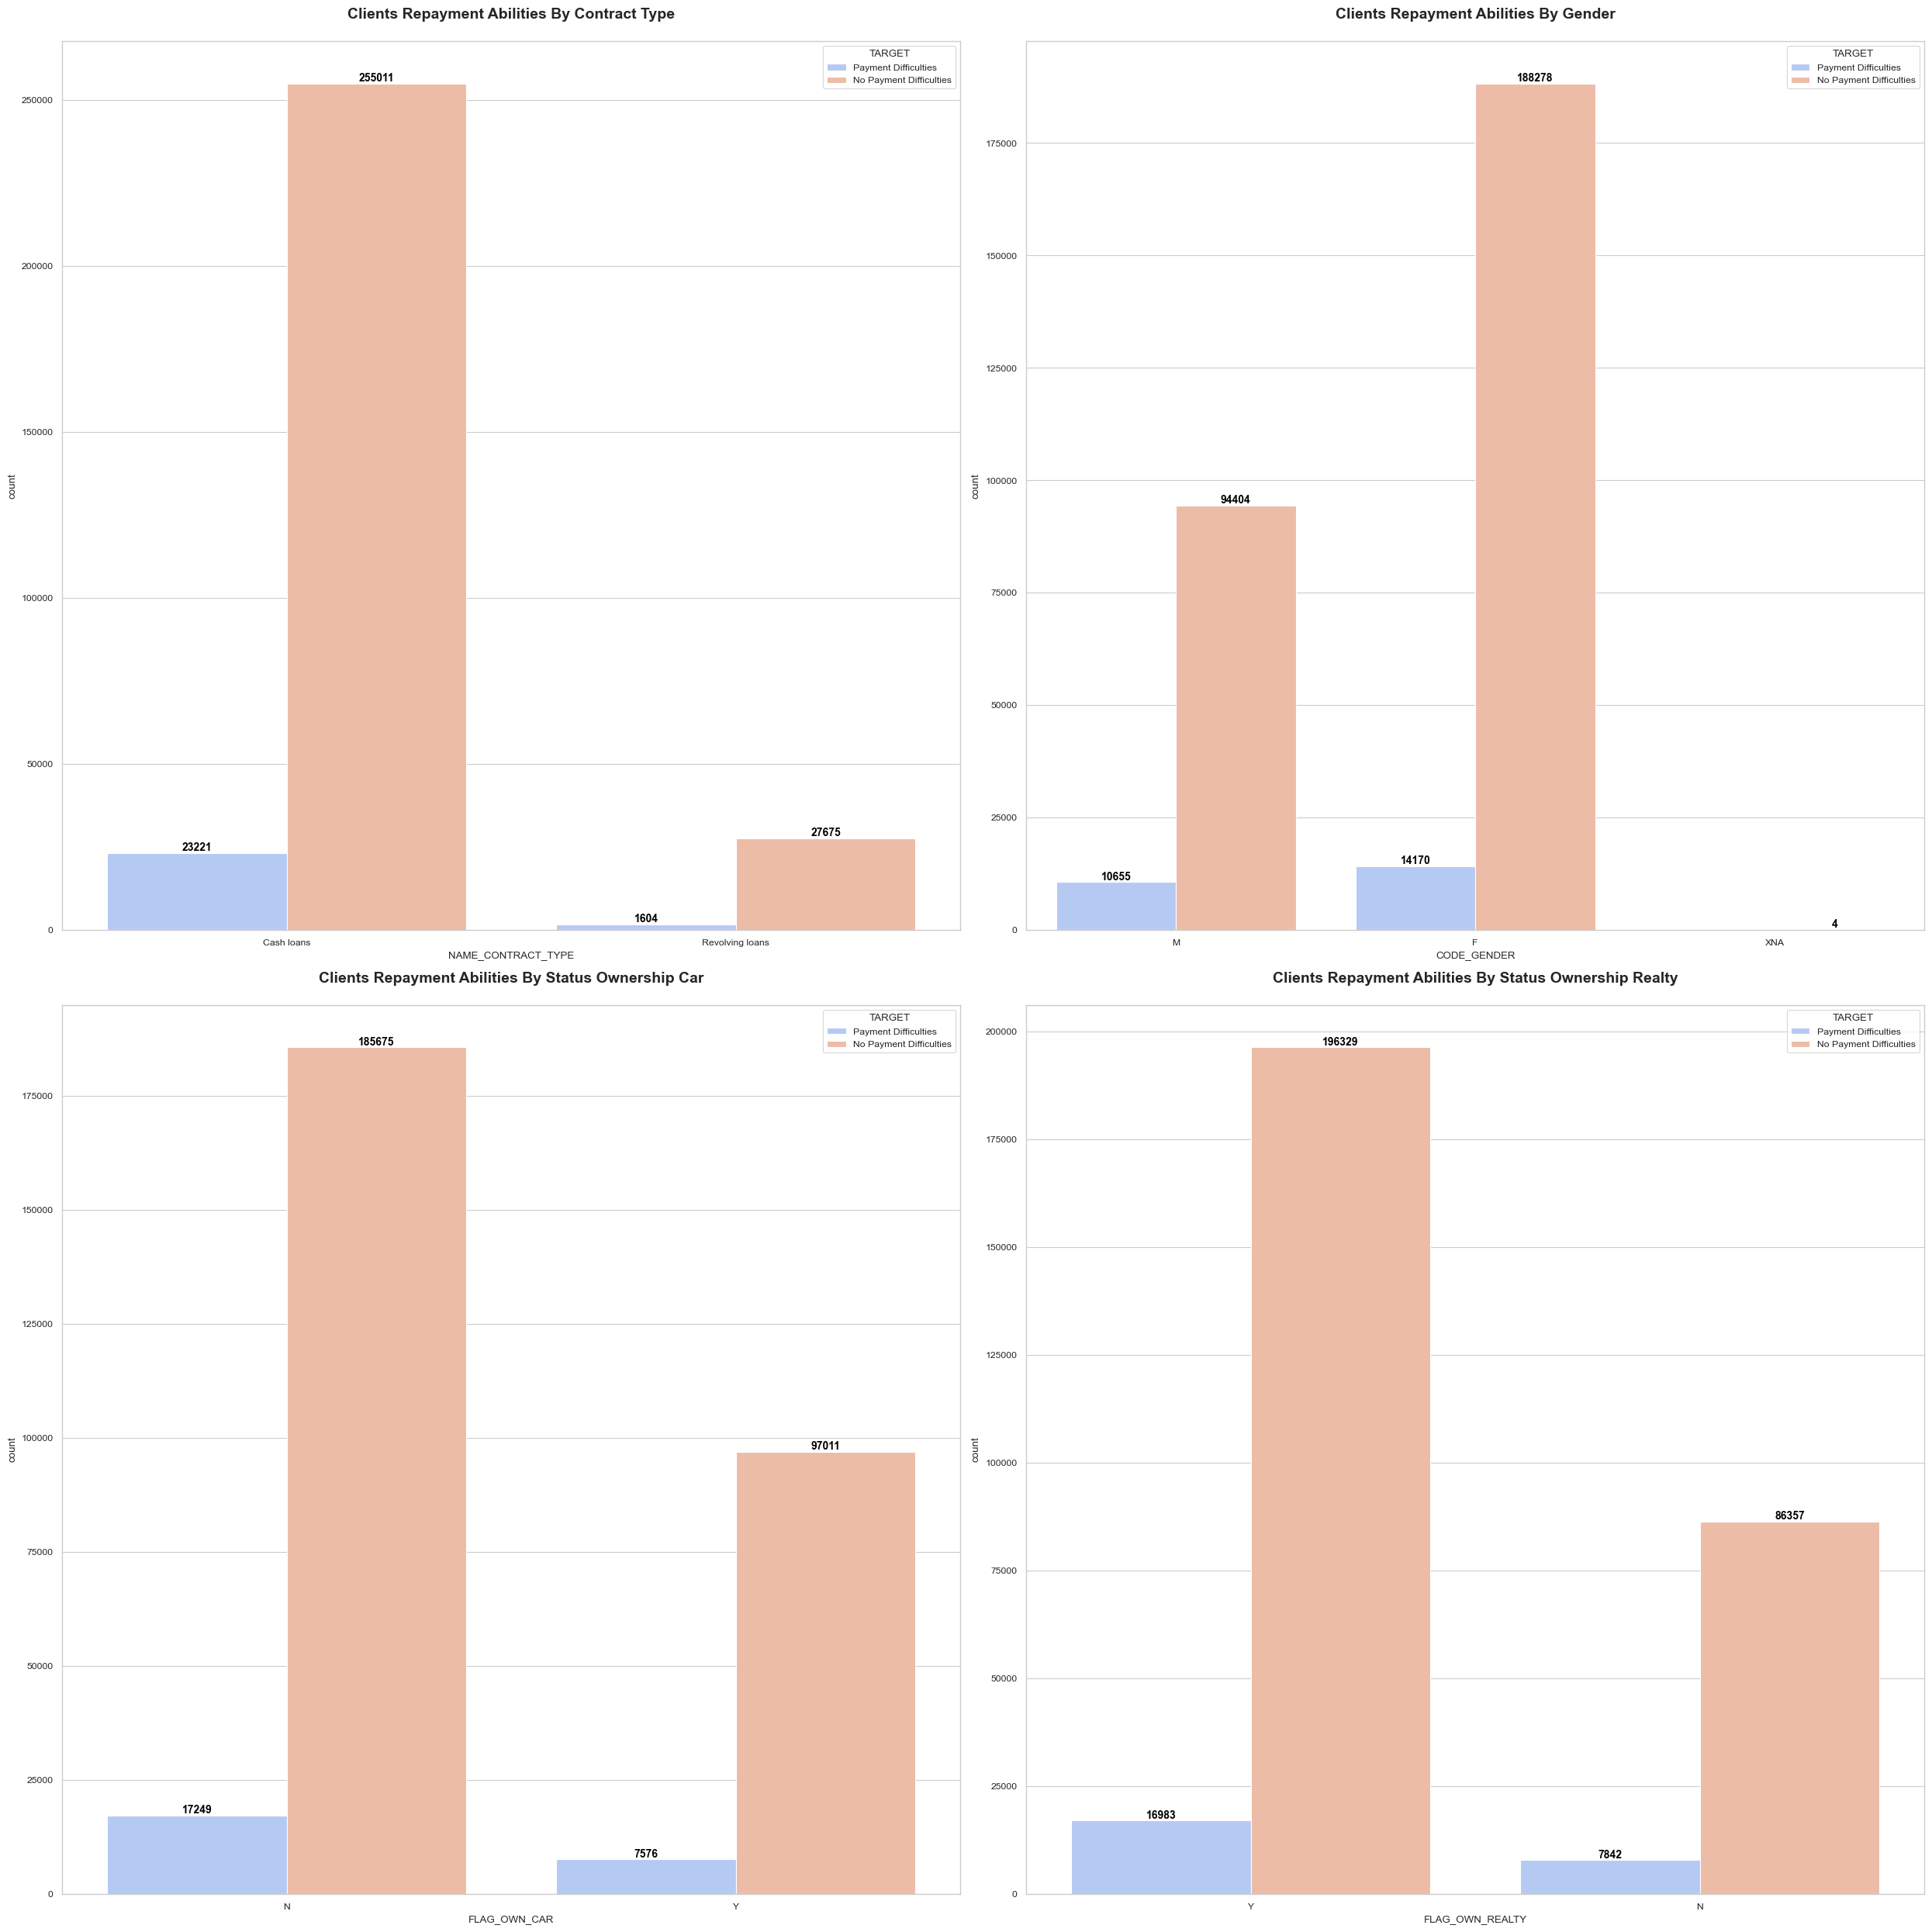

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah berdasarkan total semua kategori
def add_counts(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Tambahkan teks jumlah
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Plot 1: NAME_CONTRACT_TYPE vs TARGET
ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][0])
add_counts(ax[0][0], df, 'NAME_CONTRACT_TYPE')

# Plot 2: CODE_GENDER vs TARGET
ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][1])
add_counts(ax[0][1], df, 'CODE_GENDER')

# Plot 3: FLAG_OWN_CAR vs TARGET
ax[1][0].set_title('Clients Repayment Abilities By Status Ownership Car\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][0])
add_counts(ax[1][0], df, 'FLAG_OWN_CAR')

# Plot 4: FLAG_OWN_REALTY vs TARGET
ax[1][1].set_title('Clients Repayment Abilities By Status Ownership Realty\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][1])
add_counts(ax[1][1], df, 'FLAG_OWN_REALTY')

# Menampilkan plot
plt.tight_layout()
plt.show()


1. jenis kontak pinjaman yang di pinjam oleh client terdapat 2 jenis yaitu pinjaman tunai(cash loan) dan revolving loan. 
Cash loan memiliki jumlah yang banyak sekitar 278.000 dari total keseluruhan, sementara revolving loan sekitar 29.000. 

2. berdasarkan gender yang banyak mengajukan pinjaman adalah Wanita 202.448 diabandingkan pria sejumlah 105.059, hanya saja dalam proses pembayaran pria memiliki persentase yang lebih besar 10% dibandingkan Wanita yaitu 7%. 
Wanita (Female):
= 14,170 / 202,448 × 100 ≈ 7.0 %

Pria (Male):
= 10,655 / 105,059 × 100 ≈ 10.1 %

3. Yang tidak memiliki mobil lebih banyak melalkukan pinjaman sebesar 202.924, dan yang memiliki mmobil 104.587. Namun dalam proses pembayaran yang tidak memiliki mobil sebanyak 8.5% mengalami kesulitan pembayaran dibandingkan dengan yang memiliki mobil 7.2%. 

4. jumlah yang memiliki flat/house lebih banyak 213.312 melakukan pinjaman daripada yang tidak memilikinya 94.199. Hanya saja dalam proses pembayaran yang tidak memiliki flat/house mengalami kesulitan pembayaran sebesar 8.3% dibandingkan dengan yang memiliki flat/house sebesar 7.9%

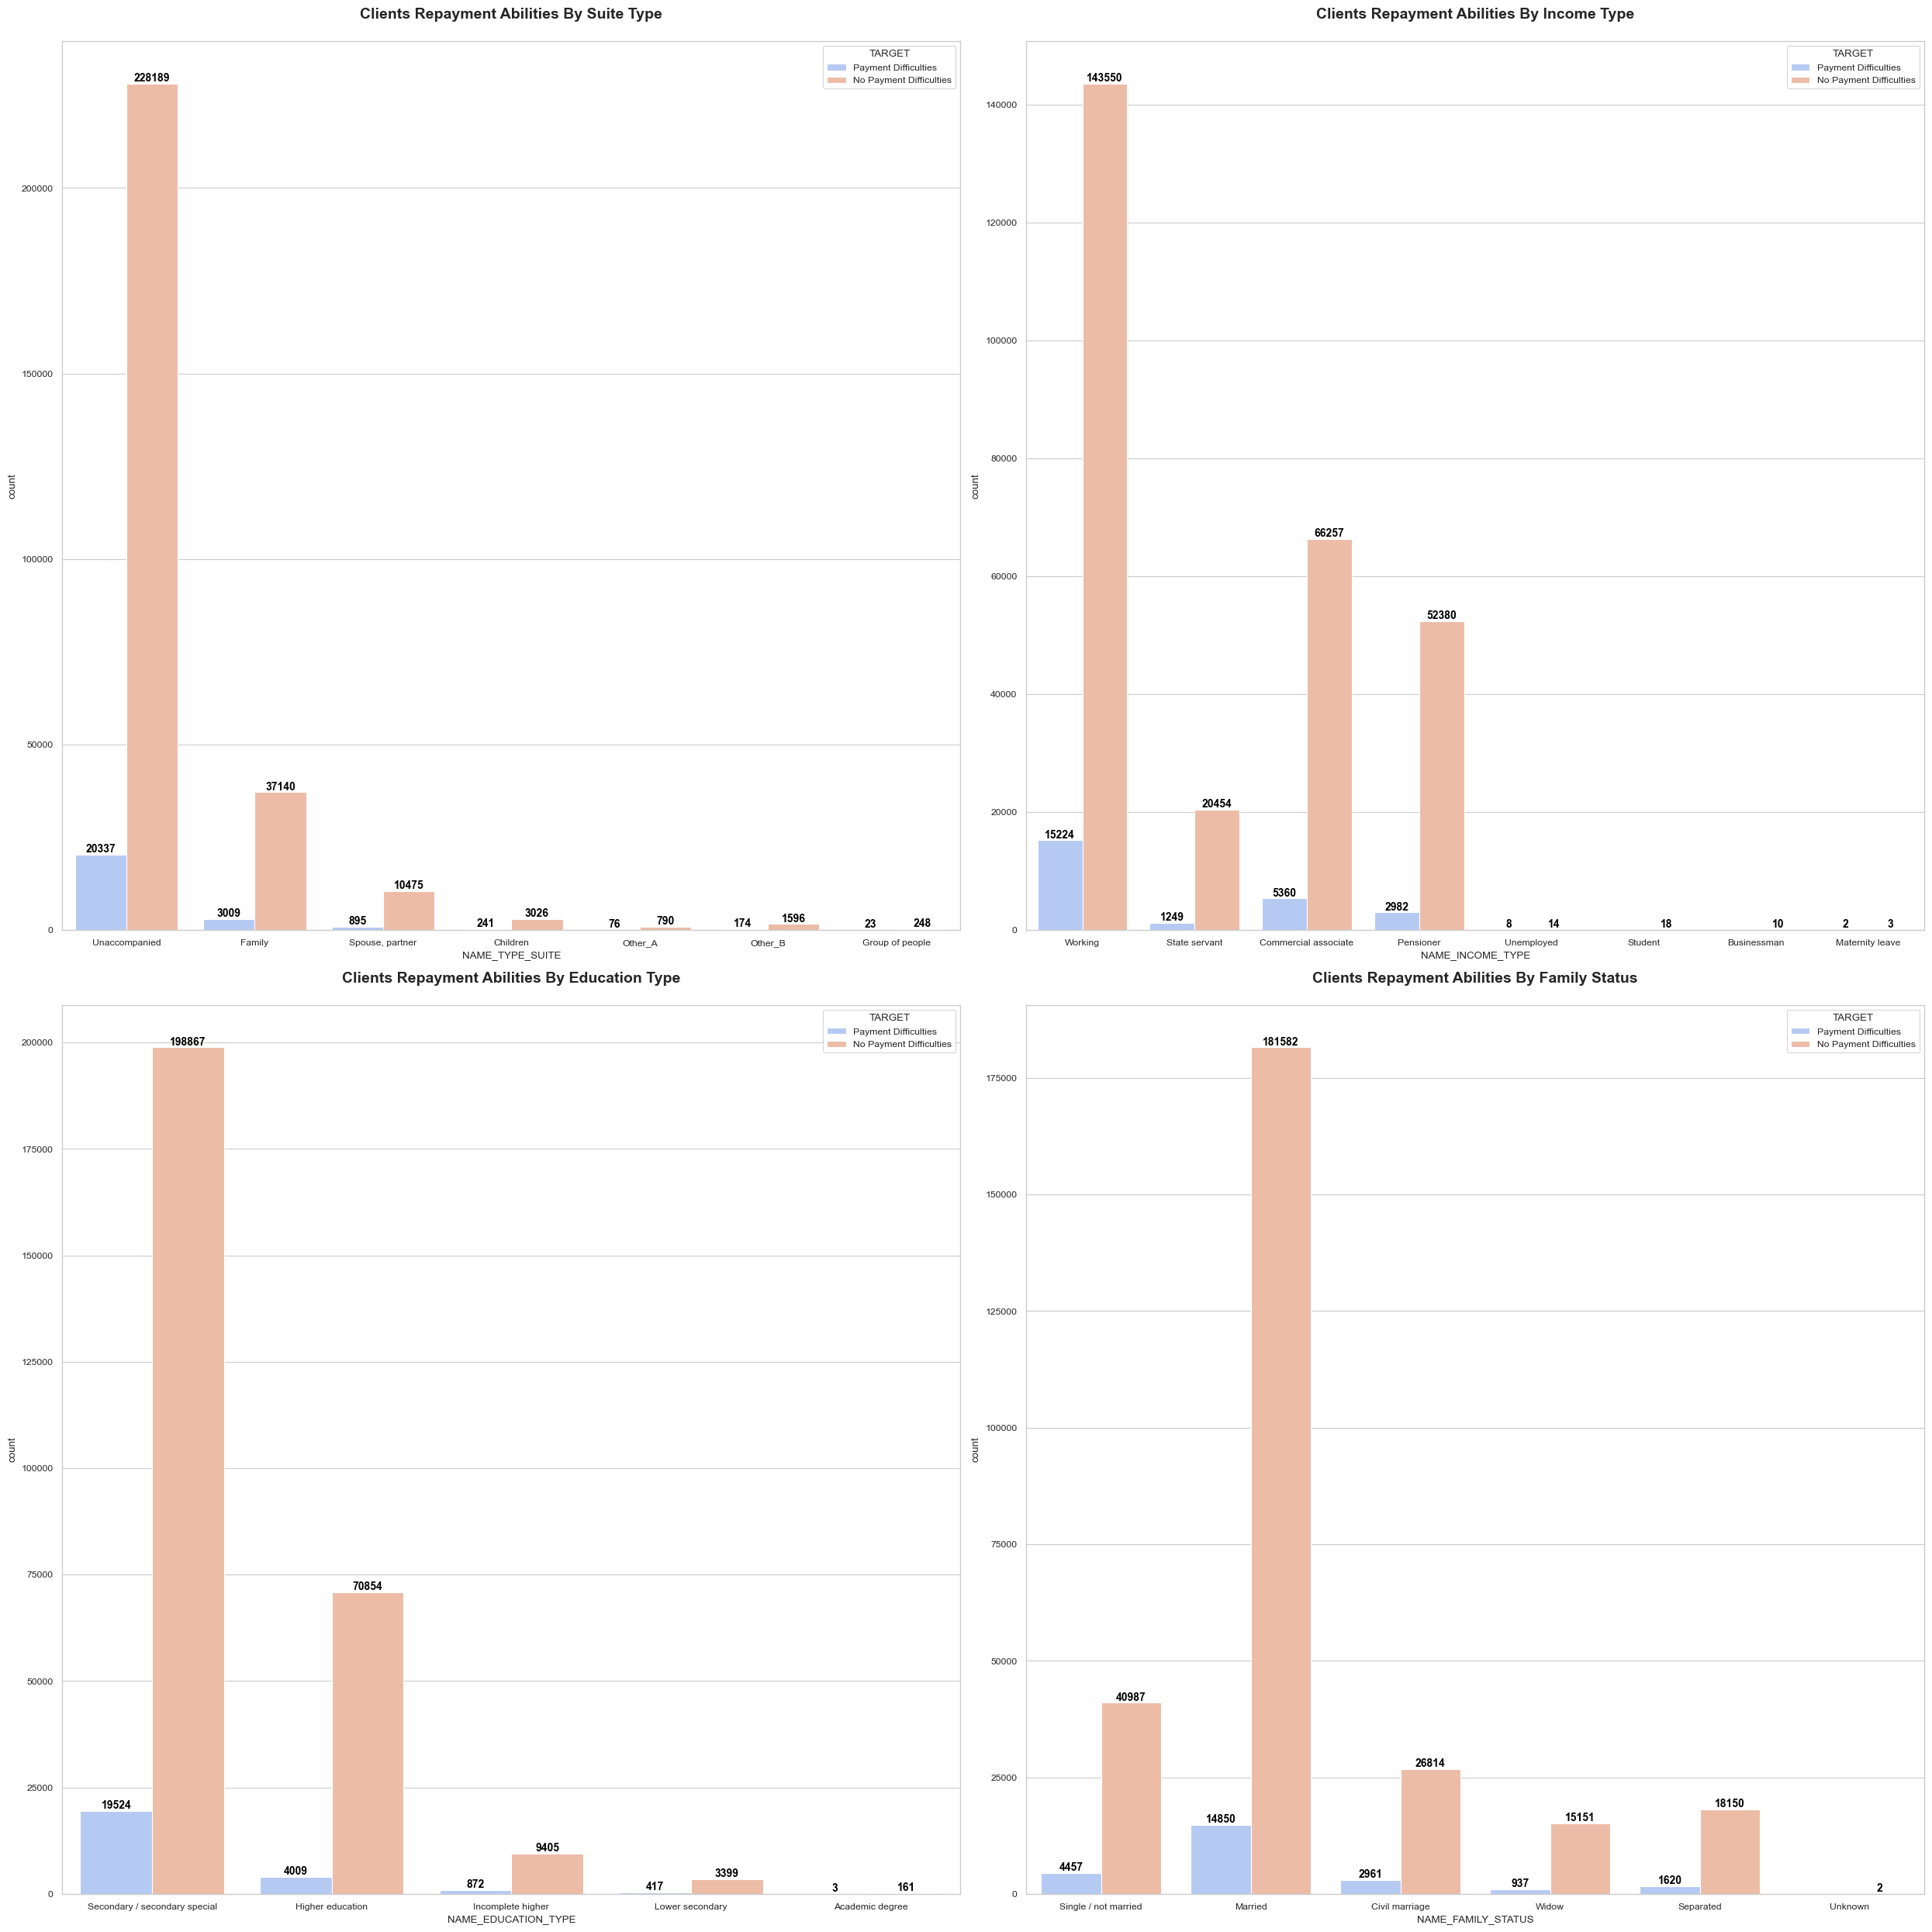

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah berdasarkan total semua kategori
def add_counts(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Tambahkan teks jumlah
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Plot 1: NAME_TYPE_SUITE vs TARGET
ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][0])
add_counts(ax[0][0], df, 'NAME_TYPE_SUITE')

# Plot 2: NAME_INCOME_TYPE vs TARGET
ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][1])
add_counts(ax[0][1], df, 'NAME_INCOME_TYPE')

# Plot 3: NAME_EDUCATION_TYPE vs TARGET
ax[1][0].set_title('Clients Repayment Abilities By Education Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][0])
add_counts(ax[1][0], df, 'NAME_EDUCATION_TYPE')

# Plot 4: NAME_FAMILY_STATUS vs TARGET
ax[1][1].set_title('Clients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][1])
add_counts(ax[1][1], df, 'NAME_FAMILY_STATUS')

# Menampilkan plot
plt.tight_layout()
plt.show()


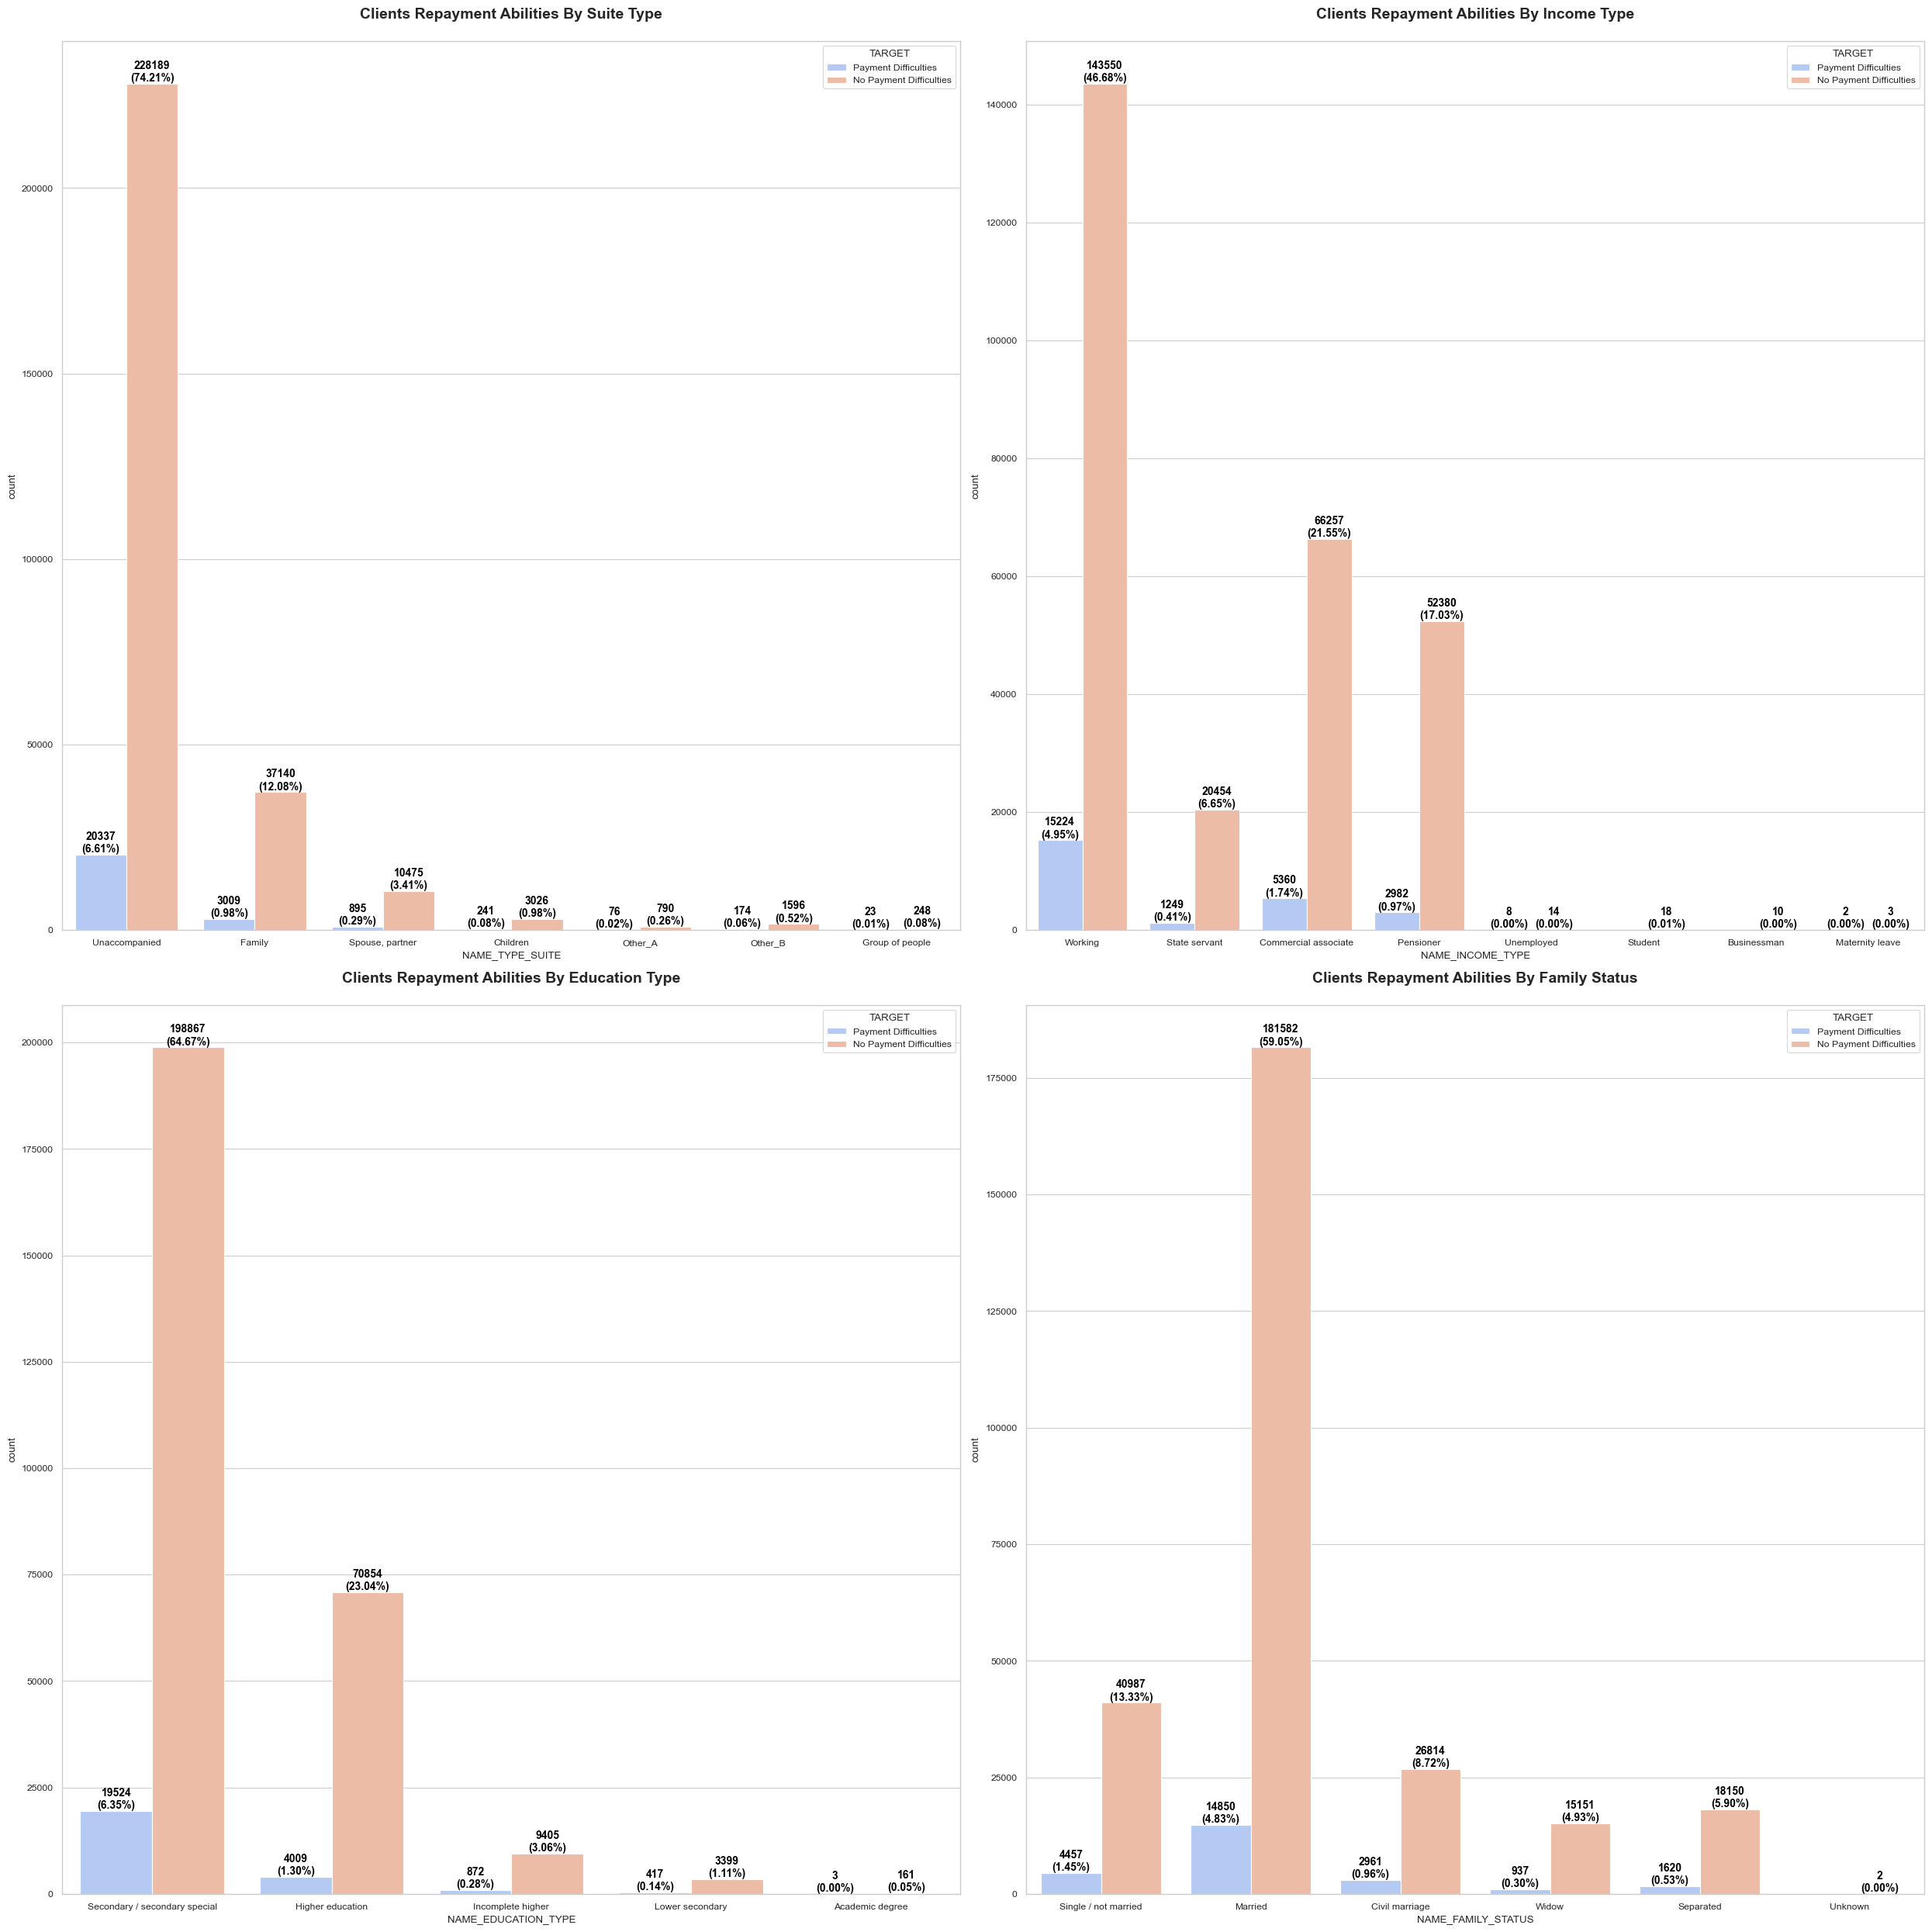

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah dan persentase berdasarkan total semua kategori
def add_counts_and_percentages(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Hitung persentase berdasarkan total semua kategori
            percentage = (height / total_all) * 100
            
            # Tambahkan teks jumlah dan persentase
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}\n({percentage:.2f}%)',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Plot 1: NAME_TYPE_SUITE vs TARGET
ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][0])
add_counts_and_percentages(ax[0][0], df, 'NAME_TYPE_SUITE')

# Plot 2: NAME_INCOME_TYPE vs TARGET
ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][1])
add_counts_and_percentages(ax[0][1], df, 'NAME_INCOME_TYPE')

# Plot 3: NAME_EDUCATION_TYPE vs TARGET
ax[1][0].set_title('Clients Repayment Abilities By Education Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][0])
add_counts_and_percentages(ax[1][0], df, 'NAME_EDUCATION_TYPE')

# Plot 4: NAME_FAMILY_STATUS vs TARGET
ax[1][1].set_title('Clients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][1])
add_counts_and_percentages(ax[1][1], df, 'NAME_FAMILY_STATUS')

# Menampilkan plot
plt.tight_layout()
plt.show()


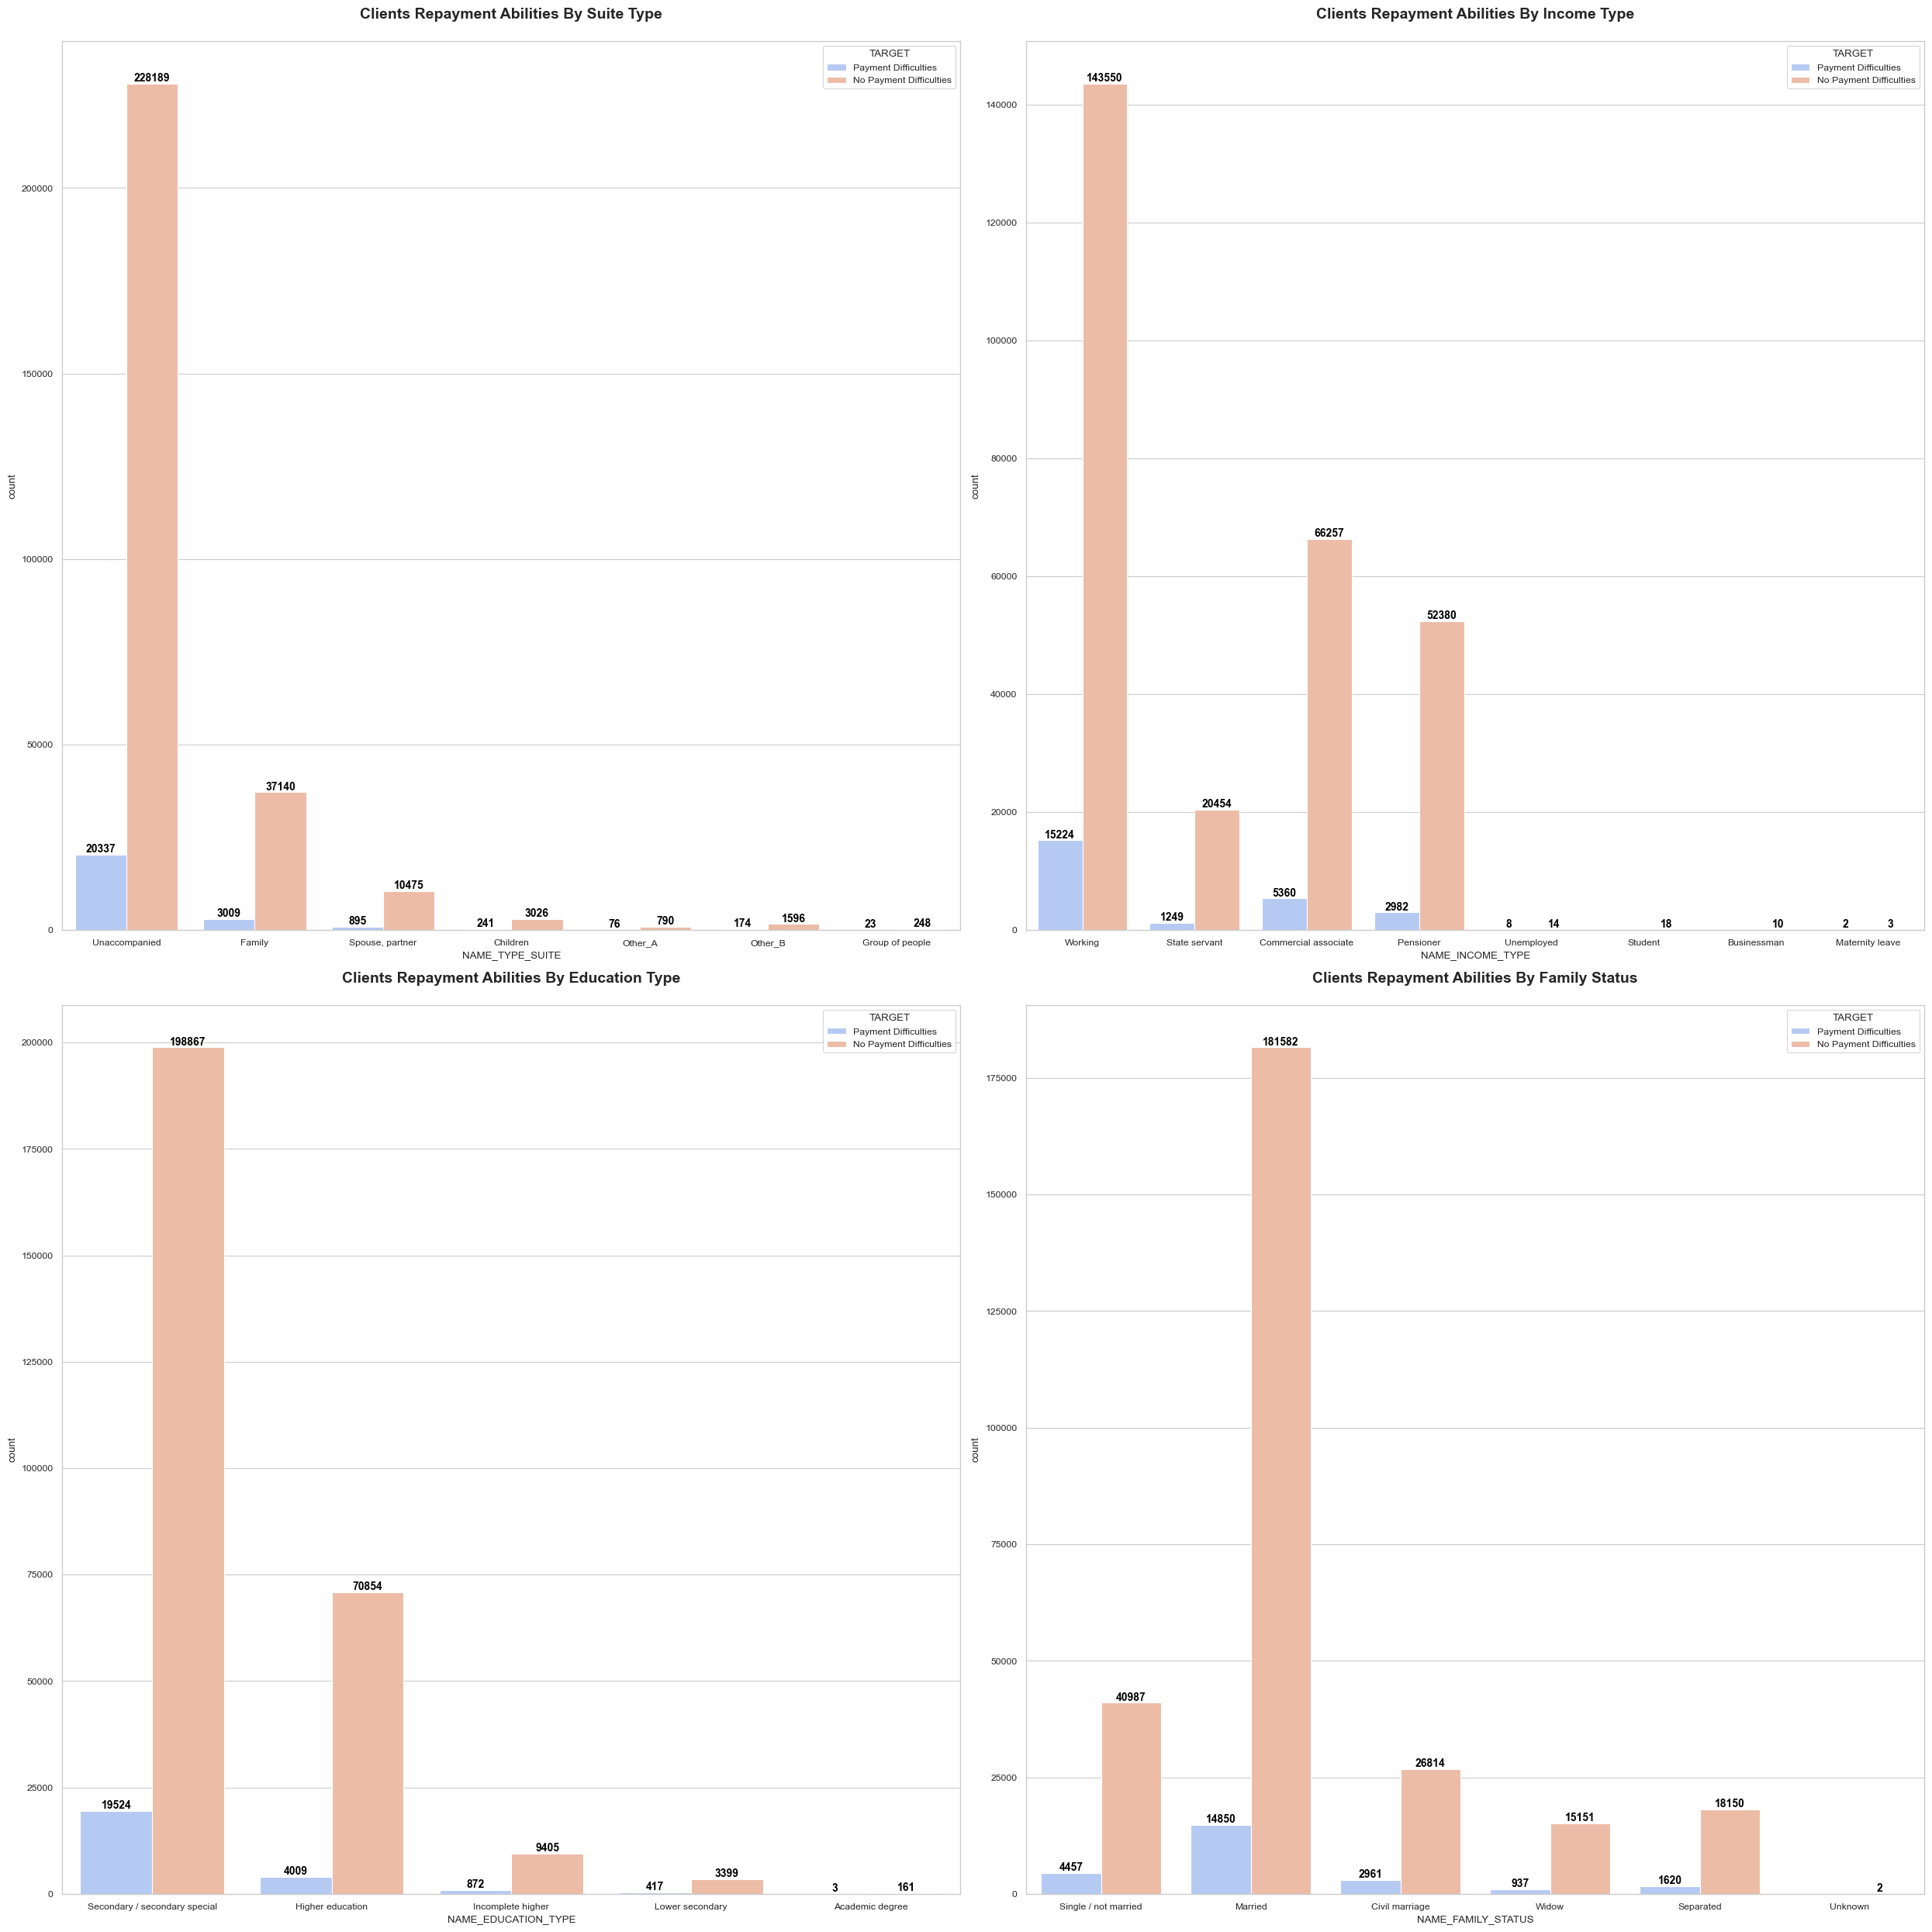

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah berdasarkan total semua kategori
def add_counts(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Tambahkan teks jumlah
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Plot 1: NAME_TYPE_SUITE vs TARGET
ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][0])
add_counts(ax[0][0], df, 'NAME_TYPE_SUITE')

# Plot 2: NAME_INCOME_TYPE vs TARGET
ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][1])
add_counts(ax[0][1], df, 'NAME_INCOME_TYPE')

# Plot 3: NAME_EDUCATION_TYPE vs TARGET
ax[1][0].set_title('Clients Repayment Abilities By Education Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][0])
add_counts(ax[1][0], df, 'NAME_EDUCATION_TYPE')

# Plot 4: NAME_FAMILY_STATUS vs TARGET
ax[1][1].set_title('Clients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][1])
add_counts(ax[1][1], df, 'NAME_FAMILY_STATUS')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [29]:
st = df.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
st.sort_values(by='SK_ID_CURR', ascending=False)
st.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


		NAME_TYPE_SUITE	TARGET
4	Other_B	0.098305
3	Other_A	0.087760
2	Group of people	0.084871
6	Unaccompanied	0.081830
5	Spouse, partner	0.078716
1	Family	0.074946
0	Children	0.073768


NAME_INCOME_TYPE	TARGET
2	Maternity leave	0.400000
6	Unemployed	0.363636
7	Working	0.095885
1	Commercial associate	0.074843
4	State servant	0.057550
3	Pensioner	0.053864
0	Businessman	0.000000
5	Student	0.000000

NAME_EDUCATION_TYPE	TARGET
3	Lower secondary	0.109277
4	Secondary / secondary special	0.089399
2	Incomplete higher	0.084850
1	Higher education	0.053551
0	Academic degree	0.018293

NAME_FAMILY_STATUS	TARGET
0	Civil marriage	0.099446
3	Single / not married	0.098077
2	Separated	0.081942
1	Married	0.075599
5	Widow	0.058242
4	Unknown	0.000000

1. client didampingi oleh type other_b saat mengajukan pinjaman yang memiliki persentase kesulitan membayar sebesar 9.8%

2. jenis pendapatan klien yang paling banyak mengajukan pinjaman berasal dari type working. Tetapi yang mengalami kesulitan alam membayar yaitu yang sedang cuti hamil melahirkan (40%) dan pengangguran (36%)

3. Tingkat Pendidikan yang paling banyak mengajukan pinjaman berasal dari secondary  sebanyak 218.391 hanya saja yang paling banyak mengalami kesulitan dalam membayar yaitu lower secondary 10.9%

4. klien yang banyak mengajukan pinjaman berasal dari keluarga yang sudah menikah 197.432, dengan status perkawinan sipil dan single memiliki kendala dalam membayar Kembali pinjaman sekitar 9%. 

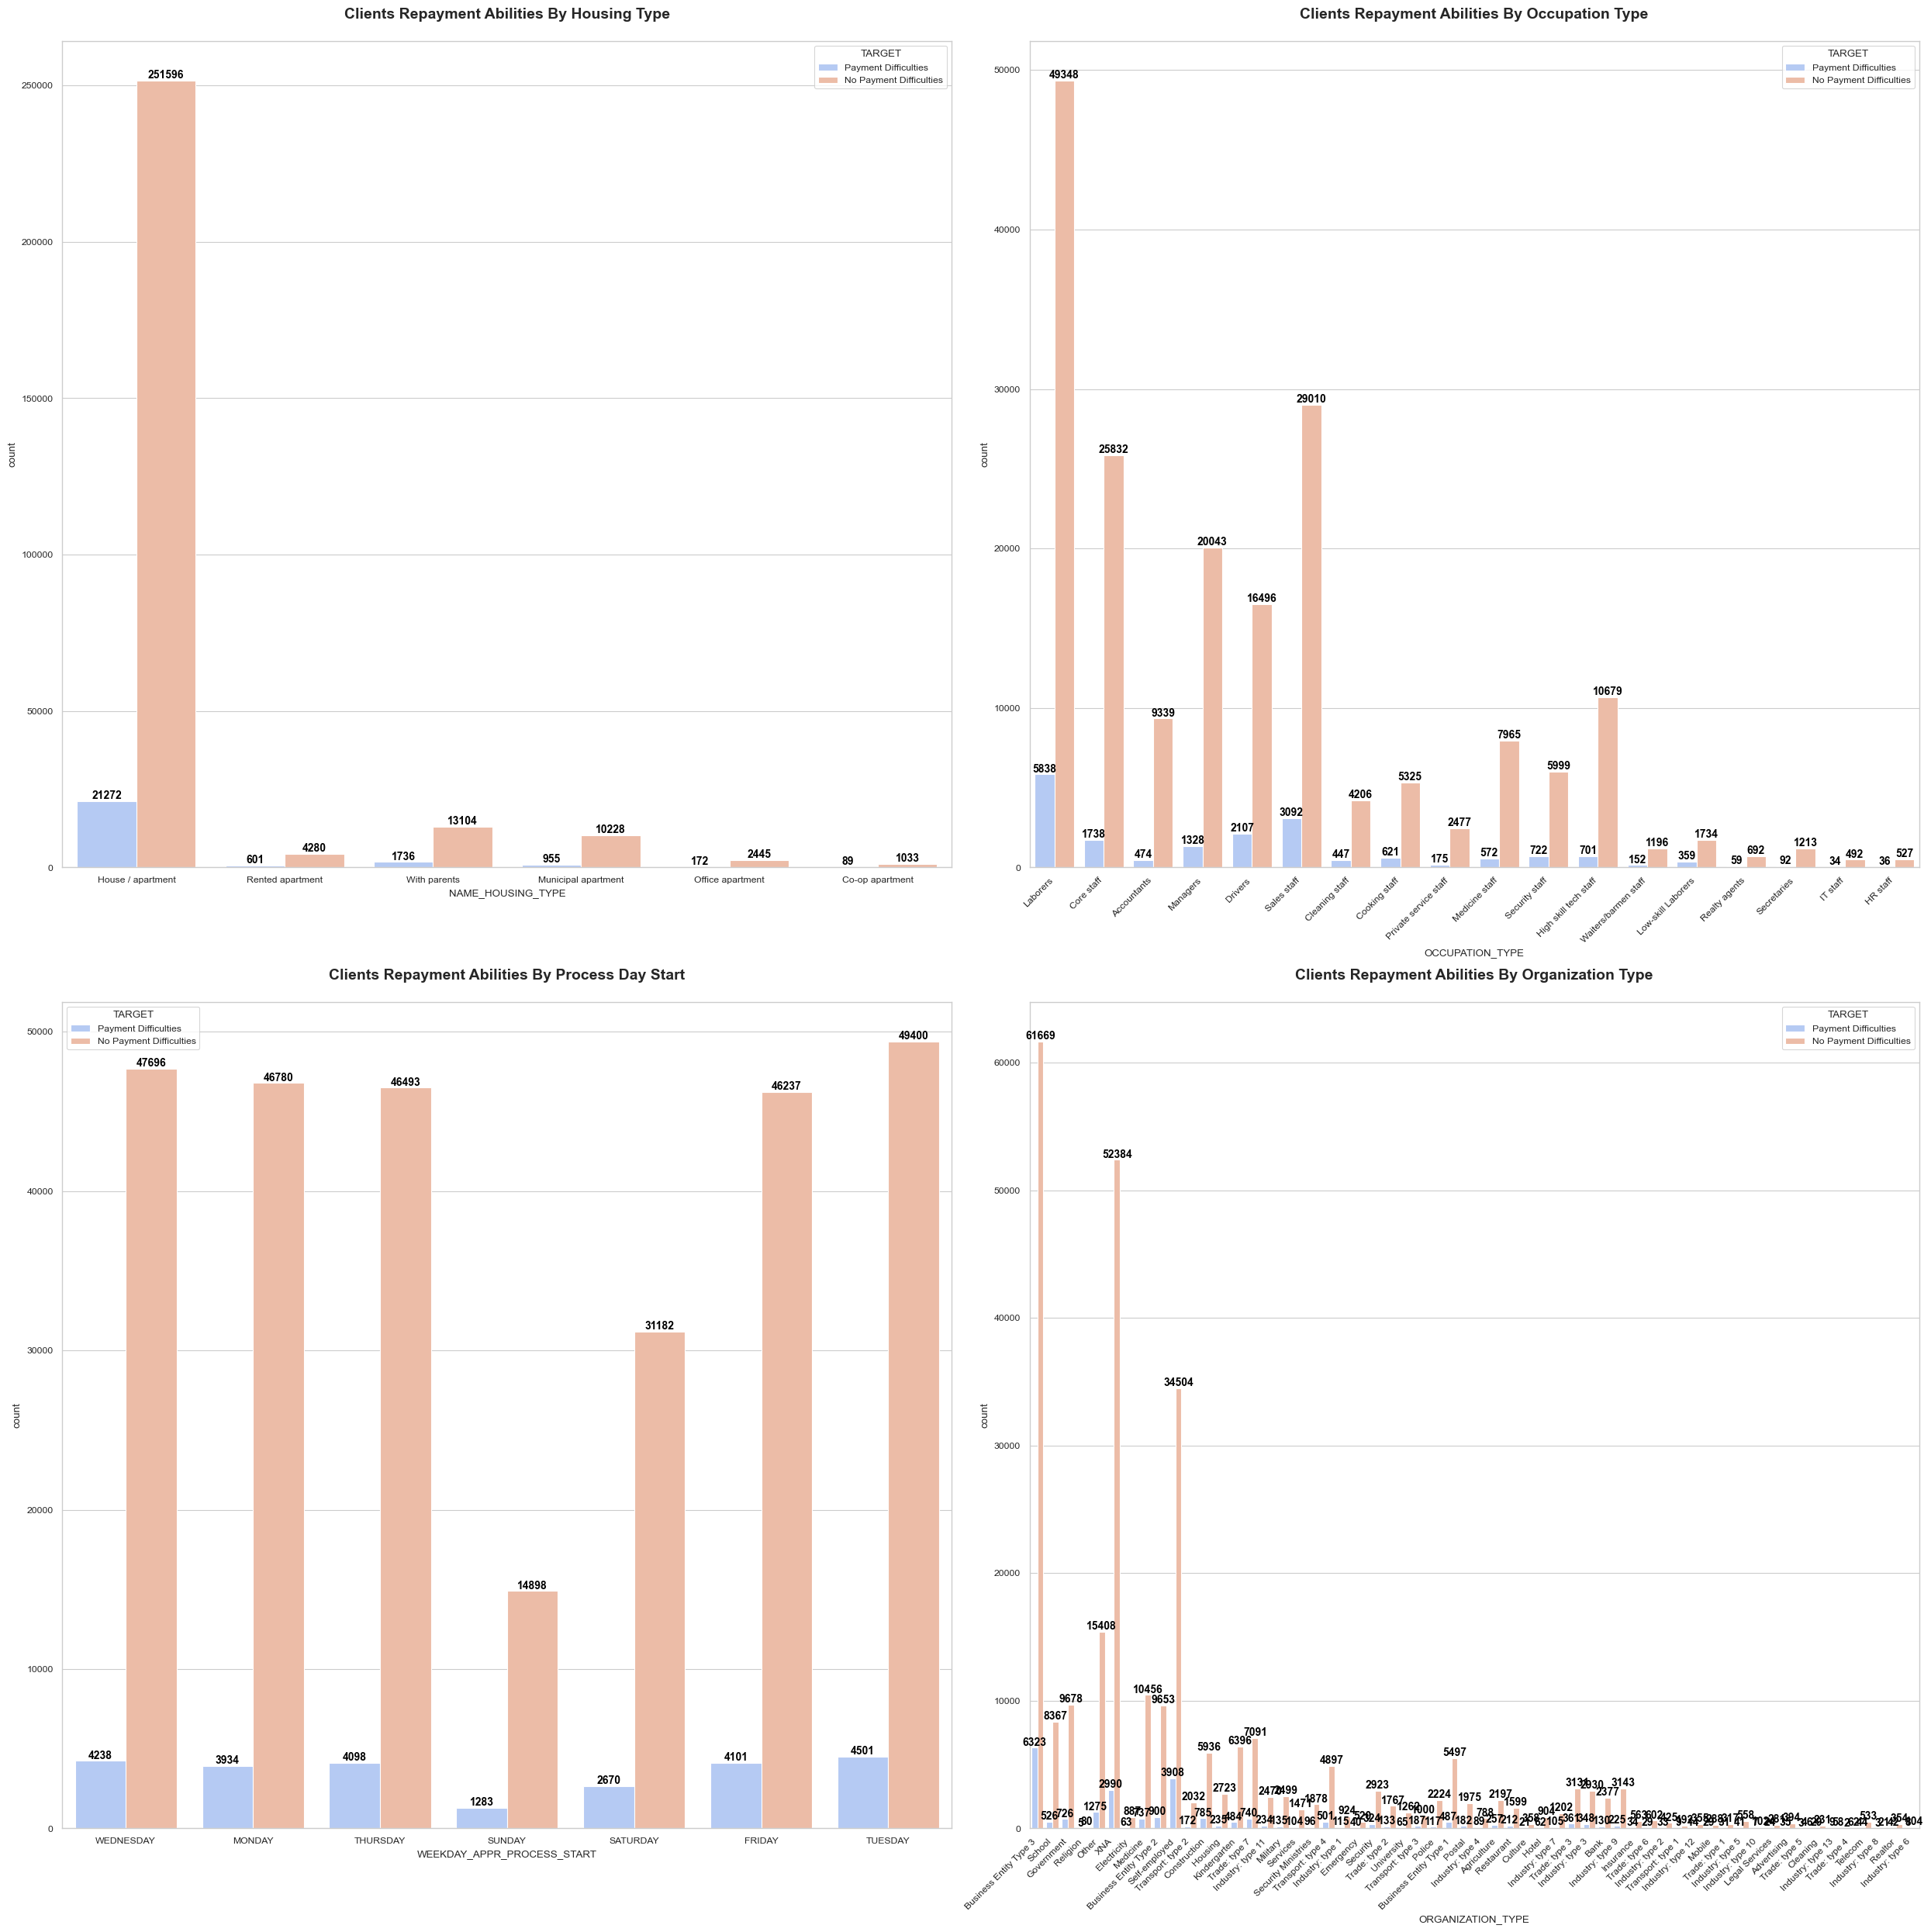

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah berdasarkan total semua kategori
def add_counts(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Tambahkan teks jumlah
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Plot 1: Housing Type vs TARGET
ax[0][0].set_title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_HOUSING_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][0])
add_counts(ax[0][0], df, 'NAME_HOUSING_TYPE')

# Plot 2: Occupation Type vs TARGET
ax[0][1].set_title('Clients Repayment Abilities By Occupation Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='OCCUPATION_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][1])
add_counts(ax[0][1], df, 'OCCUPATION_TYPE')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Process Day Start vs TARGET
ax[1][0].set_title('Clients Repayment Abilities By Process Day Start\n', fontweight='bold', fontsize=14)
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][0])
add_counts(ax[1][0], df, 'WEEKDAY_APPR_PROCESS_START')

# Plot 4: Organization Type vs TARGET
ax[1][1].set_title('Clients Repayment Abilities By Organization Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='ORGANIZATION_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][1])
add_counts(ax[1][1], df, 'ORGANIZATION_TYPE')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()


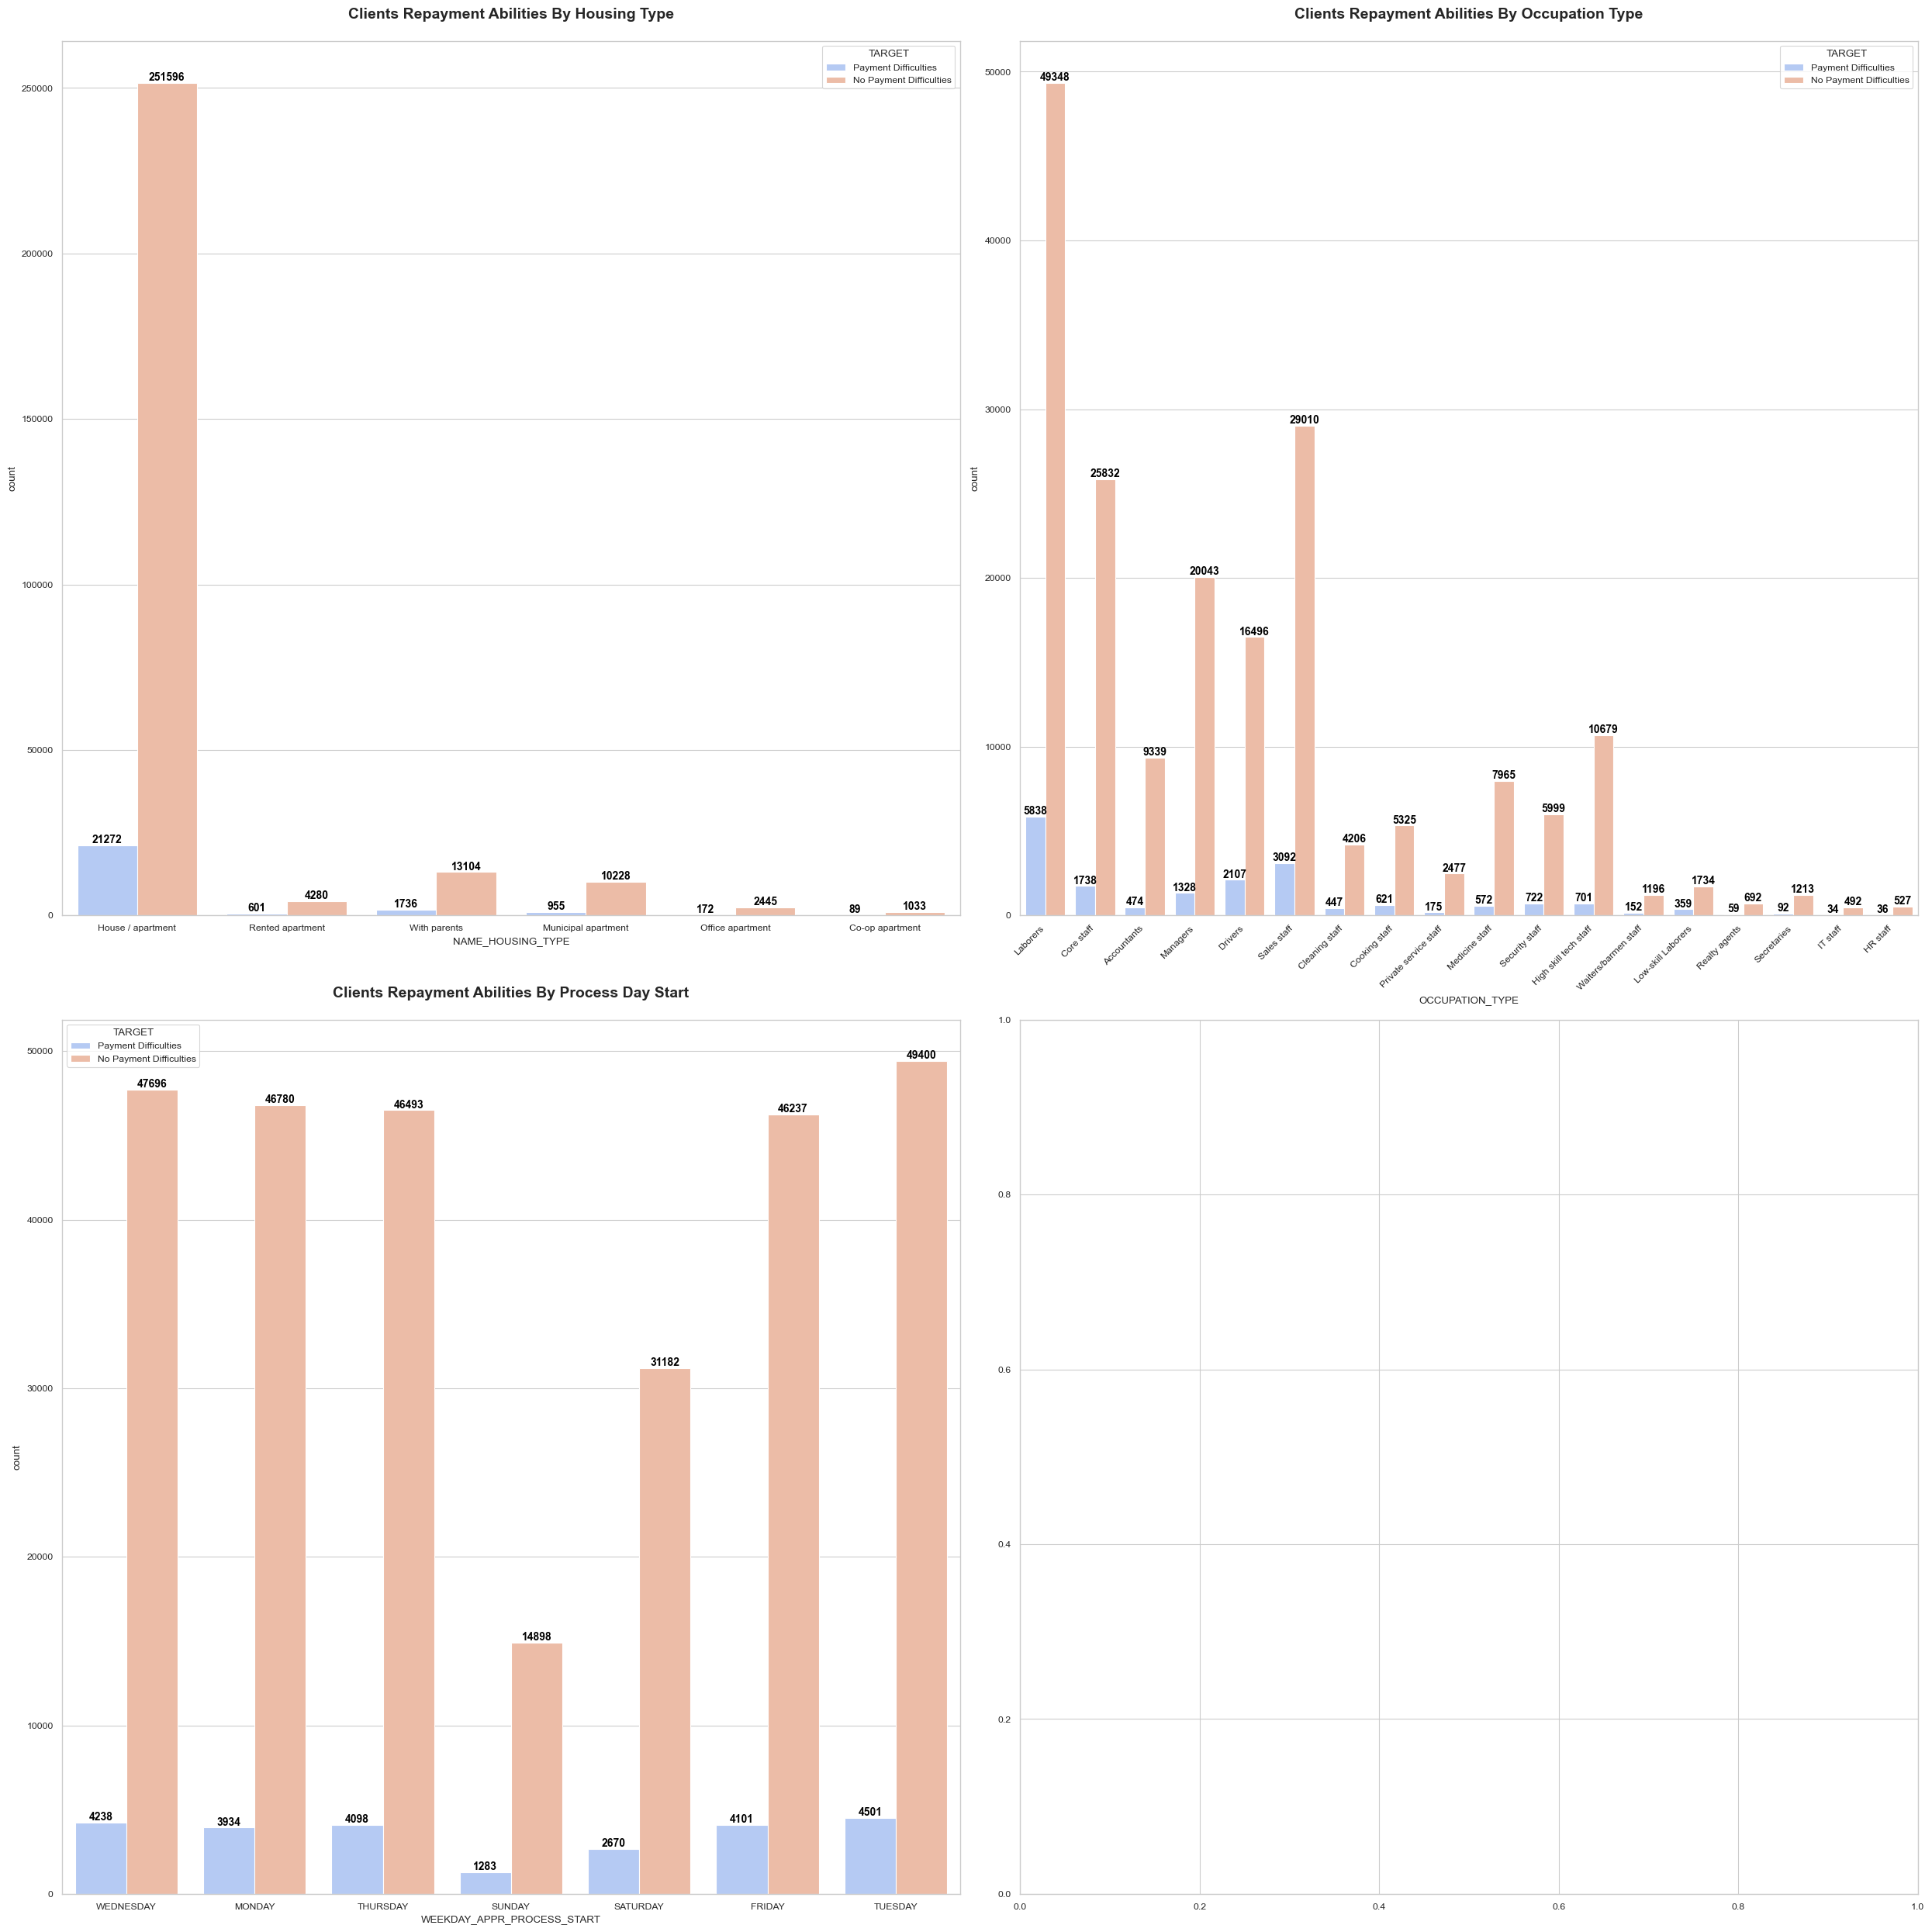

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah berdasarkan total semua kategori
def add_counts(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Tambahkan teks jumlah
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('paper', font_scale=1)

# Plot 1: Housing Type vs TARGET
ax[0][0].set_title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_HOUSING_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][0])
add_counts(ax[0][0], df, 'NAME_HOUSING_TYPE')

# Plot 2: Occupation Type vs TARGET
ax[0][1].set_title('Clients Repayment Abilities By Occupation Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='OCCUPATION_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax[0][1])
add_counts(ax[0][1], df, 'OCCUPATION_TYPE')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Process Day Start vs TARGET
ax[1][0].set_title('Clients Repayment Abilities By Process Day Start\n', fontweight='bold', fontsize=14)
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=df, hue='TARGET', palette='coolwarm', ax=ax[1][0])
add_counts(ax[1][0], df, 'WEEKDAY_APPR_PROCESS_START')

# Menampilkan plot
plt.tight_layout()
plt.show()


NAME_HOUSING_TYPE	TARGET
4	Rented apartment	0.123131
5	With parents	0.116981
2	Municipal apartment	0.085397
0	Co-op apartment	0.079323
1	House / apartment	0.077957
3	Office apartment	0.065724

	OCCUPATION_TYPE	TARGET
9	Low-skill Laborers	0.171524
4	Drivers	0.113261
17	Waiters/barmen staff	0.112760
16	Security staff	0.107424
8	Laborers	0.105788
2	Cooking staff	0.104440
14	Sales staff	0.096318
1	Cleaning staff	0.096067
13	Realty agents	0.078562
15	Secretaries	0.070498
11	Medicine staff	0.067002
12	Private service staff	0.065988
7	IT staff	0.064639
5	HR staff	0.063943
3	Core staff	0.063040
10	Managers	0.062140
6	High skill tech staff	0.061599
0	Accountants	0.048303


WEEKDAY_APPR_PROCESS_START	TARGET
5	TUESDAY	0.083505
6	WEDNESDAY	0.081604
0	FRIDAY	0.081469
4	THURSDAY	0.081003
3	SUNDAY	0.079291
2	SATURDAY	0.078873
1	MONDAY	0.077572

ORGANIZATION_TYPE	TARGET
54	Transport: type 3	0.157540
18	Industry: type 13	0.134328
25	Industry: type 8	0.125000
38	Restaurant	0.117062
7	Construction	0.116798
6	Cleaning	0.111538
14	Industry: type 1	0.110683
20	Industry: type 3	0.106162
36	Realtor	0.106061
1	Agriculture	0.104727
47	Trade: type 3	0.103379
42	Self-employed	0.101739
21	Industry: type 4	0.101482
40	Security	0.099784
51	Trade: type 7	0.094496
5	Business Entity Type 3	0.092996
55	Transport: type 4	0.092812
32	Mobile	0.091483
45	Trade: type 1	0.089080
16	Industry: type 11	0.086538
4	Business Entity Type 2	0.085284
35	Postal	0.084376
0	Advertising	0.081585
3	Business Entity Type 1	0.081384
24	Industry: type 7	0.080337
13	Housing	0.079446
29	Legal Services	0.078689
53	Transport: type 2	0.078040
33	Other	0.076425
44	Telecom	0.076256
19	Industry: type 2	0.072052
23	Industry: type 6	0.071429
10	Emergency	0.071429
28	Kindergarten	0.070349
46	Trade: type 2	0.070000
11	Government	0.069781
22	Industry: type 5	0.068447
26	Industry: type 9	0.066805
9	Electricity	0.066316
43	Services	0.066032
30	Medicine	0.065845
15	Industry: type 10	0.064220
12	Hotel	0.064182
49	Trade: type 5	0.061224
39	School	0.059148
37	Religion	0.058824
27	Insurance	0.056951
8	Culture	0.055409
57	XNA	0.053996
2	Bank	0.051855
31	Military	0.051253
34	Police	0.049979
56	University	0.048983
41	Security Ministries	0.048632
50	Trade: type 6	0.045959
52	Transport: type 1	0.044776
17	Industry: type 12	0.037940
48	Trade: type 4	0.031250


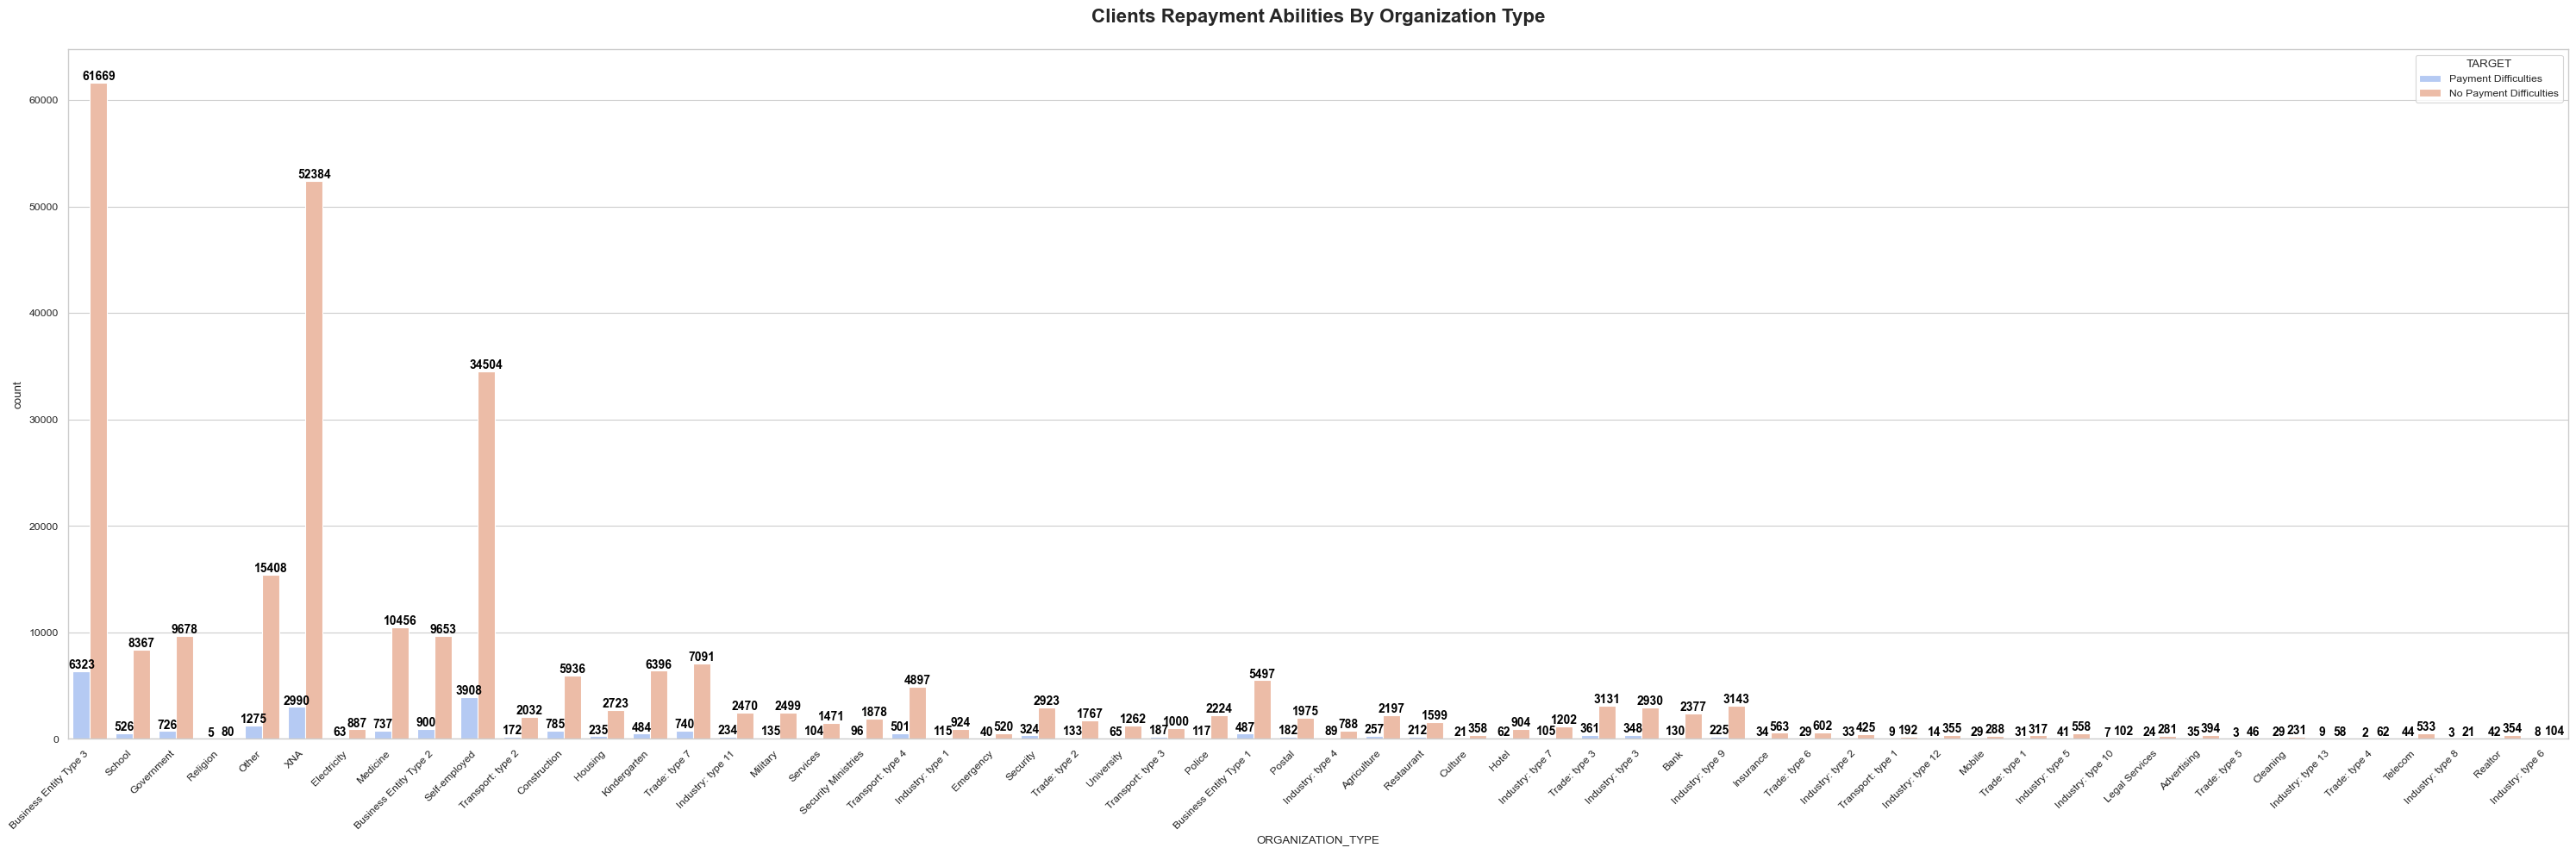

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan jumlah berdasarkan total semua kategori
def add_counts(ax, data, x_col):
    # Hitung total jumlah semua kategori
    total_all = len(data)
    
    # Loop melalui setiap bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x_val = bar.get_x() + bar.get_width() / 2  # Posisi tengah bar
            
            # Tambahkan teks jumlah
            if height > 0:
                ax.text(
                    x_val, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold'
                )

# Visualisasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
sns.set_context('paper', font_scale=1)

# Plot 4: Organization Type vs TARGET
ax.set_title('Clients Repayment Abilities By Organization Type\n', fontweight='bold', fontsize=16)
sns.countplot(x='ORGANIZATION_TYPE', data=df, hue='TARGET', palette='coolwarm', ax=ax)
add_counts(ax, df, 'ORGANIZATION_TYPE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()
plt.show()


1. klien yang mengajukan pinjaman banyak yang memiliki house/apartmenr dengan jumlah 272.868, hanya saja yang banyak mengalami kesulitan alam membayar pinjaman Rented apartment sebesar 12.3%

2. pengajuan pinjaman banyak berasal dari pekerja yang bekerja sebagai buruh 55.186. Yang banyak mengalami kesulitan dalam pembayaran yaitu perkerja yang berketerampilan rendah yang paling tinggi 17%. 

3. klien banyak mengajukan pinjaman pada hari kamis. 

4. Terlihat bahwa klien business entity type 3 memiliki jumlah engajuan paling banyak 67.992. Tetapi jenis transportasi organisasi: tipe 3 memiliki persentase tertinggi (sekitar 15%)

### Mutivariate Analysis

#### Group By Realty Ownership Status

###### 1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

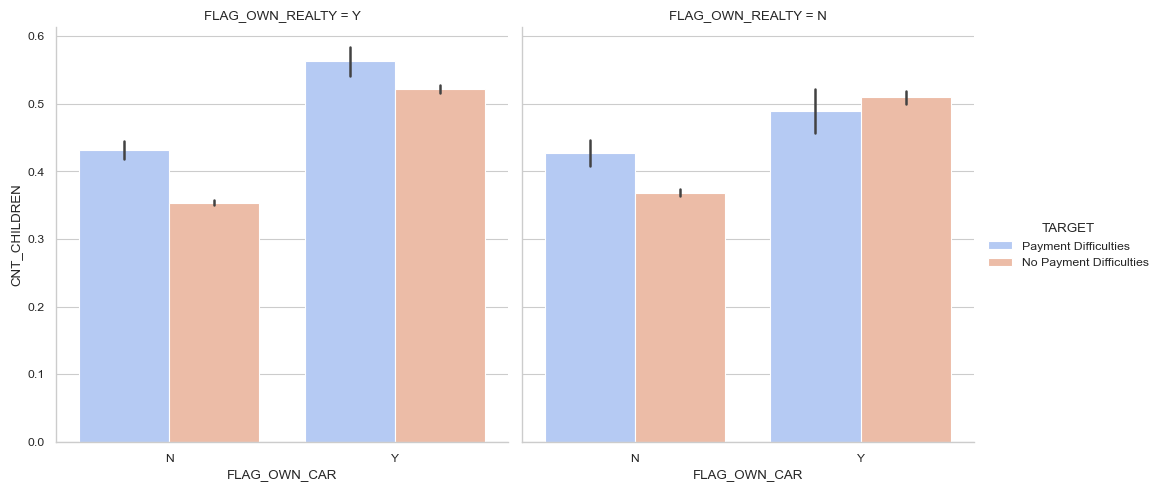

In [33]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar',
            palette = 'coolwarm',
            data = df
            )
plt.show()

klien yang memiliki anak, properti dan memiliki mobil mengalami mobil cenderung mengalami kesulitan pembayaran hal ini menunjukkan bahwa tambahan beban keuangan (seperti biaya perawatan anak dan biaya kendaraan) dapat memberikan tekanan pada kemampuan pembayaran 

###### 2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

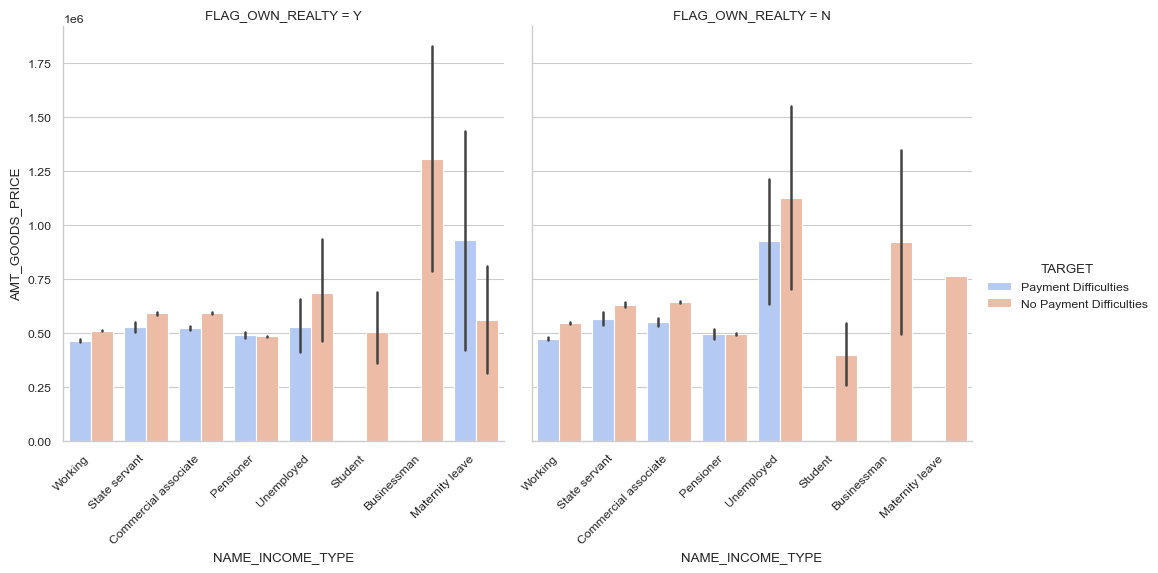

In [34]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
                  y = 'AMT_GOODS_PRICE',
                  hue = 'TARGET',
                  col = 'FLAG_OWN_REALTY',
                  kind = 'bar',
                  palette = 'coolwarm',
                  data = df
                  )

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Banyak klien yang mengalami kesulitan dalam membayar barang yang didanai dari pinjaman berasal dari klien cuti hamil melahirkan dan pengangguran. jenis pekerjaan sebagai sumber pendapatan dan kepemilikan properti memberikan gambaran terhadap profil resiko kredit juga berpengaruh terhadap harga barang yang dibeli dan kemampuan pembayaran. 

###### 3. Family Status, Amount of Income, Target, and House/Flat Ownership Status

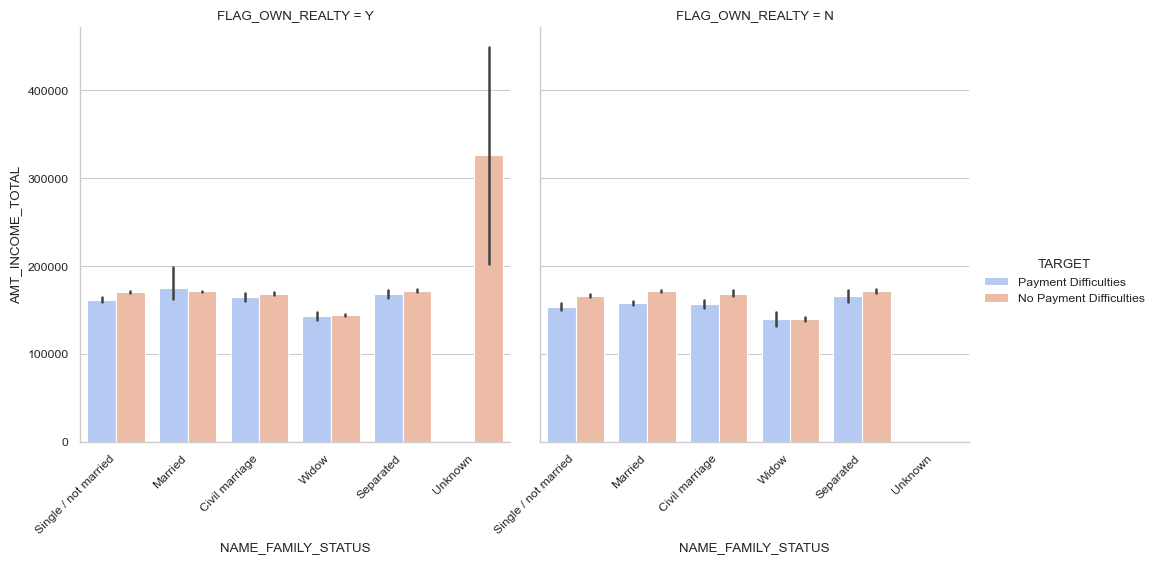

In [35]:

fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', 
            palette = 'coolwarm',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

klien yang sudah menikah dan memiliki properti cenderung mengalami kesulitan pembayaran dengan pendapatan rata-rata dibandingkan dengan klien yang tidak memiliki properti. pasangan yang sudah menikah umumnya memiliki tanggungan keluarga, ex: biaya pendidikan anak, operasional keluarga, kesehatan dan biaya lainnya. disamping itu memiliki propertipun melibatkan banyak biaya seperti biaya perawatan, pajak, perbaikan dan lainnya. 

#### Group by Car Ownership Status

###### 1. Contract Type, The Number of Children, Target, and Car Ownership Status

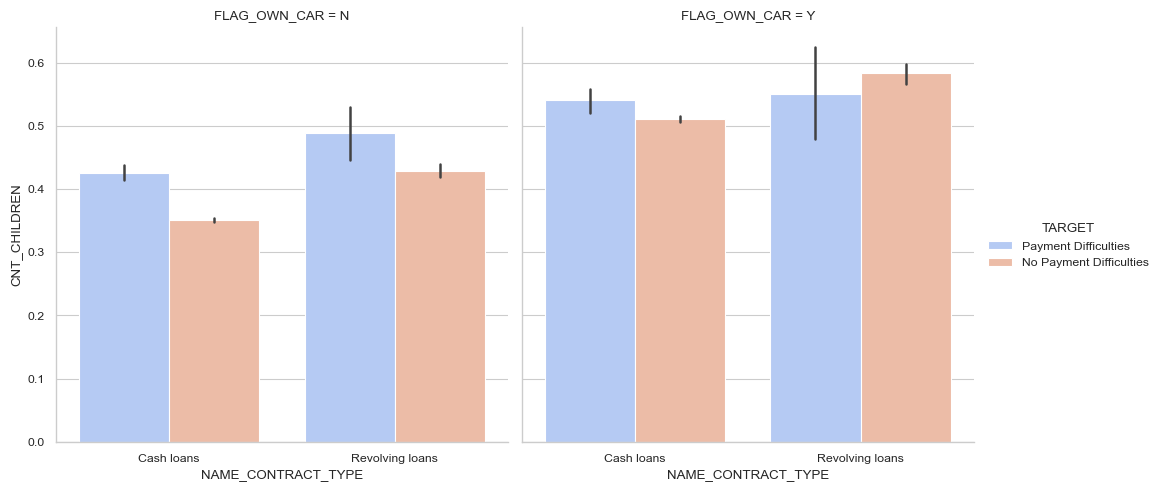

In [36]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', 
            palette = 'coolwarm',
            data = df)
plt.show()

klien yang tidak memiliki mobil dan pinjaman kredit(revolving loans) mengalami kesulitan pembayaran dibandingkan dengan yang memiliki mobil. hal ini dapat terjadi salah satunya karena kemampuan finasisal yang berbeda, jumlah pendapatan, profil pinjaman (bunga, jangka waktu, jumlah pinjaman), dan pengeluaran bulanan klien. 

#### Group by Contract Type

###### 1. Income Type, Amount of Credit, Target, and Contract Type

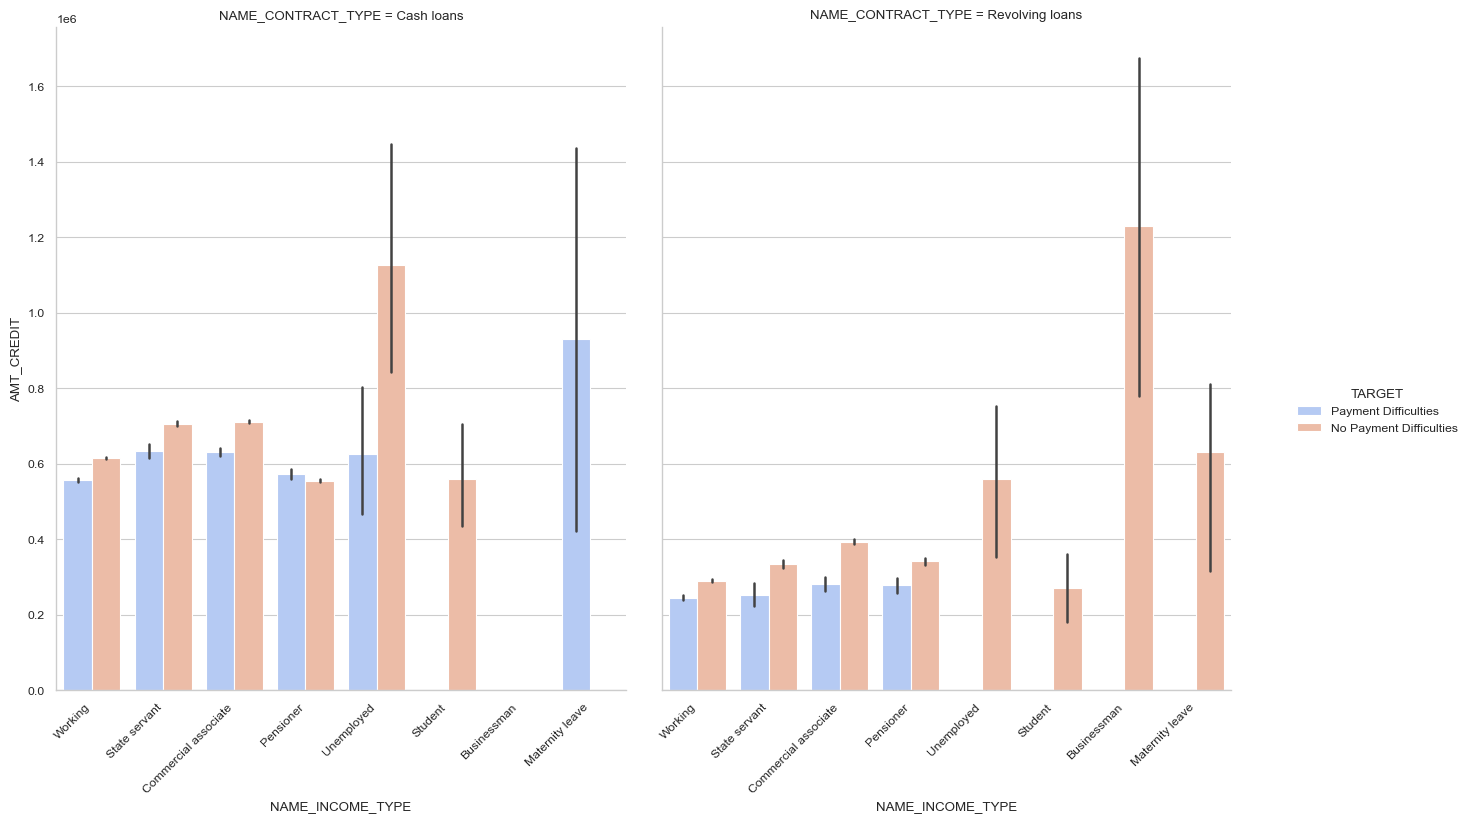

In [37]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', 
            palette = 'coolwarm',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

klien yang sedang mengambil cuti hamil dan melahirkan mngambil jumlah kredit dengan cash yang cukup besar tapi mengalami kesulitan pada pembayaran  dibandingkan dengan yang mengambil pinjaman secara revolving yang tidak mengalami kesulitan dalam pembayran. 

hampir 50% jumlah pinjaman klien pengangguran yang mengambil pinjaman cash mengalami masalah dalam pembayaran, sementara klien yang mengambil pinjaman dengan revolving loans tidak mengalami kesulitan pembayaran. 

semua student yang mengambil pinjaman baik cash maupun revolving loans tidak mengalami kesulitan pembayaran dengan jumlah pinjaman kredit yang rendah hingga mengengah. 

#### Grouped by Rating of Region where Client Lives

###### 1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

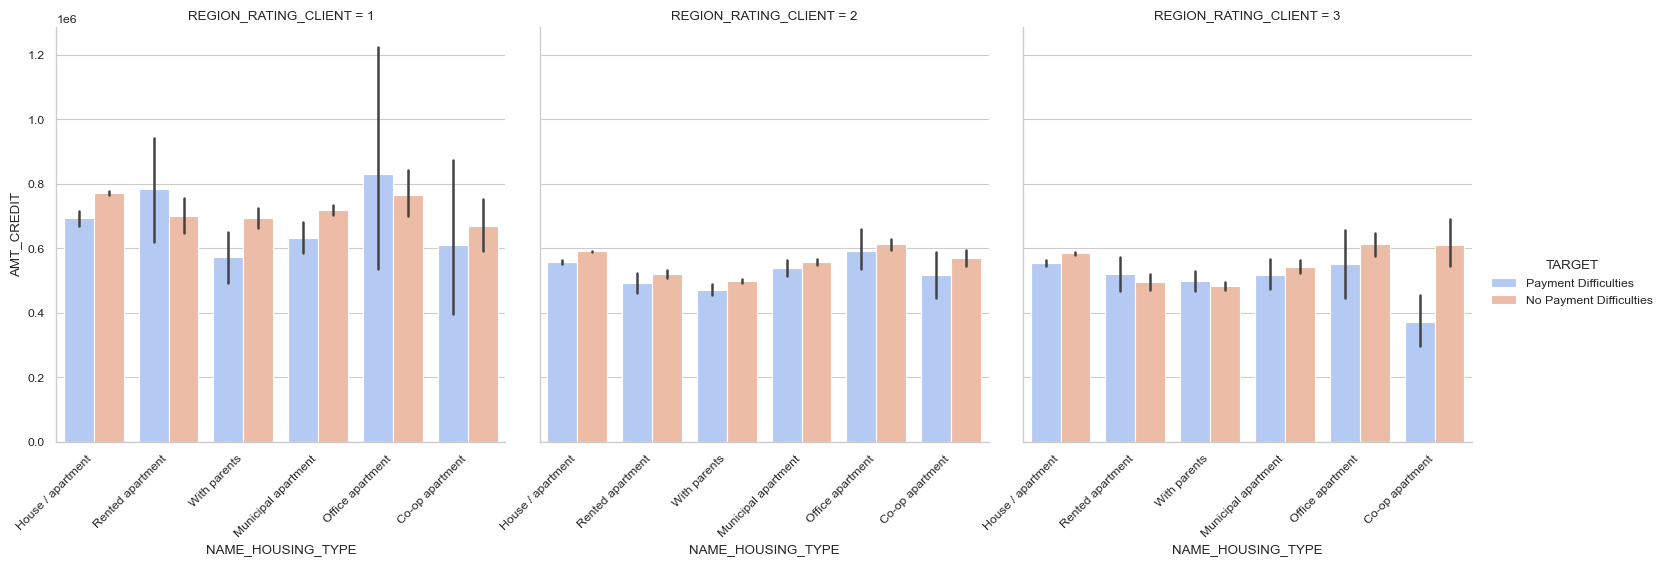

In [38]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar',
            palette = 'coolwarm',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

klien dengan Rented apt dan office apt serta tinggal di region 1 mengalami kesulitan dalam pembayaran pinjaman di bandingkan pada region 2 untuk jumlah pinjaman kredit yang menengah. pada di region 3 rented apt mengalami kesulitan pembayaran sementara office apt lebih banyak yang tidak mnegalami kesulitan dalam pembayran. 

###### 2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

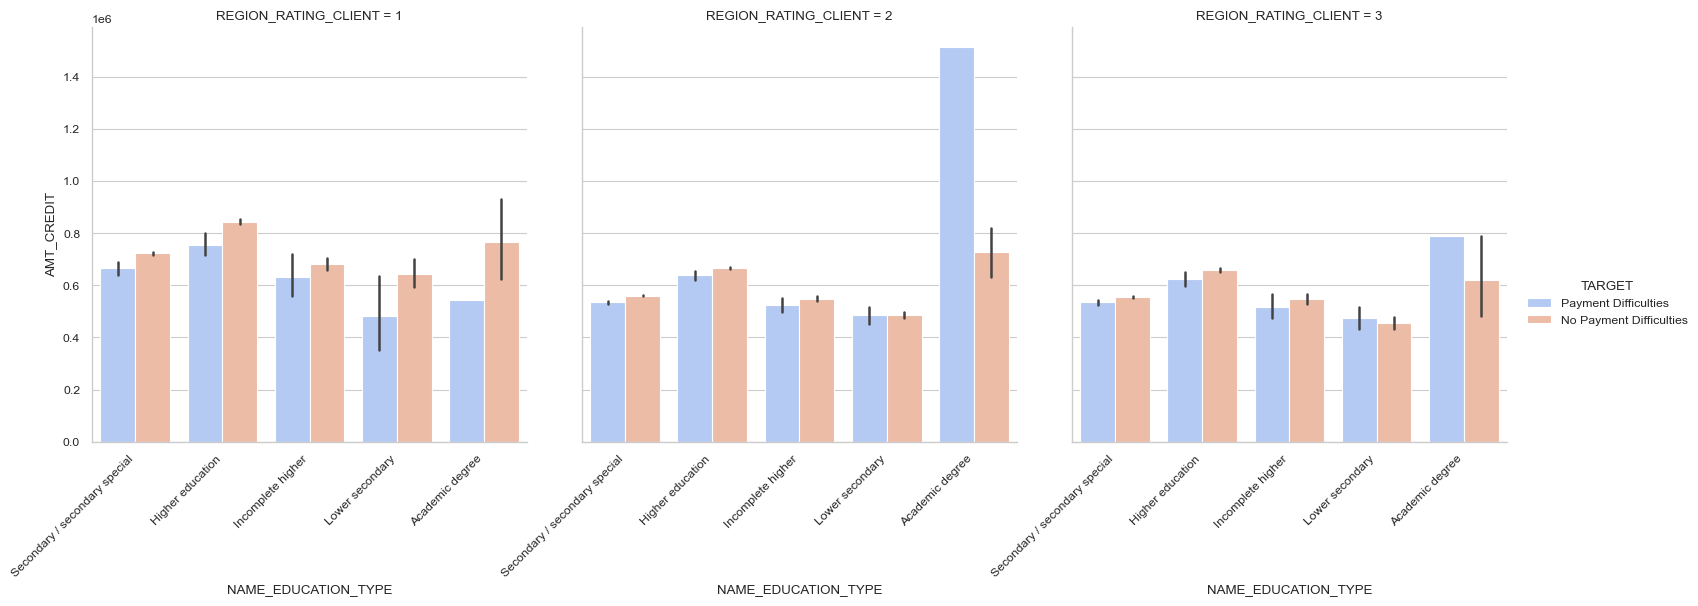

In [39]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', 
            palette = 'coolwarm',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

klien memiliki gelar akademis yang tinggal di region 2 memiliki kesulitan pembayaran dengan jumlah pinjaman kredit yang lebih tinggi, serta klien dengan gelar yang sama di region 3 memiliki masalah pembayaran untuk jumlah kredit yang sedag. 

###### 3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

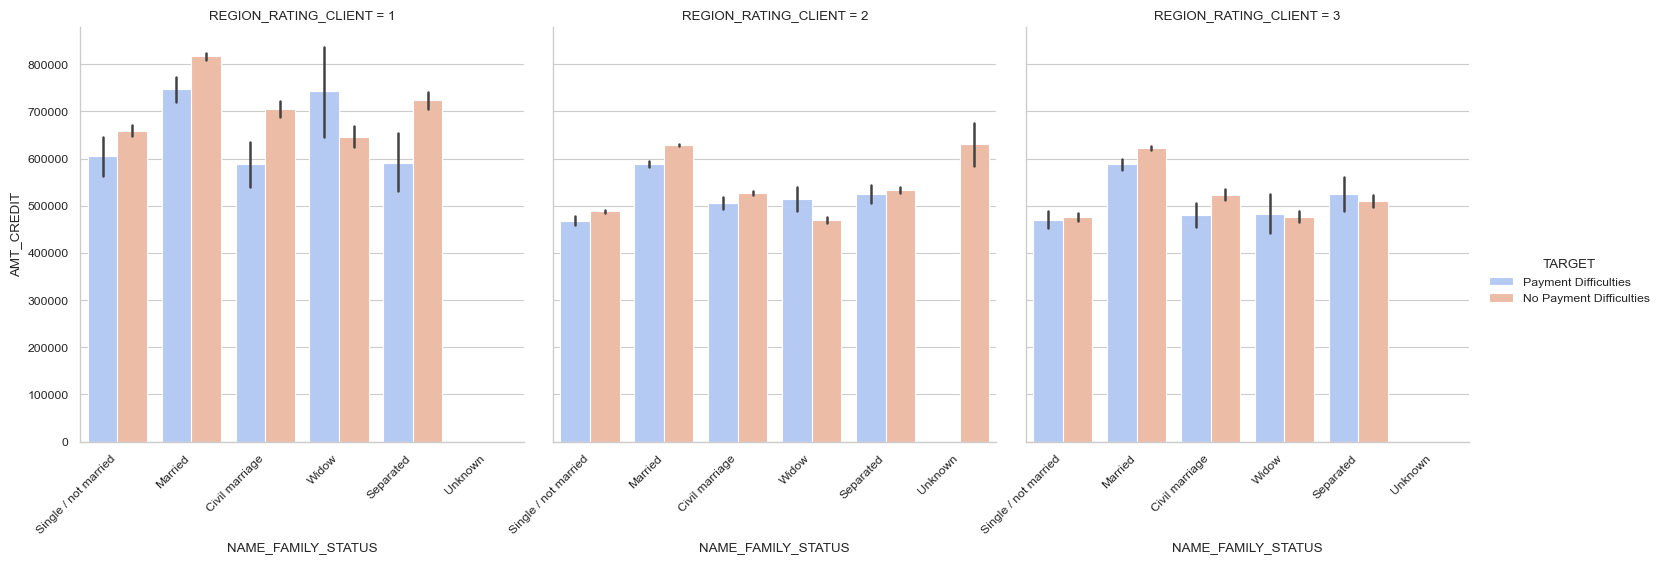

In [40]:

fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', 
            palette = 'coolwarm',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

klien yang berstatus janda(widow) yang tinggal di region 1,2,3 mengalami kesulitan dalam pembayaran jumlah pinjaman kredit yang sedang hingga tinggi. 

klien yang berstatus seperated yang tinggal di region 3 mengalami kesulitan pembayaran untuk jumlah pinjaman kredit yang moderat dibandingkan dengan klien yang tidanggal di region 1 dan 2. 

# Data Preprocessing

#### 1. Check Data Duplicate

In [41]:
df.duplicated().sum()

0

#### 2. Check Missing Value Data

In [42]:
# Menghitung jumlah nilai yang hilang dan persentasenya
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100

# Menggabungkan hasil ke dalam satu DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Menampilkan hasil
print(missing_data)


                              Missing Values  Percentage (%)
SK_ID_CURR                         0           0.000000     
TARGET                             0           0.000000     
NAME_CONTRACT_TYPE                 0           0.000000     
CODE_GENDER                        0           0.000000     
FLAG_OWN_CAR                       0           0.000000     
FLAG_OWN_REALTY                    0           0.000000     
CNT_CHILDREN                       0           0.000000     
AMT_INCOME_TOTAL                   0           0.000000     
AMT_CREDIT                         0           0.000000     
AMT_ANNUITY                       12           0.003902     
AMT_GOODS_PRICE                  278           0.090403     
NAME_TYPE_SUITE                 1292           0.420148     
NAME_INCOME_TYPE                   0           0.000000     
NAME_EDUCATION_TYPE                0           0.000000     
NAME_FAMILY_STATUS                 0           0.000000     
NAME_HOUSING_TYPE       

In [43]:
# drop features that have large number of missing values (± 50%)
df.drop(df.iloc[:,44:91], inplace=True, axis=1)
df.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [44]:
# after drop some features
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index                         Total Null Values  Percentage
0               OCCUPATION_TYPE  96391              31.345545 
1                  EXT_SOURCE_3  60965              19.825307 
2    AMT_REQ_CREDIT_BUREAU_YEAR  41519              13.501631 
3     AMT_REQ_CREDIT_BUREAU_QRT  41519              13.501631 
4     AMT_REQ_CREDIT_BUREAU_MON  41519              13.501631 
5    AMT_REQ_CREDIT_BUREAU_WEEK  41519              13.501631 
6     AMT_REQ_CREDIT_BUREAU_DAY  41519              13.501631 
7    AMT_REQ_CREDIT_BUREAU_HOUR  41519              13.501631 
8               NAME_TYPE_SUITE   1292               0.420148 
9      DEF_60_CNT_SOCIAL_CIRCLE   1021               0.332021 
10     OBS_60_CNT_SOCIAL_CIRCLE   1021               0.332021 
11     DEF_30_CNT_SOCIAL_CIRCLE   1021               0.332021 
12     OBS_30_CNT_SOCIAL_CIRCLE   1021               0.332021 
13                 EXT_SOURCE_2    660               0.214626 
14              AMT_GOODS_PRICE    278               0.090403 
15                  AMT_ANNUITY     12               0.003902 
16              CNT_FAM_MEMBERS      2               0.000650 
17       DAYS_LAST_PHONE_CHANGE      1               0.000325 
18              FLAG_DOCUMENT_7      0               0.000000 
19              FLAG_DOCUMENT_2      0               0.000000 
20              FLAG_DOCUMENT_3      0               0.000000 
21              FLAG_DOCUMENT_4      0               0.000000 
22              FLAG_DOCUMENT_5      0               0.000000 
23              FLAG_DOCUMENT_6      0               0.000000 
24                   SK_ID_CURR      0               0.000000 
25              FLAG_DOCUMENT_8      0               0.000000 
26              FLAG_DOCUMENT_9      0               0.000000 
27             FLAG_DOCUMENT_10      0               0.000000 
28             FLAG_DOCUMENT_11      0               0.000000 
29             FLAG_DOCUMENT_12      0               0.000000 
30             FLAG_DOCUMENT_14      0               0.000000 
31             FLAG_DOCUMENT_15      0               0.000000 
32             FLAG_DOCUMENT_16      0               0.000000 
33             FLAG_DOCUMENT_17      0               0.000000 
34             FLAG_DOCUMENT_18      0               0.000000 
35             FLAG_DOCUMENT_19      0               0.000000 
36             FLAG_DOCUMENT_20      0               0.000000 
37             FLAG_DOCUMENT_21      0               0.000000 
38             FLAG_DOCUMENT_13      0               0.000000 
39       REG_CITY_NOT_WORK_CITY      0               0.000000 
40            ORGANIZATION_TYPE      0               0.000000 
41             NAME_INCOME_TYPE      0               0.000000 
42                DAYS_EMPLOYED      0               0.000000 
43                   DAYS_BIRTH      0               0.000000 
44   REGION_POPULATION_RELATIVE      0               0.000000 
45            NAME_HOUSING_TYPE      0               0.000000 
46           NAME_FAMILY_STATUS      0               0.000000 
47          NAME_EDUCATION_TYPE      0               0.000000 
48                   AMT_CREDIT      0               0.000000 
49      LIVE_CITY_NOT_WORK_CITY      0               0.000000 
50             AMT_INCOME_TOTAL      0               0.000000 
51                 CNT_CHILDREN      0               0.000000 
52              FLAG_OWN_REALTY      0               0.000000 
53                 FLAG_OWN_CAR      0               0.000000 
54                  CODE_GENDER      0               0.000000 
55           NAME_CONTRACT_TYPE      0               0.000000 
56            DAYS_REGISTRATION      0               0.000000 
57              DAYS_ID_PUBLISH      0               0.000000 
58                   FLAG_MOBIL      0               0.000000 
59               FLAG_EMP_PHONE      0               0.000000 
60              FLAG_WORK_PHONE      0               0.000000 
61             FLAG_CONT_MOBILE      0               0.000000 
62                   FLAG_PHONE   

###### Missing value pada feature Categrical dan numerical

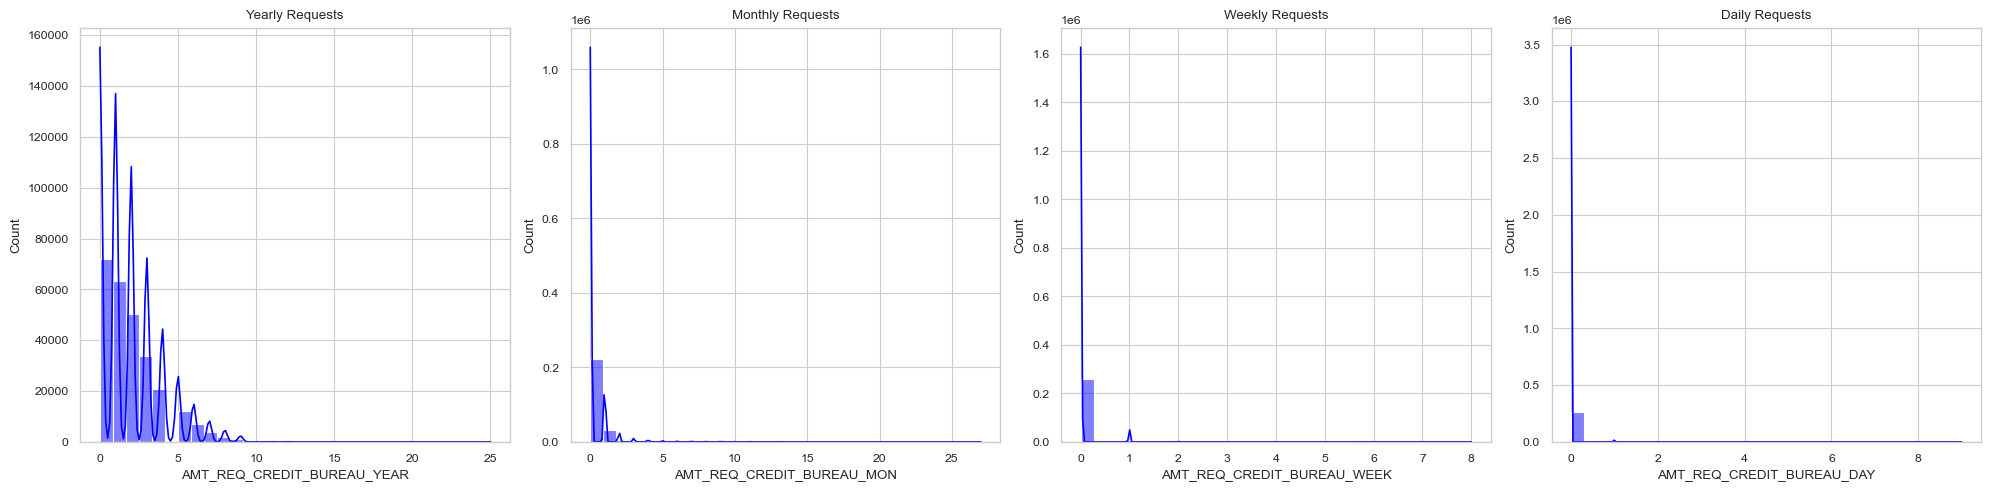

In [45]:
# Distribusi fitur numerik dengan missing values dalam satu baris
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # 1 baris, 4 kolom
sns.set_context('paper', font_scale=1)

# Membuat plot untuk setiap fitur
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0], kde=True, bins=30, color='blue')
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[1], kde=True, bins=30, color='blue')
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[2], kde=True, bins=30, color='blue')
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[3], kde=True, bins=30, color='blue')

# Menambahkan judul untuk setiap plot
ax[0].set_title('Yearly Requests')
ax[1].set_title('Monthly Requests')
ax[2].set_title('Weekly Requests')
ax[3].set_title('Daily Requests')

# Menampilkan plot
plt.tight_layout()
plt.show()


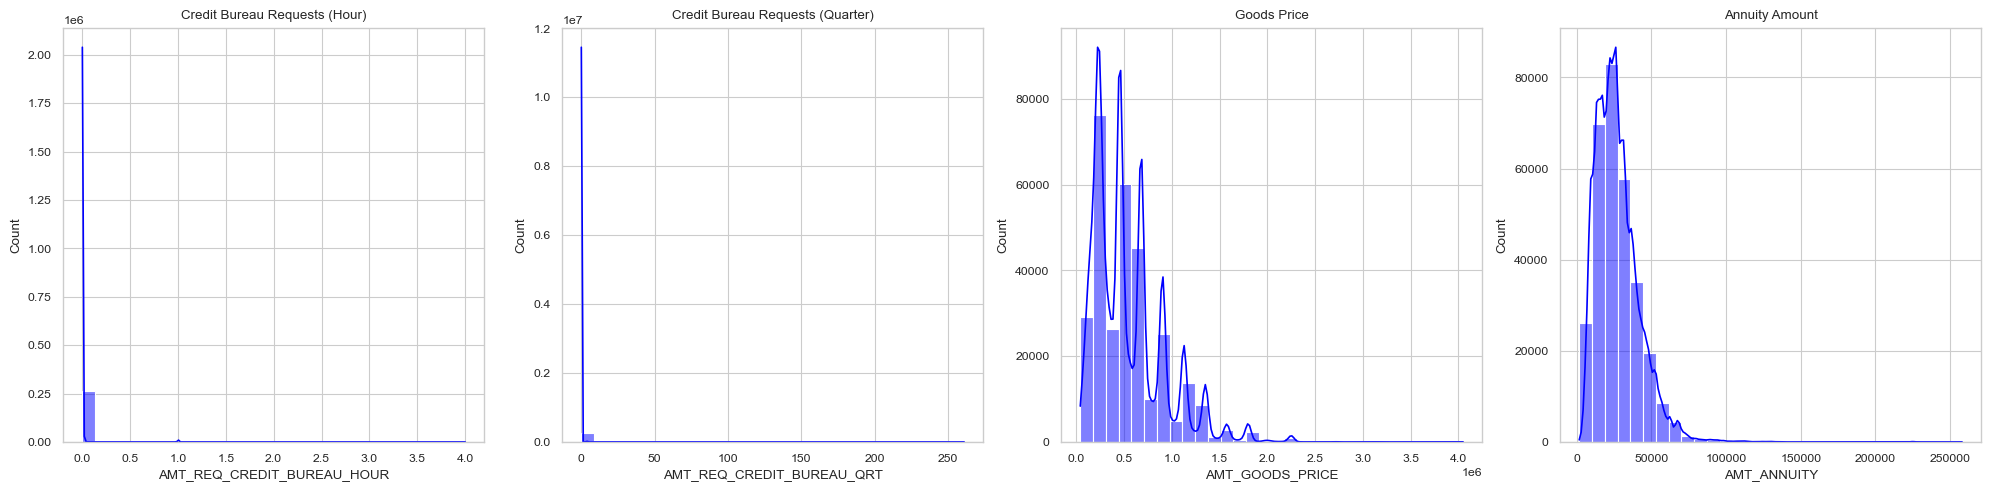

In [46]:
# Distribusi fitur numerik dengan missing values dalam satu baris
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # 1 baris, 4 kolom
sns.set_context('paper', font_scale=1)

# Membuat plot untuk setiap fitur
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0], kde=True, bins=30, color='blue')
sns.histplot(df['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[1], kde=True, bins=30, color='blue')
sns.histplot(df['AMT_GOODS_PRICE'], ax=ax[2], kde=True, bins=30, color='blue')
sns.histplot(df['AMT_ANNUITY'], ax=ax[3], kde=True, bins=30, color='blue')

# Menambahkan judul untuk setiap plot
ax[0].set_title('Credit Bureau Requests (Hour)')
ax[1].set_title('Credit Bureau Requests (Quarter)')
ax[2].set_title('Goods Price')
ax[3].set_title('Annuity Amount')

# Menampilkan plot
plt.tight_layout()
plt.show()


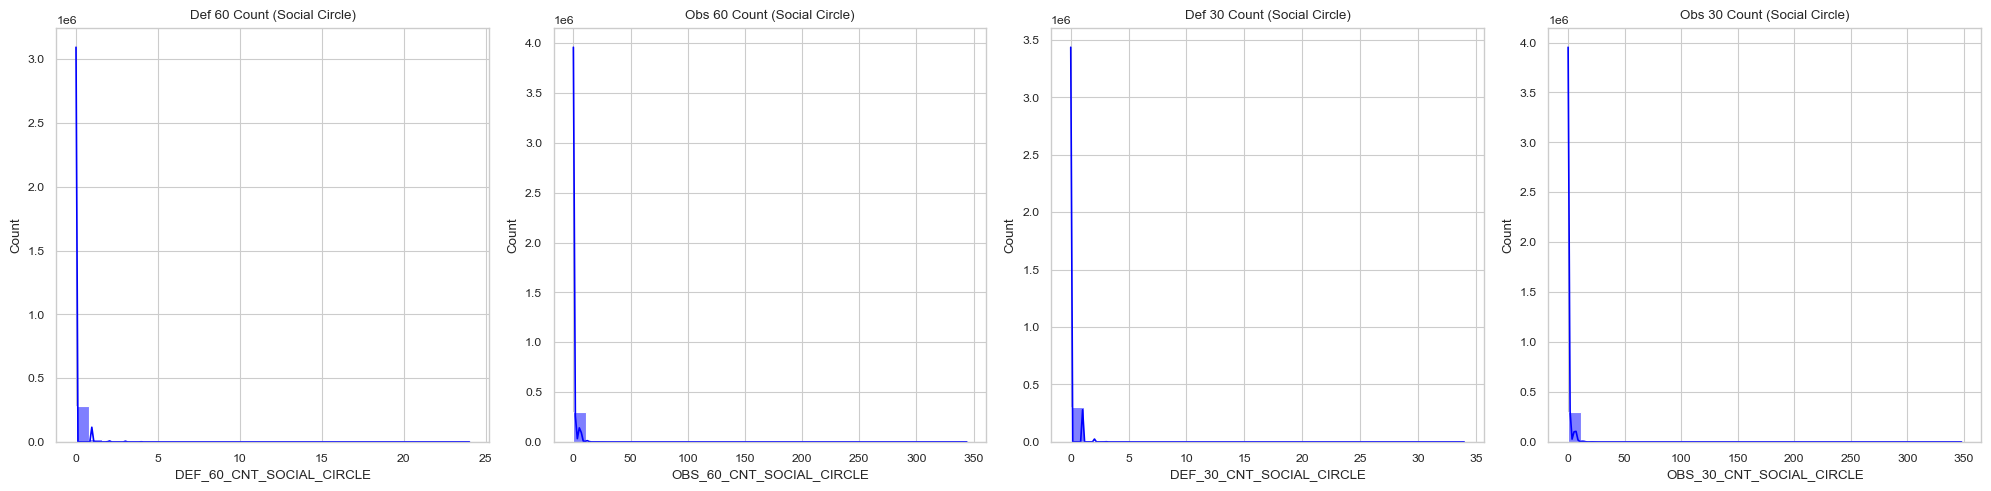

In [47]:
# Distribusi fitur numerik dengan missing values dalam satu baris
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # 1 baris, 4 kolom
sns.set_context('paper', font_scale=1)

# Membuat plot untuk setiap fitur
sns.histplot(df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0], kde=True, bins=30, color='blue')
sns.histplot(df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[1], kde=True, bins=30, color='blue')
sns.histplot(df['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[2], kde=True, bins=30, color='blue')
sns.histplot(df['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[3], kde=True, bins=30, color='blue')

# Menambahkan judul untuk setiap plot
ax[0].set_title('Def 60 Count (Social Circle)')
ax[1].set_title('Obs 60 Count (Social Circle)')
ax[2].set_title('Def 30 Count (Social Circle)')
ax[3].set_title('Obs 30 Count (Social Circle)')

# Menampilkan plot
plt.tight_layout()
plt.show()


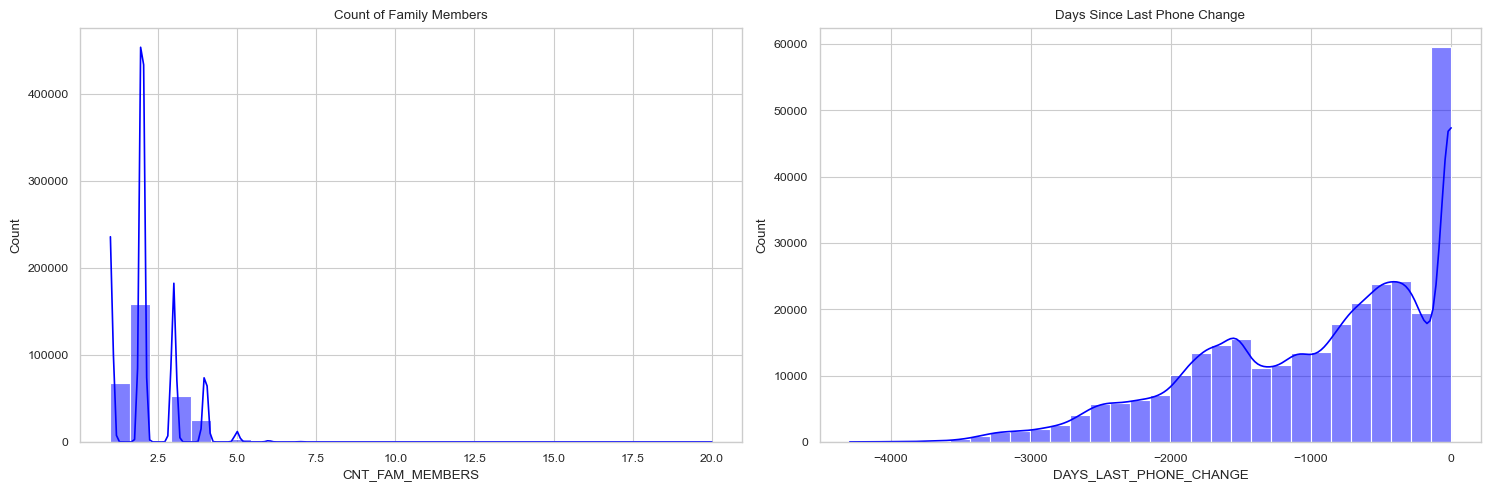

In [48]:
# Distribusi fitur numerik dengan missing values dalam satu baris
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # 1 baris, 2 kolom
sns.set_context('paper', font_scale=1)

# Membuat plot untuk setiap fitur
sns.histplot(df['CNT_FAM_MEMBERS'], ax=ax[0], kde=True, bins=30, color='blue')
sns.histplot(df['DAYS_LAST_PHONE_CHANGE'], ax=ax[1], kde=True, bins=30, color='blue')

# Menambahkan judul untuk setiap plot
ax[0].set_title('Count of Family Members')
ax[1].set_title('Days Since Last Phone Change')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [49]:
# input missing values with median because the data is skewed for numerical features
# input missing values with mode for categorical features

category = df.select_dtypes(include=['object']).columns.tolist()
integer = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
  if df[column].isnull().any():
    if(column in category):
      df[column]=df[column].fillna(df[column].mode()[0])
    else:
      df[column]=df[column].fillna(df[column].median())
     

In [50]:
# After input
print('Missing values status:\n', df.isnull().values.any())
print('The number of missing values for each columns (after imputation):\n')
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status:
 False
The number of missing values for each columns (after imputation):



index                         Total Null Values  Percentage
0                    SK_ID_CURR  0                  0.0       
1                    DAYS_BIRTH  0                  0.0       
2    REGION_POPULATION_RELATIVE  0                  0.0       
3                        TARGET  0                  0.0       
4            NAME_CONTRACT_TYPE  0                  0.0       
5                   CODE_GENDER  0                  0.0       
6                  FLAG_OWN_CAR  0                  0.0       
7               FLAG_OWN_REALTY  0                  0.0       
8                  CNT_CHILDREN  0                  0.0       
9              AMT_INCOME_TOTAL  0                  0.0       
10                   AMT_CREDIT  0                  0.0       
11                  AMT_ANNUITY  0                  0.0       
12              AMT_GOODS_PRICE  0                  0.0       
13              NAME_TYPE_SUITE  0                  0.0       
14             NAME_INCOME_TYPE  0                  0.0       
15          NAME_EDUCATION_TYPE  0                  0.0       
16           NAME_FAMILY_STATUS  0                  0.0       
17   AMT_REQ_CREDIT_BUREAU_YEAR  0                  0.0       
18            DAYS_REGISTRATION  0                  0.0       
19              FLAG_DOCUMENT_7  0                  0.0       
20   REG_REGION_NOT_WORK_REGION  0                  0.0       
21                DAYS_EMPLOYED  0                  0.0       
22              DAYS_ID_PUBLISH  0                  0.0       
23                   FLAG_MOBIL  0                  0.0       
24               FLAG_EMP_PHONE  0                  0.0       
25              FLAG_WORK_PHONE  0                  0.0       
26             FLAG_CONT_MOBILE  0                  0.0       
27                   FLAG_PHONE  0                  0.0       
28                   FLAG_EMAIL  0                  0.0       
29              OCCUPATION_TYPE  0                  0.0       
30              CNT_FAM_MEMBERS  0                  0.0       
31         REGION_RATING_CLIENT  0                  0.0       
32  REGION_RATING_CLIENT_W_CITY  0                  0.0       
33   WEEKDAY_APPR_PROCESS_START  0                  0.0       
34      HOUR_APPR_PROCESS_START  0                  0.0       
35   REG_REGION_NOT_LIVE_REGION  0                  0.0       
36            NAME_HOUSING_TYPE  0                  0.0       
37  LIVE_REGION_NOT_WORK_REGION  0                  0.0       
38       REG_CITY_NOT_LIVE_CITY  0                  0.0       
39       REG_CITY_NOT_WORK_CITY  0                  0.0       
40              FLAG_DOCUMENT_9  0                  0.0       
41     DEF_60_CNT_SOCIAL_CIRCLE  0                  0.0       
42            ORGANIZATION_TYPE  0                  0.0       
43                 EXT_SOURCE_2  0                  0.0       
44                 EXT_SOURCE_3  0                  0.0       
45     OBS_30_CNT_SOCIAL_CIRCLE  0                  0.0       
46     DEF_30_CNT_SOCIAL_CIRCLE  0                  0.0       
47     OBS_60_CNT_SOCIAL_CIRCLE  0                  0.0       
48       DAYS_LAST_PHONE_CHANGE  0                  0.0       
49              FLAG_DOCUMENT_8  0                  0.0       
50              FLAG_DOCUMENT_2  0                  0.0       
51              FLAG_DOCUMENT_3  0                  0.0       
52              FLAG_DOCUMENT_4  0                  0.0       
53              FLAG_DOCUMENT_5  0                  0.0       
54              FLAG_DOCUMENT_6  0                  0.0       
55             FLAG_DOCUMENT_10  0                  0.0       
56             FLAG_DOCUMENT_11  0                  0.0       
57    AMT_REQ_CREDIT_BUREAU_QRT  0                  0.0       
58             FLAG_DOCUMENT_17  0                  0.0       
59      LIVE_CITY_NOT_WORK_CITY  0                  0.0       
60             FLAG_DOCUMENT_12  0                  0.0       
61             FLAG_DOCUMENT_13  0                  0.0       
62             FLAG_DOCUMENT_14  0

#### 3. Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Kolom untuk Label Encoding
label_encode_cols = ["TARGET", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                     "ORGANIZATION_TYPE", "NAME_CONTRACT_TYPE", "NAME_TYPE_SUITE", "WEEKDAY_APPR_PROCESS_START",
                    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", 
                    "OCCUPATION_TYPE" ]

# Kolom untuk Get Dummies
#get_dummies_cols = ["]

# Konversi umur dari 'DAYS_BIRTH' dalam hitungan tahun
df['AgeBin'] = pd.cut(df['DAYS_BIRTH'] / -365, bins=[0, 20, 30, 40, 50, 60, 70], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])

# Label Encoding
encoder = LabelEncoder()
for col in label_encode_cols:
    df[col] = encoder.fit_transform(df[col])

# Get Dummies
#df = pd.get_dummies(df, columns=get_dummies_cols)

# Mengubah kolom bertipe boolean menjadi integer (0/1)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)



In [52]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0  100002      1       0                   1            0              
1  100003      0       0                   0            0              
2  100004      0       1                   1            1              
3  100006      0       0                   0            0              
4  100007      0       0                   1            0              

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  1                0             202500.0           406597.5   24700.5       
1  0                0             270000.0          1293502.5   35698.5       
2  1                0              67500.0           135000.0    6750.0       
3  1                0             135000.0           312682.5   29686.5       
4  1                0             121500.0           513000.0   21865.5       

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0   351000.0        6                7                 4                     
1  1129500.0        1                4                 1                     
2   135000.0        6                7                 4                     
3   297000.0        6                7                 4                     
4   513000.0        6                7                 4                     

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  3                   1                  0.018801                     
1  1                   1                  0.003541                     
2  3                   1                  0.010032                     
3  0                   1                  0.008019                     
4  3                   1                  0.028663                     

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0  -9461       -637          -3648.0            -2120             1            
1 -16765      -1188          -1186.0             -291             1            
2 -19046       -225          -4260.0            -2531             1            
3 -19005      -3039          -9833.0            -2437             1            
4 -19932      -3038          -4311.0            -3458             1            

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0  1               0                1                 1           0            
1  1               0                1                 1           0            
2  1               1                1                 1           0            
3  1               0                1                 0           0            
4  1               0                1                 0           0            

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0  8                1.0              2                      
1  3                2.0              1                      
2  8                1.0              2                      
3  8                2.0              2                      
4  3                1.0              2                      

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0  2                            6                            
1  1                            1                            
2  2                            1                            
3  2                            6                            
4  2                            4                            

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0  10                       0                            
1  11                       0                            
2   9                       0                            
3  17                       0                            
4  11                       0                            

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0  0                           0                             
1  0              

In [53]:
# Daftar kolom yang ingin diubah
columns_to_fix = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH", "DAYS_REGISTRATION", "DAYS_LAST_PHONE_CHANGE"]

# Mengubah nilai menjadi positif (nilai absolut)
df[columns_to_fix] = df[columns_to_fix].abs()

df = df.drop('AgeBin', axis=1)

# Memeriksa hasil
print(df[columns_to_fix].head())


   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_REGISTRATION  \
0   9461        637           2120             3648.0              
1  16765       1188            291             1186.0              
2  19046        225           2531             4260.0              
3  19005       3039           2437             9833.0              
4  19932       3038           3458             4311.0              

   DAYS_LAST_PHONE_CHANGE  
0  1134.0                  
1   828.0                  
2   815.0                  
3   617.0                  
4  1106.0                  


In [54]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0  100002      1       0                   1            0              
1  100003      0       0                   0            0              
2  100004      0       1                   1            1              
3  100006      0       0                   0            0              
4  100007      0       0                   1            0              

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  1                0             202500.0           406597.5   24700.5       
1  0                0             270000.0          1293502.5   35698.5       
2  1                0              67500.0           135000.0    6750.0       
3  1                0             135000.0           312682.5   29686.5       
4  1                0             121500.0           513000.0   21865.5       

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0   351000.0        6                7                 4                     
1  1129500.0        1                4                 1                     
2   135000.0        6                7                 4                     
3   297000.0        6                7                 4                     
4   513000.0        6                7                 4                     

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  3                   1                  0.018801                     
1  1                   1                  0.003541                     
2  3                   1                  0.010032                     
3  0                   1                  0.008019                     
4  3                   1                  0.028663                     

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0   9461        637           3648.0             2120             1            
1  16765       1188           1186.0              291             1            
2  19046        225           4260.0             2531             1            
3  19005       3039           9833.0             2437             1            
4  19932       3038           4311.0             3458             1            

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0  1               0                1                 1           0            
1  1               0                1                 1           0            
2  1               1                1                 1           0            
3  1               0                1                 0           0            
4  1               0                1                 0           0            

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0  8                1.0              2                      
1  3                2.0              1                      
2  8                1.0              2                      
3  8                2.0              2                      
4  3                1.0              2                      

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0  2                            6                            
1  1                            1                            
2  2                            1                            
3  2                            6                            
4  2                            4                            

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0  10                       0                            
1  11                       0                            
2   9                       0                            
3  17                       0                            
4  11                       0                            

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0  0                           0                             
1  0              

#### 4. Feature Selection

In [55]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Pisahkan fitur (x) dan target (y)
x = df.drop(['TARGET'], axis=1)
y = df['TARGET']

# Menggunakan SelectKBest dengan chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x, y)

# Menampilkan skor fitur
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']

# Menampilkan semua hasil feature selection dengan indeks penuh dalam urutan ascending
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
print('The features that correlate well with target feature:\n')
print(featureScores.sort_values(by=['Score'], ascending=False))


The features that correlate well with target feature:

   Features                      Score       
17                DAYS_EMPLOYED  1.954124e+08
9               AMT_GOODS_PRICE  1.223080e+08
7                    AMT_CREDIT  7.669987e+07
16                   DAYS_BIRTH  2.235391e+06
6              AMT_INCOME_TOTAL  1.624102e+06
18            DAYS_REGISTRATION  1.348566e+06
45       DAYS_LAST_PHONE_CHANGE  6.656876e+05
19              DAYS_ID_PUBLISH  6.195946e+05
8                   AMT_ANNUITY  3.913092e+05
0                    SK_ID_CURR  5.192425e+04
38            ORGANIZATION_TYPE  4.138607e+03
11             NAME_INCOME_TYPE  9.349036e+02
36       REG_CITY_NOT_WORK_CITY  6.153774e+02
2                   CODE_GENDER  6.056293e+02
39                 EXT_SOURCE_2  5.594802e+02
35       REG_CITY_NOT_LIVE_CITY  5.587089e+02
12          NAME_EDUCATION_TYPE  4.867541e+02
42     DEF_30_CNT_SOCIAL_CIRCLE  4.491174e+02
40                 EXT_SOURCE_3  4.424617e+02
44     DEF_60_CNT_SOCIAL_

#### 5. Handling Class Imbalance Data

In [56]:
df_new = df.copy()

In [57]:
df_new['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [59]:
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['TARGET']]]
y = df_new['TARGET'].values
print(X.shape)

(307511, 72)


In [60]:
X_under, y_under = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X, y)

X_over, y_over = RandomOverSampler(sampling_strategy=0.5).fit_resample(X, y)

X_over_SMOTE, y_over_SMOTE = SMOTE(sampling_strategy=0.5).fit_resample(X, y)

In [61]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    282686
1     24825
Name: count, dtype: int64


UNDERSAMPLING
0    49650
1    24825
Name: count, dtype: int64


OVERSAMPLING
0    282686
1    141343
Name: count, dtype: int64


SMOTE
0    282686
1    141343
Name: count, dtype: int64


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Assign features dan target variable
X = df_new[['DAYS_EMPLOYED','AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY','CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY',
'NAME_EDUCATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE',
'NAME_HOUSING_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON']]
y = df_new['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
TARGET
0    226148
1    113074
Name: count, dtype: int64


In [63]:
# Scaling data with robust scaler
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data testing (gunakan transform saja, bukan fit_transform)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Scale X for cross evaluation
X_scaled = scaler.fit_transform(X)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_predict, RepeatedStratifiedKFold,  GridSearchCV

def eval_classification(model):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, zero_division=0))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

 # Menampilkan nilai ROC-AUC
    print("roc_auc (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (Tran Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
# Cross-validation dengan skor ROC-AUC
    cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
    score = cross_validate(model, X_scaled, y, cv=cv, scoring='roc_auc', return_train_score=True)
    print('ROC_AUC (crossval train): %.3f' % score['train_score'].mean())
    print('ROC_AUC (crossval test): %.3f' % score['test_score'].mean())

# Fungsi untuk Grid Search dengan Pipeline
def grid_pipe(pipedict, hyperdict, scoring='roc_auc', display=True):
    fitted_models = {}
    fit_time = []
    for name, pipeline in pipedict.items():
        # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score=True, error_score='raise')

  # Fit menggunakan grid search
        start = time.time()
        model.fit(X_train_scaled, y_train_scaled)
        end = time.time()
        fit_time.append(round(end - start, 2))
        # Menyimpan model yang sudah fit
        fitted_models[name] = model
        if display:
            # Menampilkan hasil setelah model terlatih
            print(f'The {name} model has been fitted.')
            print('Total Fit Time: %.3fs' % (end - start))
            print('Best roc_auc: %.3f' % model.best_score_)
            print('Best params:\n', model.best_params_, '\n')

    # Fungsi untuk evaluasi confusion matrix
def confusion(model):
    # Prediksi model
    y_pred_proba = model.predict_proba(X_test)
    y_predict = model.predict(X_test)

    # Evaluasi performa model
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100))
    print('Precision (FP): %.2f%%' % (precision_score(y_test, y_predict, zero_division=0) * 100))
    print('Recall (FN): %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score (FP&FN): %.2f%%' % (f1_score(y_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y_test, y_pred_proba[:, 1]) * 100))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_predict)

    # Ekstrak nilai TP, FP, TN, FN dari confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Tampilkan nilai-nilai TP, FP, TN, FN
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

    # Visualisasi confusion matrix menggunakan heatmap
    plt.figure(figsize=(6, 4))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')  # Menggunakan cmap untuk memperindah
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

# Contoh penggunaan:
# eval_classification(model)
# grid_pipe(pipedict, hyperdict)
# confusion(model)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.73
Precision (Test Set): 0.19
Precision (Train Set): 0.64
Recall (Test Set): 0.33
Recall (Train Set): 0.43
F1-Score (Test Set): 0.25
F1-Score (Train Set): 0.52
roc_auc (Test Set): 0.68
roc_auc (Tran Set): 0.77
ROC_AUC (crossval train): 0.733
ROC_AUC (crossval test): 0.733
Accuracy: 72.57%
Precision (FP): 11.88%
Recall (FN): 37.36%
F1_Score (FP&FN): 18.02%
ROC_AUC: 56.52%
True Positives (TP): 1855
False Positives (FP): 13763
True Negatives (TN): 42775
False Negatives (FN): 3110


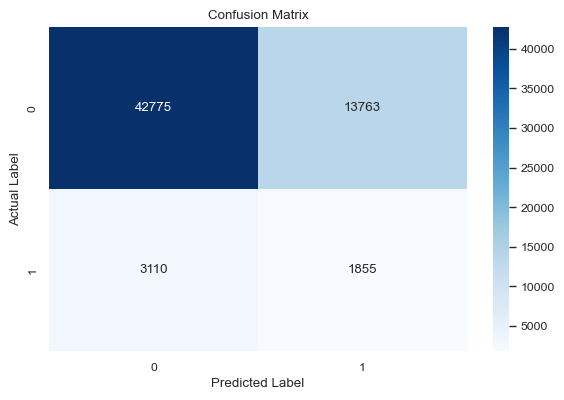

In [66]:
from sklearn.linear_model import LogisticRegression 

# Melatih model logistic regression
logreg1 = LogisticRegression(random_state=42)
logreg1.fit(X_train_scaled, y_train)

# Evaluasi model menggunakan fungsi eval_classification
eval_classification(logreg1)

# Confusion matrix menggunakan fungsi confusion
confusion(logreg1)

Accuracy (Test Set): 0.80
Accuracy (Train Set): 1.00
Precision (Test Set): 0.12
Precision (Train Set): 1.00
Recall (Test Set): 0.24
Recall (Train Set): 1.00
F1-Score (Test Set): 0.16
F1-Score (Train Set): 1.00
roc_auc (Test Set): 0.54
roc_auc (Tran Set): 1.00
ROC_AUC (crossval train): 1.000
ROC_AUC (crossval test): 0.538
Accuracy: 8.07%
Precision (FP): 8.07%
Recall (FN): 100.00%
F1_Score (FP&FN): 14.94%
ROC_AUC: 50.00%
True Positives (TP): 4965
False Positives (FP): 56537
True Negatives (TN): 1
False Negatives (FN): 0


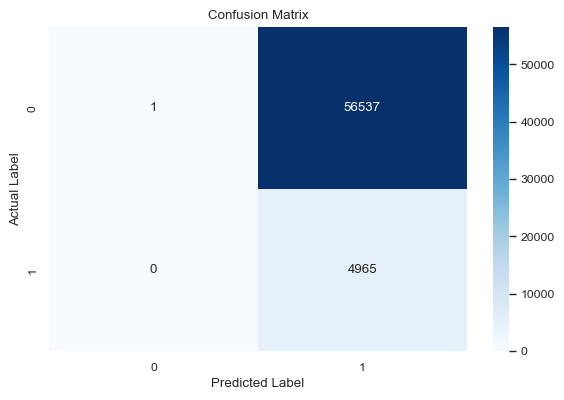

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(random_state = 42)
dt1.fit(X_train, y_train)

eval_classification(dt1)

# Confusion matrix

confusion(dt1)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.19
Precision (Train Set): 1.00
Recall (Test Set): 0.06
Recall (Train Set): 1.00
F1-Score (Test Set): 0.09
F1-Score (Train Set): 1.00
roc_auc (Test Set): 0.68
roc_auc (Tran Set): 1.00
ROC_AUC (crossval train): 1.000
ROC_AUC (crossval test): 0.713
Accuracy: 8.13%
Precision (FP): 8.07%
Recall (FN): 99.94%
F1_Score (FP&FN): 14.94%
ROC_AUC: 50.26%
True Positives (TP): 4962
False Positives (FP): 56501
True Negatives (TN): 37
False Negatives (FN): 3


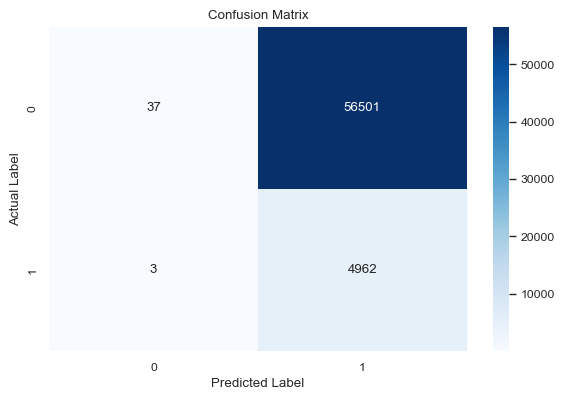

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)

eval_classification(rf1)

confusion(rf1)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.90
Precision (Test Set): 0.22
Precision (Train Set): 0.93
Recall (Test Set): 0.10
Recall (Train Set): 0.75
F1-Score (Test Set): 0.14
F1-Score (Train Set): 0.83
roc_auc (Test Set): 0.69
roc_auc (Tran Set): 0.94
ROC_AUC (crossval train): 0.838
ROC_AUC (crossval test): 0.738
Accuracy: 8.27%
Precision (FP): 8.07%
Recall (FN): 99.70%
F1_Score (FP&FN): 14.93%
ROC_AUC: 43.50%
True Positives (TP): 4950
False Positives (FP): 56402
True Negatives (TN): 136
False Negatives (FN): 15


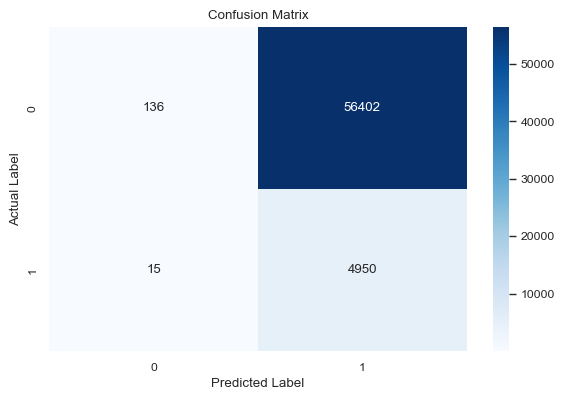

In [69]:
from xgboost import XGBClassifier

# Model XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Evaluasi
eval_classification(xgb)
confusion(xgb)

In [70]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Misalkan X_train dan y_train adalah data pelatihan Anda
# Contoh parameter grid untuk GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Anda dapat memilih untuk menggunakan GridSearchCV atau RandomizedSearchCV

# Coba dengan GridSearchCV, mengurangi penggunaan paralel (n_jobs=1)
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=1, verbose=1)

# Jika ingin mencoba RandomizedSearchCV, Anda bisa menggunakannya seperti ini:
# randomized_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(), param_distributions=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1, n_iter=10)

# Melakukan pelatihan pada data (gunakan subset data jika diperlukan)
# X_train_sub, y_train_sub = X_train[:int(0.2 * len(X_train))], y_train[:int(0.2 * len(y_train))]  # Contoh penggunaan subset 20% data

# Fit model dengan data pelatihan
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik dari GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

# Jika Anda menggunakan RandomizedSearchCV, hasilnya bisa diakses seperti ini:
# print(f"Best parameters: {randomized_search.best_params_}")
# print(f"Best ROC AUC score: {randomized_search.best_score_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best ROC AUC score: 0.9164413793594696


In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Model XGBoost dengan parameter terbaik
xgb_best = XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Melatih model
xgb_best.fit(X_train, y_train)

# Prediksi
y_pred_train = xgb_best.predict(X_train)
y_pred_test = xgb_best.predict(X_test)

# Evaluasi metrik untuk train dan test set
def eval_classification(model):
    # Akurasi
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    # Precision
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    # Recall
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    # F1-Score
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    # ROC AUC
    roc_auc_train = roc_auc_score(y_train, xgb_best.predict_proba(X_train)[:, 1])
    roc_auc_test = roc_auc_score(y_test, xgb_best.predict_proba(X_test)[:, 1])
    
    # Cross-validation ROC AUC
    crossval_train = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    crossval_test = cross_val_score(model, X_test, y_test, cv=5, scoring='roc_auc').mean()
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm.ravel()
    
    # Precision & Recall for FP & FN
    precision_fp = fp / (fp + tp) if (fp + tp) > 0 else 0
    recall_fn = fn / (fn + tn) if (fn + tn) > 0 else 0
    f1_fp_fn = 2 * (precision_fp * recall_fn) / (precision_fp + recall_fn) if (precision_fp + recall_fn) > 0 else 0
    
    # Output metrik dalam format yang diinginkan
    print(f"Accuracy (Test Set): {accuracy_test:.2f}")
    print(f"Accuracy (Train Set): {accuracy_train:.2f}")
    print(f"Precision (Test Set): {precision_test:.2f}")
    print(f"Precision (Train Set): {precision_train:.2f}")
    print(f"Recall (Test Set): {recall_test:.2f}")
    print(f"Recall (Train Set): {recall_train:.2f}")
    print(f"F1-Score (Test Set): {f1_test:.2f}")
    print(f"F1-Score (Train Set): {f1_train:.2f}")
    print(f"roc_auc (Test Set): {roc_auc_test:.2f}")
    print(f"roc_auc (Train Set): {roc_auc_train:.2f}")
    print(f"ROC_AUC (crossval train): {crossval_train:.3f}")
    print(f"ROC_AUC (crossval test): {crossval_test:.3f}")
    
    # Precision & Recall for False Positives and False Negatives
    print(f"Precision (FP): {precision_fp*100:.2f}%")
    print(f"Recall (FN): {recall_fn*100:.2f}%")
    print(f"F1_Score (FP&FN): {f1_fp_fn:.2f}")
    
    # ROC_AUC for FP & FN
    print(f"ROC_AUC: {roc_auc_test*100:.2f}%")
    
    # True Positives, False Positives, True Negatives, False Negatives
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")

# Evaluasi model
eval_classification(xgb_best)


Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.91
Precision (Test Set): 0.24
Precision (Train Set): 0.94
Recall (Test Set): 0.10
Recall (Train Set): 0.76
F1-Score (Test Set): 0.14
F1-Score (Train Set): 0.84
roc_auc (Test Set): 0.70
roc_auc (Train Set): 0.96
ROC_AUC (crossval train): 0.916
ROC_AUC (crossval test): 0.720
Precision (FP): 76.35%
Recall (FN): 7.53%
F1_Score (FP&FN): 0.14
ROC_AUC: 69.72%
True Positives (TP): 493
False Positives (FP): 1592
True Negatives (TN): 54946
False Negatives (FN): 4472


from sklearn.svm import SVC

# Model SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluasi
eval_classification(svm)
confusion(svm)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.91
Precision (Test Set): 0.24
Precision (Train Set): 0.94
Recall (Test Set): 0.10
Recall (Train Set): 0.76
F1-Score (Test Set): 0.14
F1-Score (Train Set): 0.84
roc_auc (Test Set): 0.70
roc_auc (Train Set): 0.96
ROC_AUC (crossval train): 0.640
ROC_AUC (crossval test): 0.612
Precision (FP): 76.35%
Recall (FN): 7.53%
F1_Score (FP&FN): 0.14
ROC_AUC: 69.72%
True Positives (TP): 493
False Positives (FP): 1592
True Negatives (TN): 54946
False Negatives (FN): 4472
Accuracy: 89.92%
Precision (FP): 7.32%
Recall (FN): 2.13%
F1_Score (FP&FN): 3.31%
ROC_AUC: 60.05%
True Positives (TP): 106
False Positives (FP): 1342
True Negatives (TN): 55196
False Negatives (FN): 4859


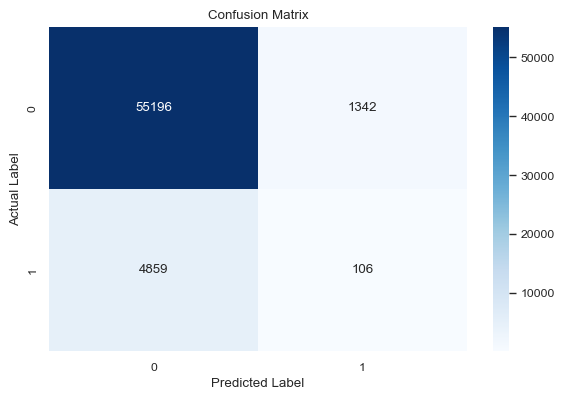

In [72]:
from sklearn.naive_bayes import GaussianNB

# Model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluasi
eval_classification(nb)
confusion(nb)


#### Compared model 

##### Uji XGB pada data test

Evaluation on Test Data:
Accuracy: 0.90
Precision: 0.22
Recall: 0.10
F1 Score: 0.14
ROC AUC: 0.69

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.97      0.95     56538
     Class 1       0.22      0.10      0.14      4965

    accuracy                           0.90     61503
   macro avg       0.57      0.54      0.54     61503
weighted avg       0.87      0.90      0.88     61503


Confusion Matrix:
[[54721  1817]
 [ 4456   509]]

True Negative (TN): 54721
False Positive (FP): 1817
False Negative (FN): 4456
True Positive (TP): 509


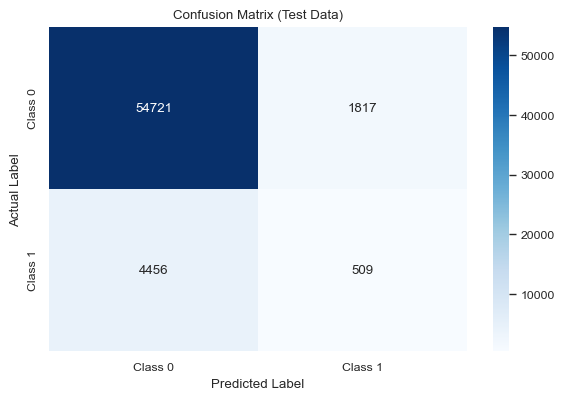

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Membuat dan melatih model XGBoost
xgb = XGBClassifier()  # Membuat objek XGBoost
xgb.fit(X_train_scaled, y_train)  # Melatih model dengan data latih

# Prediksi pada data uji
y_pred_test = xgb.predict(X_test_scaled)  # Prediksi label
y_pred_proba_test = xgb.predict_proba(X_test_scaled)[:, 1]  # Prediksi probabilitas kelas positif

# Evaluasi metrik
print("Evaluation on Test Data:")

# Metrik utama
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_test, zero_division=0):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_test):.2f}")

# Laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

# Ekstraksi TN, FP, FN, TP dari Confusion Matrix
tn, fp, fn, tp = cm_test.ravel()
print(f"\nTrue Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Visualisasi Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()


#### ROC AUC curved

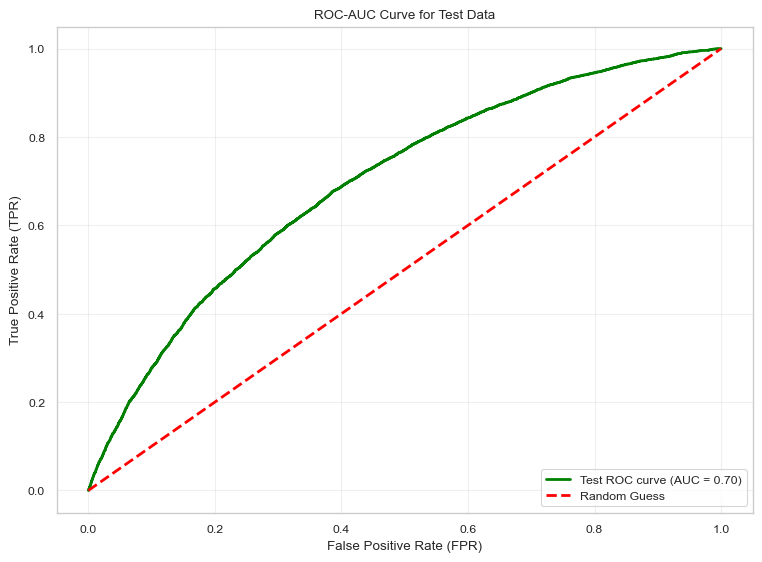

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Hitung probabilitas prediksi untuk data testing menggunakan model xgb_best
y_test_proba = xgb_best.predict_proba(X_test)[:, 1]

# Hitung ROC curve untuk data testing
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC-AUC curve untuk data test
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

# Tambahkan label dan judul
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve for Test Data')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [91]:
# Nilai ROC-AUC
roc_auc = 0.70

# Menghitung Gini Coefficient
gini = (2 * roc_auc) - 1

# Menampilkan hasil
print(f"ROC-AUC: {roc_auc}")
print(f"Gini Coefficient: {gini}")


ROC-AUC: 0.7
Gini Coefficient: 0.3999999999999999


Nilai Gini Coefficient = 0.38 menunjukkan model cukup baik tetapi masih ada ruang untuk perbaikan, terutama dalam menangani kelas minoritas dan meningkatkan kemampuan model dalam membedakan antara kelas.

#### Feature importants 

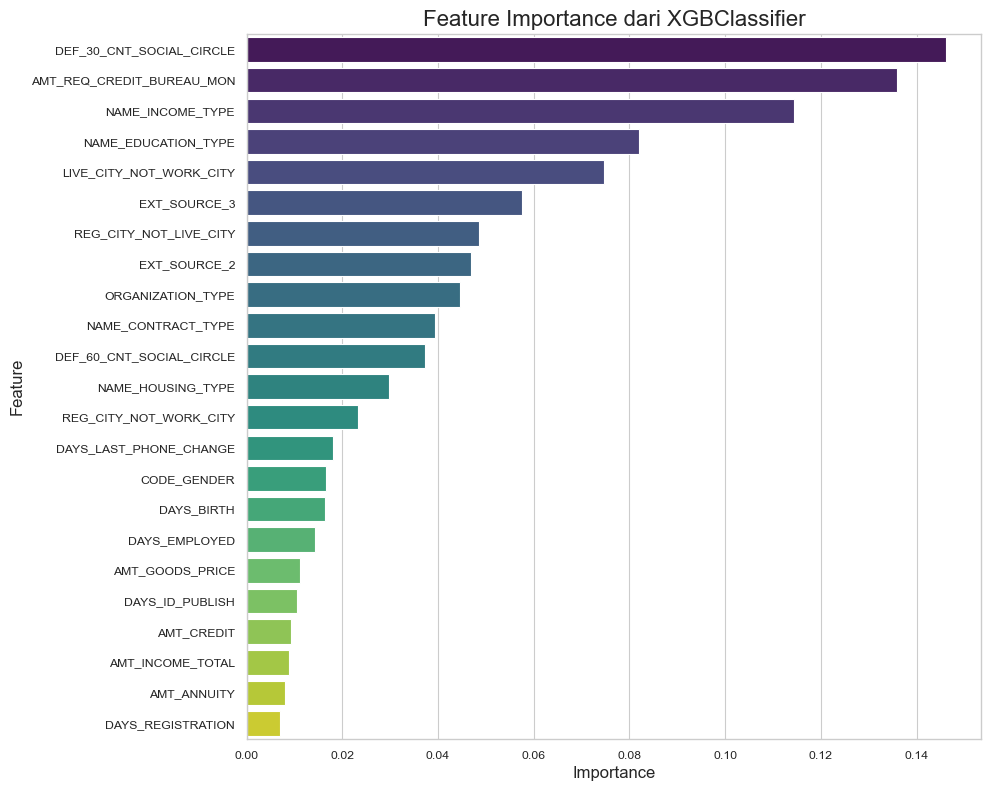

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Menggunakan parameter terbaik yang ditemukan pada GridSearchCV
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

# Membuat model XGBoost dengan parameter terbaik
xgb = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Melatih model XGBoost dengan data training
xgb.fit(X_train, y_train)

# Mendapatkan nilai feature importance dari model
feature_importance = xgb.feature_importances_

# Menggabungkan nama fitur dan importance dalam DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Mengurutkan berdasarkan nilai importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df, 
    palette='viridis'
)

# Tambahkan judul dan label
plt.title('Feature Importance dari XGBClassifier', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


DAYS_EMPLOYED
Deskripsi: Jumlah hari seseorang telah bekerja hingga saat ini.
Interpretasi: Nilai negatif menunjukkan berapa hari yang lalu pekerjaan dimulai. Nilai yang sangat tinggi (misalnya, 365243) biasanya digunakan untuk mengindikasikan bahwa seseorang belum pernah bekerja.
2. AMT_GOODS_PRICE
Deskripsi: Harga barang atau properti yang ingin dibeli menggunakan pinjaman.
Interpretasi: Digunakan untuk memahami jumlah pinjaman yang diminta dibandingkan dengan harga barang.
3. AMT_CREDIT
Deskripsi: Jumlah total pinjaman yang diberikan kepada peminjam.
Interpretasi: Ini adalah jumlah total kredit yang disetujui.
4. DAYS_BIRTH
Deskripsi: Jumlah hari sejak kelahiran hingga saat aplikasi.
Interpretasi: Nilai negatif menunjukkan usia peminjam (contoh: -12000 berarti usia sekitar 32 tahun).
5. AMT_INCOME_TOTAL
Deskripsi: Total pendapatan tahunan peminjam.
Interpretasi: Berguna untuk menghitung rasio pendapatan terhadap pinjaman.
6. DAYS_REGISTRATION
Deskripsi: Jumlah hari sejak peminjam mendaftarkan dokumen identitas mereka.
Interpretasi: Nilai negatif menunjukkan berapa lama dokumen tersebut sudah terdaftar.
7. DAYS_LAST_PHONE_CHANGE
Deskripsi: Jumlah hari sejak peminjam terakhir kali mengganti nomor telepon mereka.
Interpretasi: Bisa mencerminkan stabilitas atau perubahan dalam hidup peminjam.
8. DAYS_ID_PUBLISH
Deskripsi: Jumlah hari sejak peminjam terakhir kali mengganti ID mereka.
Interpretasi: Nilai ini menunjukkan stabilitas dokumen identitas.
9. AMT_ANNUITY
Deskripsi: Jumlah pembayaran tahunan yang harus dilakukan peminjam untuk melunasi pinjaman.
Interpretasi: Menunjukkan kemampuan peminjam untuk membayar pinjaman secara cicilan.
10. ORGANIZATION_TYPE
Deskripsi: Jenis organisasi atau perusahaan tempat peminjam bekerja.
Interpretasi: Kategori ini dapat menunjukkan stabilitas pekerjaan peminjam.
11. NAME_INCOME_TYPE
Deskripsi: Jenis sumber pendapatan peminjam (misalnya, Working, Pensioner, Commercial Associate).
Interpretasi: Menggambarkan stabilitas dan jenis pendapatan peminjam.
12. REG_CITY_NOT_WORK_CITY
Deskripsi: Indikator apakah kota tempat tinggal berbeda dengan kota tempat bekerja.
Interpretasi: Nilai 1 berarti berbeda, 0 berarti sama. Bisa mencerminkan tingkat mobilitas peminjam.
13. CODE_GENDER
Deskripsi: Jenis kelamin peminjam.
Interpretasi: M untuk laki-laki, F untuk perempuan.
14. EXT_SOURCE_2
Deskripsi: Nilai eksternal yang digunakan sebagai skor risiko (fitur yang sudah tersedia).
Interpretasi: Nilai lebih tinggi biasanya menunjukkan risiko yang lebih rendah.
15. REG_CITY_NOT_LIVE_CITY
Deskripsi: Indikator apakah kota tempat tinggal saat ini berbeda dengan kota yang terdaftar secara resmi.
Interpretasi: Nilai 1 berarti berbeda, 0 berarti sama. Bisa mencerminkan stabilitas tempat tinggal.
16. NAME_EDUCATION_TYPE
Deskripsi: Tingkat pendidikan peminjam (misalnya, Secondary, Higher Education, Incomplete Higher).
Interpretasi: Mengindikasikan tingkat pendidikan yang bisa memengaruhi potensi penghasilan.
17. DEF_30_CNT_SOCIAL_CIRCLE
Deskripsi: Jumlah kerabat dalam lingkaran sosial peminjam yang gagal membayar pinjaman dalam 30 hari.
Interpretasi: Semakin tinggi angka ini, semakin besar risiko gagal bayar.
18. EXT_SOURCE_3
Deskripsi: Nilai eksternal lain yang digunakan sebagai skor risiko (fitur yang sudah tersedia).
Interpretasi: Nilai lebih tinggi biasanya menunjukkan risiko yang lebih rendah.
19. DEF_60_CNT_SOCIAL_CIRCLE
Deskripsi: Jumlah kerabat dalam lingkaran sosial peminjam yang gagal membayar pinjaman dalam 60 hari.
Interpretasi: Semakin tinggi angka ini, semakin besar risiko gagal bayar.
20. LIVE_CITY_NOT_WORK_CITY
Deskripsi: Indikator apakah kota tempat tinggal sama dengan kota tempat bekerja.
Interpretasi: Nilai 1 berarti berbeda, 0 berarti sama.
21. NAME_CONTRACT_TYPE
Deskripsi: Jenis kontrak kredit yang diminta oleh peminjam (Cash loans atau Revolving loans).
Interpretasi: Menunjukkan jenis pinjaman (contoh: tunai atau kredit berulang).
22. NAME_HOUSING_TYPE
Deskripsi: Jenis tempat tinggal peminjam (misalnya, Rented apartment, House, With parents).
Interpretasi: Mencerminkan stabilitas tempat tinggal peminjam.
23. AMT_REQ_CREDIT_BUREAU_MON
Deskripsi: Jumlah permintaan informasi kredit dalam sebulan terakhir.
Interpretasi: Semakin banyak permintaan, semakin besar kemungkinan seseorang mencari banyak kredit (mungkin risiko lebih tinggi).


# Prediction (application_test)

# Load Data

In [ ]:
# data application (train)
df_test = pd.read_csv("application_test.csv")
print('This dataset has %d rows and %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 48744 rows and 121 columns.



SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  100001      Cash loans         F           N            Y                
1  100005      Cash loans         M           N            Y                
2  100013      Cash loans         M           Y            Y                
3  100028      Cash loans         F           N            Y                
4  100038      Cash loans         M           Y            N                

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0  0             135000.0           568800.0   20560.5       450000.0         
1  0              99000.0           222768.0   17370.0       180000.0         
2  0             202500.0           663264.0   69777.0       630000.0         
3  2             315000.0          1575000.0   49018.5      1575000.0         
4  1             180000.0           625500.0   32067.0       625500.0         

  NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE             \
0  Unaccompanied   Working                       Higher education   
1  Unaccompanied   Working          Secondary / secondary special   
2            NaN   Working                       Higher education   
3  Unaccompanied   Working          Secondary / secondary special   
4  Unaccompanied   Working          Secondary / secondary special   

  NAME_FAMILY_STATUS NAME_HOUSING_TYPE   REGION_POPULATION_RELATIVE  \
0  Married            House / apartment  0.018850                     
1  Married            House / apartment  0.035792                     
2  Married            House / apartment  0.019101                     
3  Married            House / apartment  0.026392                     
4  Married            House / apartment  0.010032                     

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0 -19241      -2329          -5170.0             -812              NaN          
1 -18064      -4469          -9118.0            -1623              NaN          
2 -20038      -4458          -2175.0            -3503              5.0          
3 -13976      -1866          -2000.0            -4208              NaN          
4 -13040      -2191          -4000.0            -4262             16.0          

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0  1           1               0                1                 0            
1  1           1               0                1                 0            
2  1           1               0                1                 0            
3  1           1               0                1                 1            
4  1           1               1                1                 0            

   FLAG_EMAIL OCCUPATION_TYPE      CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0  1                          NaN  2.0              2                      
1  0           Low-skill Laborers  2.0              2                      
2  0                      Drivers  2.0              2                      
3  0                  Sales staff  4.0              2                      
4  0                          NaN  3.0              2                      

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0  2                              TUESDAY                   
1  2                               FRIDAY                   
2  2                               MONDAY                   
3  2                            WEDNESDAY                   
4  2                               FRIDAY                   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0  18                       0                            
1   9                       0                            
2  14                       0                            
3  11                       0                            
4   5                       0                            

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0  0                

Dataset tidak memiliki Target

In [ ]:
list_item = []
for col in df_test.columns:
    list_item.append([col, df_test[col].dtype, df_test[col].isna().sum(), 
                      round(100 * df_test[col].isna().sum() / len(df_test), 2), 
                      df_test[col].nunique(), df_test[col].unique()[:5]])

desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))

# Mengatur opsi tampilan Pandas
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)  # Menyesuaikan lebar tampilan
pd.set_option('display.colheader_justify', 'left')  # Justifikasi header kolom

desc_df


feature                        data_type   null_values   null_percentage  \
0                      SK_ID_CURR    int64        0          0.00              
1              NAME_CONTRACT_TYPE   object        0          0.00              
2                     CODE_GENDER   object        0          0.00              
3                    FLAG_OWN_CAR   object        0          0.00              
4                 FLAG_OWN_REALTY   object        0          0.00              
5                    CNT_CHILDREN    int64        0          0.00              
6                AMT_INCOME_TOTAL  float64        0          0.00              
7                      AMT_CREDIT  float64        0          0.00              
8                     AMT_ANNUITY  float64       24          0.05              
9                 AMT_GOODS_PRICE  float64        0          0.00              
10                NAME_TYPE_SUITE   object      911          1.87              
11               NAME_INCOME_TYPE   object        0          0.00              
12            NAME_EDUCATION_TYPE   object        0          0.00              
13             NAME_FAMILY_STATUS   object        0          0.00              
14              NAME_HOUSING_TYPE   object        0          0.00              
15     REGION_POPULATION_RELATIVE  float64        0          0.00              
16                     DAYS_BIRTH    int64        0          0.00              
17                  DAYS_EMPLOYED    int64        0          0.00              
18              DAYS_REGISTRATION  float64        0          0.00              
19                DAYS_ID_PUBLISH    int64        0          0.00              
20                    OWN_CAR_AGE  float64    32312         66.29              
21                     FLAG_MOBIL    int64        0          0.00              
22                 FLAG_EMP_PHONE    int64        0          0.00              
23                FLAG_WORK_PHONE    int64        0          0.00              
24               FLAG_CONT_MOBILE    int64        0          0.00              
25                     FLAG_PHONE    int64        0          0.00              
26                     FLAG_EMAIL    int64        0          0.00              
27                OCCUPATION_TYPE   object    15605         32.01              
28                CNT_FAM_MEMBERS  float64        0          0.00              
29           REGION_RATING_CLIENT    int64        0          0.00              
30    REGION_RATING_CLIENT_W_CITY    int64        0          0.00              
31     WEEKDAY_APPR_PROCESS_START   object        0          0.00              
32        HOUR_APPR_PROCESS_START    int64        0          0.00              
33     REG_REGION_NOT_LIVE_REGION    int64        0          0.00              
34     REG_REGION_NOT_WORK_REGION    int64        0          0.00              
35    LIVE_REGION_NOT_WORK_REGION    int64        0          0.00              
36         REG_CITY_NOT_LIVE_CITY    int64        0          0.00              
37         REG_CITY_NOT_WORK_CITY    int64        0          0.00              
38        LIVE_CITY_NOT_WORK_CITY    int64        0          0.00              
39              ORGANIZATION_TYPE   object        0          0.00              
40                   EXT_SOURCE_1  float64    20532         42.12              
41                   EXT_SOURCE_2  float64        8          0.02              
42                   EXT_SOURCE_3  float64     8668         17.78              
43                 APARTMENTS_AVG  float64    23887         49.01              
44               BASEMENTAREA_AVG  float64    27641         56.71              
45    YEARS_BEGINEXPLUATATION_AVG  float64    22856         46.89              
46                YEARS_BUILD_AVG  float64    31818         65.28              
47                 COMMONAREA_AVG  float64    33495         68.72              
48                  ELEVATORS_AVG  float64    25189         51.68              
49  

# Preprocessing Data

#### 1. Duplicate data

In [ ]:
df_test.duplicated().sum()

0

#### 2. Handling Missing Value

In [ ]:
# check for empty elements
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index                          Total Null Values  Percentage
0                  COMMONAREA_AVG  33495              68.716150 
1                 COMMONAREA_MODE  33495              68.716150 
2                 COMMONAREA_MEDI  33495              68.716150 
3         NONLIVINGAPARTMENTS_AVG  33347              68.412523 
4        NONLIVINGAPARTMENTS_MODE  33347              68.412523 
5        NONLIVINGAPARTMENTS_MEDI  33347              68.412523 
6              FONDKAPREMONT_MODE  32797              67.284179 
7            LIVINGAPARTMENTS_AVG  32780              67.249302 
8           LIVINGAPARTMENTS_MODE  32780              67.249302 
9           LIVINGAPARTMENTS_MEDI  32780              67.249302 
10                 FLOORSMIN_MEDI  32466              66.605121 
11                  FLOORSMIN_AVG  32466              66.605121 
12                 FLOORSMIN_MODE  32466              66.605121 
13                    OWN_CAR_AGE  32312              66.289184 
14                YEARS_BUILD_AVG  31818              65.275726 
15               YEARS_BUILD_MEDI  31818              65.275726 
16               YEARS_BUILD_MODE  31818              65.275726 
17                  LANDAREA_MEDI  28254              57.964057 
18                   LANDAREA_AVG  28254              57.964057 
19                  LANDAREA_MODE  28254              57.964057 
20              BASEMENTAREA_MEDI  27641              56.706466 
21               BASEMENTAREA_AVG  27641              56.706466 
22              BASEMENTAREA_MODE  27641              56.706466 
23              NONLIVINGAREA_AVG  26084              53.512227 
24             NONLIVINGAREA_MODE  26084              53.512227 
25             NONLIVINGAREA_MEDI  26084              53.512227 
26                 ELEVATORS_MODE  25189              51.676104 
27                 ELEVATORS_MEDI  25189              51.676104 
28                  ELEVATORS_AVG  25189              51.676104 
29             WALLSMATERIAL_MODE  23893              49.017315 
30                APARTMENTS_MODE  23887              49.005006 
31                APARTMENTS_MEDI  23887              49.005006 
32                 APARTMENTS_AVG  23887              49.005006 
33                 HOUSETYPE_MODE  23619              48.455194 
34                 ENTRANCES_MODE  23579              48.373133 
35                  ENTRANCES_AVG  23579              48.373133 
36                 ENTRANCES_MEDI  23579              48.373133 
37                LIVINGAREA_MEDI  23552              48.317742 
38                LIVINGAREA_MODE  23552              48.317742 
39                 LIVINGAREA_AVG  23552              48.317742 
40                  FLOORSMAX_AVG  23321              47.843837 
41                 FLOORSMAX_MEDI  23321              47.843837 
42                 FLOORSMAX_MODE  23321              47.843837 
43    YEARS_BEGINEXPLUATATION_AVG  22856              46.889874 
44   YEARS_BEGINEXPLUATATION_MEDI  22856              46.889874 
45   YEARS_BEGINEXPLUATATION_MODE  22856              46.889874 
46                 TOTALAREA_MODE  22624              46.413918 
47            EMERGENCYSTATE_MODE  22209              45.562531 
48                   EXT_SOURCE_1  20532              42.122107 
49                OCCUPATION_TYPE  15605              32.014197 
50                   EXT_SOURCE_3   8668              17.782701 
51      AMT_REQ_CREDIT_BUREAU_DAY   6049              12.409732 
52     AMT_REQ_CREDIT_BUREAU_WEEK   6049              12.409732 
53     AMT_REQ_CREDIT_BUREAU_HOUR   6049              12.409732 
54      AMT_REQ_CREDIT_BUREAU_MON   6049              12.409732 
55      AMT_REQ_CREDIT_BUREAU_QRT   6049              12.409732 
56     AMT_REQ_CREDIT_BUREAU_YEAR   6049              12.409732 
57                NAME_TYPE_SUITE    911               1.868948 
58       DEF_30_CNT_SOCIAL_CIRCLE     29               0.059495 
59       OBS_30_CNT_SOCIAL_CIRCLE     29               0.059495 
60       OBS_60_CNT_SOCIAL_CIRCLE     2

In [98]:
# input missing values with mode for categorical features
# input missing values with median because the data is skewed for numerical features

category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
  if df_test[column].isnull().any():
    if(column in category_columns):
      df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
    else:
      df_test[column]=df_test[column].fillna(df_test[column].median())

In [ ]:
# After input
print('Missing values status:\n', df_test.isnull().values.any())
print('The number of missing values for each columns (after imputation):\n')
tvc = pd.DataFrame(df_test.isnull().sum().sort_values(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status:
 False
The number of missing values for each columns (after imputation):



index                          Total Null Values  Percentage
0                      SK_ID_CURR  0                  0.0       
1               BASEMENTAREA_MODE  0                  0.0       
2                 CNT_FAM_MEMBERS  0                  0.0       
3              NAME_FAMILY_STATUS  0                  0.0       
4              NAME_CONTRACT_TYPE  0                  0.0       
5                     CODE_GENDER  0                  0.0       
6                    FLAG_OWN_CAR  0                  0.0       
7                 FLAG_OWN_REALTY  0                  0.0       
8                    CNT_CHILDREN  0                  0.0       
9                AMT_INCOME_TOTAL  0                  0.0       
10                     AMT_CREDIT  0                  0.0       
11                    AMT_ANNUITY  0                  0.0       
12                AMT_GOODS_PRICE  0                  0.0       
13                NAME_TYPE_SUITE  0                  0.0       
14               NAME_INCOME_TYPE  0                  0.0       
15            NAME_EDUCATION_TYPE  0                  0.0       
16              NAME_HOUSING_TYPE  0                  0.0       
17                OCCUPATION_TYPE  0                  0.0       
18     REGION_POPULATION_RELATIVE  0                  0.0       
19                     DAYS_BIRTH  0                  0.0       
20                  DAYS_EMPLOYED  0                  0.0       
21              DAYS_REGISTRATION  0                  0.0       
22                DAYS_ID_PUBLISH  0                  0.0       
23                    OWN_CAR_AGE  0                  0.0       
24                     FLAG_MOBIL  0                  0.0       
25                 FLAG_EMP_PHONE  0                  0.0       
26                FLAG_WORK_PHONE  0                  0.0       
27               FLAG_CONT_MOBILE  0                  0.0       
28                     FLAG_PHONE  0                  0.0       
29           REGION_RATING_CLIENT  0                  0.0       
30    REGION_RATING_CLIENT_W_CITY  0                  0.0       
31                APARTMENTS_MODE  0                  0.0       
32                   EXT_SOURCE_3  0                  0.0       
33   YEARS_BEGINEXPLUATATION_MODE  0                  0.0       
34     WEEKDAY_APPR_PROCESS_START  0                  0.0       
35        HOUR_APPR_PROCESS_START  0                  0.0       
36     REG_REGION_NOT_LIVE_REGION  0                  0.0       
37     REG_REGION_NOT_WORK_REGION  0                  0.0       
38    LIVE_REGION_NOT_WORK_REGION  0                  0.0       
39         REG_CITY_NOT_LIVE_CITY  0                  0.0       
40         REG_CITY_NOT_WORK_CITY  0                  0.0       
41        LIVE_CITY_NOT_WORK_CITY  0                  0.0       
42              ORGANIZATION_TYPE  0                  0.0       
43                   EXT_SOURCE_1  0                  0.0       
44                   EXT_SOURCE_2  0                  0.0       
45                 APARTMENTS_AVG  0                  0.0       
46              NONLIVINGAREA_AVG  0                  0.0       
47               BASEMENTAREA_AVG  0                  0.0       
48    YEARS_BEGINEXPLUATATION_AVG  0                  0.0       
49                YEARS_BUILD_AVG  0                  0.0       
50                 COMMONAREA_AVG  0                  0.0       
51                  ELEVATORS_AVG  0                  0.0       
52                  ENTRANCES_AVG  0                  0.0       
53                  FLOORSMAX_AVG  0                  0.0       
54                  FLOORSMIN_AVG  0                  0.0       
55                   LANDAREA_AVG  0                  0.0       
56           LIVINGAPARTMENTS_AVG  0                  0.0       
57                 LIVINGAREA_AVG  0                  0.0       
58        NONLIVINGAPARTMENTS_AVG  0                  0.0       
59                     FLAG_EMAIL  0                  0.0       
60               YEARS_BUILD_MODE  0   

#### 3. Label Encoding

In [100]:
# label encoder for object features
df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [101]:
df_test.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0  100001      0                   0            0             1                 
1  100005      0                   1            0             1                 
2  100013      0                   1            1             1                 
3  100028      0                   0            0             1                 
4  100038      0                   1            1             0                 

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0  0             135000.0           568800.0   20560.5       450000.0         
1  0              99000.0           222768.0   17370.0       180000.0         
2  0             202500.0           663264.0   69777.0       630000.0         
3  2             315000.0          1575000.0   49018.5      1575000.0         
4  1             180000.0           625500.0   32067.0       625500.0         

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0  6                6                 1                    1                    
1  6                6                 4                    1                    
2  6                6                 1                    1                    
3  6                6                 4                    1                    
4  6                6                 4                    1                    

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  1                  0.018850                   -19241      -2329            
1  1                  0.035792                   -18064      -4469            
2  1                  0.019101                   -20038      -4458            
3  1                  0.026392                   -13976      -1866            
4  1                  0.010032                   -13040      -2191            

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0 -5170.0             -812              9.0         1            
1 -9118.0            -1623              9.0         1            
2 -2175.0            -3503              5.0         1            
3 -2000.0            -4208              9.0         1            
4 -4000.0            -4262             16.0         1            

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0  1               0                1                 0           1            
1  1               0                1                 0           0            
2  1               0                1                 0           0            
3  1               0                1                 1           0            
4  1               1                1                 0           0            

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0   8               2.0              2                      
1   9               2.0              2                      
2   4               2.0              2                      
3  14               4.0              2                      
4   8               3.0              2                      

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0  2                            5                            
1  2                            0                            
2  2                            1                            
3  2                            6                            
4  2                            0                            

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0  18                       0                            
1   9                       0                            
2  14                       0                            
3  11                       0                            
4   5                       0                            

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0  0                           0                  

In [102]:

df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

In [ ]:
df_test.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0  100001      0                   0            0             1                 
1  100005      0                   1            0             1                 
2  100013      0                   1            1             1                 
3  100028      0                   0            0             1                 
4  100038      0                   1            1             0                 

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0  0             135000.0           568800.0   20560.5       450000.0         
1  0              99000.0           222768.0   17370.0       180000.0         
2  0             202500.0           663264.0   69777.0       630000.0         
3  2             315000.0          1575000.0   49018.5      1575000.0         
4  1             180000.0           625500.0   32067.0       625500.0         

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0  6                6                 1                    1                    
1  6                6                 4                    1                    
2  6                6                 1                    1                    
3  6                6                 4                    1                    
4  6                6                 4                    1                    

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  1                  0.018850                    19241       2329            
1  1                  0.035792                    18064       4469            
2  1                  0.019101                    20038       4458            
3  1                  0.026392                    13976       1866            
4  1                  0.010032                    13040       2191            

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0  5170.0              812              9.0         1            
1  9118.0             1623              9.0         1            
2  2175.0             3503              5.0         1            
3  2000.0             4208              9.0         1            
4  4000.0             4262             16.0         1            

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0  1               0                1                 0           1            
1  1               0                1                 0           0            
2  1               0                1                 0           0            
3  1               0                1                 1           0            
4  1               1                1                 0           0            

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0   8               2.0              2                      
1   9               2.0              2                      
2   4               2.0              2                      
3  14               4.0              2                      
4   8               3.0              2                      

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0  2                            5                            
1  2                            0                            
2  2                            1                            
3  2                            6                            
4  2                            0                            

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0  18                       0                            
1   9                       0                            
2  14                       0                            
3  11                       0                            
4   5                       0                            

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0  0                           0                  

In [ ]:
pred_test = df_test[['DAYS_EMPLOYED','AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'ORGANIZATION_TYPE','NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY','CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY',
'NAME_EDUCATION_TYPE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE',
'NAME_HOUSING_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON']]

pred_test.head()

DAYS_EMPLOYED  AMT_GOODS_PRICE  AMT_CREDIT  DAYS_BIRTH  AMT_INCOME_TOTAL  \
0  2329            450000.0         568800.0   19241       135000.0           
1  4469            180000.0         222768.0   18064        99000.0           
2  4458            630000.0         663264.0   20038       202500.0           
3  1866           1575000.0        1575000.0   13976       315000.0           
4  2191            625500.0         625500.0   13040       180000.0           

   DAYS_REGISTRATION  DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  AMT_ANNUITY  \
0  5170.0            -1740.0                   812             20560.5       
1  9118.0                0.0                  1623             17370.0       
2  2175.0             -856.0                  3503             69777.0       
3  2000.0            -1805.0                  4208             49018.5       
4  4000.0             -821.0                  4262             32067.0       

   ORGANIZATION_TYPE  NAME_INCOME_TYPE  REG_CITY_NOT_WORK_CITY  CODE_GENDER  \
0  28                 6                 0                       0             
1  42                 6                 0                       1             
2  54                 6                 0                       1             
3   5                 6                 0                       0             
4   5                 6                 1                       1             

   EXT_SOURCE_2  REG_CITY_NOT_LIVE_CITY  NAME_EDUCATION_TYPE  \
0  0.789654      0                       1                     
1  0.291656      0                       4                     
2  0.699787      0                       1                     
3  0.509677      0                       4                     
4  0.425687      0                       4                     

   DEF_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_3  DEF_60_CNT_SOCIAL_CIRCLE  \
0  0.0                       0.159520      0.0                        
1  0.0                       0.432962      0.0                        
2  0.0                       0.610991      0.0                        
3  0.0                       0.612704      0.0                        
4  0.0                       0.519097      0.0                        

   LIVE_CITY_NOT_WORK_CITY  NAME_CONTRACT_TYPE  NAME_HOUSING_TYPE  \
0  0                        0                   1                   
1  0                        0                   1                   
2  0                        0                   1                   
3  0                        0                   1                   
4  1                        0                   1                   

   AMT_REQ_CREDIT_BUREAU_MON  
0  0.0                        
1  0.0                        
2  0.0                        
3  0.0                        
4  0.0

In [ ]:
# Predict The Model Using XGBoost
predict = pd.Series(xgb.predict(pred_test), name="TARGET").astype(int)
predict = 1 - predict
results = pd.concat([df_test['SK_ID_CURR'], predict], axis=1)
results.to_csv("predict_application.csv", index=False)

# Menampilkan beberapa baris pertama hasil prediksi
results.head()


SK_ID_CURR  TARGET
0  100001      0     
1  100005      0     
2  100013      0     
3  100028      0     
4  100038      0

In [106]:
df_predict_test = results.copy()

In [ ]:
pred_test.describe()

DAYS_EMPLOYED  AMT_GOODS_PRICE  AMT_CREDIT    DAYS_BIRTH    \
count   48744.000000  4.874400e+04     4.874400e+04  48744.000000   
mean    71496.398900  4.626188e+05     5.167404e+05  16068.084605   
std    142404.422992  3.367102e+05     3.653970e+05   4325.900393   
min         1.000000  4.500000e+04     4.500000e+04   7338.000000   
25%      1048.000000  2.250000e+05     2.606400e+05  12496.000000   
50%      2432.000000  3.960000e+05     4.500000e+05  15785.000000   
75%      6167.000000  6.300000e+05     6.750000e+05  19637.000000   
max    365243.000000  2.245500e+06     2.245500e+06  25195.000000   

       AMT_INCOME_TOTAL  DAYS_REGISTRATION  DAYS_LAST_PHONE_CHANGE  \
count  4.874400e+04      48744.000000       48744.000000             
mean   1.784318e+05       4967.652716       -1077.766228             
std    1.015226e+05       3552.612035         878.920740             
min    2.694150e+04          0.000000       -4361.000000             
25%    1.125000e+05       1901.000000       -1766.250000             
50%    1.575000e+05       4490.000000        -863.000000             
75%    2.250000e+05       7459.250000        -363.000000             
max    4.410000e+06      23722.000000           0.000000             

       DAYS_ID_PUBLISH  AMT_ANNUITY    ORGANIZATION_TYPE  NAME_INCOME_TYPE  \
count  48744.000000      48744.000000  48744.000000       48744.000000       
mean    3051.712949      29424.651219     30.024618           3.851859       
std     1569.276709      16012.584824     20.537999           2.220445       
min        0.000000       2295.000000      0.000000           0.000000       
25%     1706.000000      17973.000000      5.000000           2.000000       
50%     3234.000000      26199.000000     33.000000           6.000000       
75%     4448.000000      37390.500000     51.000000           6.000000       
max     6348.000000     180576.000000     57.000000           6.000000       

       REG_CITY_NOT_WORK_CITY  CODE_GENDER   EXT_SOURCE_2  \
count  48744.000000            48744.000000  48744.000000   
mean       0.224664                0.329600      0.518028   
std        0.417365                0.470073      0.181264   
min        0.000000                0.000000      0.000008   
25%        0.000000                0.000000      0.408082   
50%        0.000000                0.000000      0.558758   
75%        0.000000                1.000000      0.658480   
max        1.000000                1.000000      0.855000   

       REG_CITY_NOT_LIVE_CITY  NAME_EDUCATION_TYPE  DEF_30_CNT_SOCIAL_CIRCLE  \
count  48744.000000            48744.000000         48744.000000               
mean       0.077466                3.145844             0.143566               
std        0.267332                1.321386             0.514272               
min        0.000000                0.000000             0.000000               
25%        0.000000                1.000000             0.000000               
50%        0.000000                4.000000             0.000000               
75%        0.000000                4.000000             0.000000               
max        1.000000                4.000000            34.000000               

       EXT_SOURCE_3  DEF_60_CNT_SOCIAL_CIRCLE  LIVE_CITY_NOT_WORK_CITY  \
count  48744.000000  48744.000000              48744.000000              
mean       0.503483      0.101079                  0.174216              
std        0.171978      0.403679                  0.379299              
min        0.000527      0.000000                  0.000000              
25%        0.399676      0.000000                  0.000000              
50%        0.519097      0.000000                  0.000000              
75%        0.624615      0.000000                  0.000000              
max        0.882530     24.000000                  1.000000              

       NAME_CONTRACT_TYPE  NAME_HOUSING_TYPE  AMT_REQ_CREDIT_BUREAU_MON  
count  48744.000000        48744.000000